### Introduction

Baseball and statistics have long been discussed in the same conversations. In 1837, one of the early baseball leagues, the Olympic Ball Club of Philadelphia, started keeping records of all runs scored by each player, and in the last almost 200 years the worlds of both sports analytics and baseball have continued to grow together. The connection of baseball and analytics have been dramatized in a variety of books, movies, and shows, possibly most famously in the book and subsequent movie Money Ball by Michael Lewis, which illustrates the 2003 season of Oakland A's use of sophisticated statistical methods to scout players and build their team. Metrics in baseball have expanded exponentially since the Olympic Club of Philadelphia recorded their first metrics. Convential metrics have been expanded to Sabermetrics, in game metrics that provide additional context to player performance outside of conventional metrics such as weighted on base percentage and wins above replacement, and Statcast, a movement tracking system that records instance specific details such as spin rate, exit velocity, and pitch movement (Schwarz).

Unsuprisingly, this culture of data and analytics has lead to immense research into machine learning applications for baseball. The Houston Astros semi-famously turned their team around partially through a strong commitment to using predicitive analytics since 2011 (Reiter). The applications of machine learning into the world of baseball has even expanded outside of the MLB, and into the broader sports industry. BLA, Big League Advantage, has made headlines recently for developing propritary data science methods for selecting minor league baseball players to in which to "invest" in a way that mimics private equity approaches. BLA will pay the player a salary, the investment, during the minors in return for a percentage of their future MLB earnings and should the player not make it then they own nothing (Smith).

Investments aside, the ability to find minor league players that will likely be signed to the MLB would be valuable data points to a variety of organizations such as sports writers working to identify the next generation of talent, teams identifying sought after players, endorsers searching for rising stars, and will be the focus of this capstone project. Current academic research papers where not found specifically focusing on minor league to major league predictions, but as a baseline only about 10% of minor leaguers make it to the MLB (Dress), therefore a radnom selection model would have a precision of at least 10%. This project will evaluate the effectiveness of using machine learning and summary statistics to determine if a baseball player will be signed, and factors leading to the predictions. XGBoost, Random Forest, and Logistic Regression classification models will be evaluated. The models will be evaluated using a combination of F1, precision, and recall. All data was sourced from Baseball Cube and required a series of transformations. 


In [2]:
import pandas as pd
import pyodbc
import os
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
random.seed(10)

### Problem Statement 

The goal for this study is to determine if a machine learning method can be utilized to successfully predict if a player will be signed to the MLB. The overall flow for this study is as follows:

1. Import data from file
2. Data Exporation and Preprocessing
3. Discuss Initial Insights
4. Build and evaluate machine learning methods 
5. Evaluate different approaches 
6. Conclude and Provide Final Comments

A variety of classification techniques were used. The methods evaluated in this study were logistic regression, random forest, and xgboost.

Logistic regression is a classification algorithm where an s-curve function from 0 to 1 is fitted to the data based upon the maximum likely hood, which is the measurement of how much the model correctly describes the outcomes based upon the observed data. An illustration of logistic regression is below (Géron).

Logistic regression is a classification algorithm where each data point is given a likelyhood of a binary outcome based upon the input variables. The probability, being from 0 to 1 is calculated by taking the logistic transformation of the odds - the probability of success over the probability of failure. Finding the odds for each datapoint is found using the equation below where Beta is the regression coefficient. This equation is fit via the maximum likelihood estimation. (IBM)


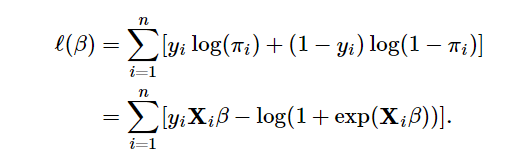

An illustration of logistic regression is below (Géron).

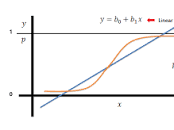

The random forest classification model is an ensemble method of the decision tree classification model. This combination of multiple decision trees, each trained on a random subset of data in a process known as bagging. The predictions of each tree are combined together giving the model a more generalized approach than a single decision tree, and therefore often leads to less overfitting on the training set by the model than compared to the single decision tree method. 

The combination of different uncorrelated trees helps reduce the impact of bias or error within the individual trees. This improved performance stems from how the data is selected for each tree. Since the data is randomly sampled with replacement, it results in a low correlation between each tree and when combined the overall prediction performance improves. An illustration of a random forest model is shown below (Géron).

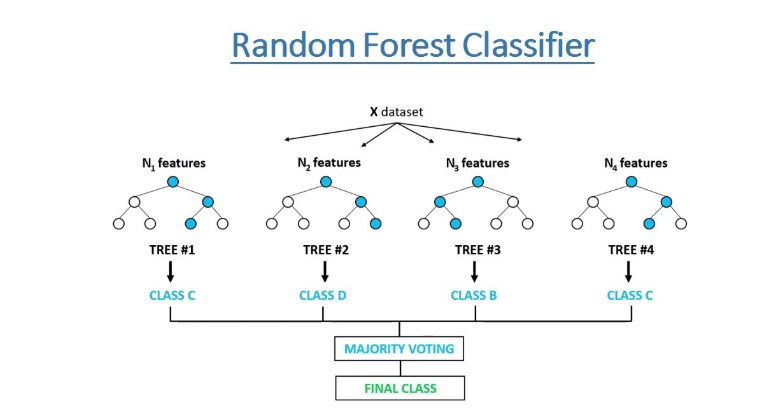

XGBoosting is a classification method that can be considered an ensemble approach in that it is a combination of a number of weak decision tree learners to create a stronger combined classifier. Upon first look, XGBoost, and other boosting algorithms seem similar to the random forest approach. However, an important distinction is that XGBoost builds upon each sequential model in a process called boosting, where random forest creates multiple decision trees in parallel. Through boosting, the XGBoost model iteratively creates a weak classifier, then using the residuals of the weak classifier it adds additional weight to the incorrectly classified items to build another classifier. The results of each weak classifier are then combined to create the ensemble results. This combination of the individual results generally out performs a single weak classifier. However, additional attributes differentiate the XGBoost model from other boosting models in that it specifically incorporates regularization to reduce the chance of overfitting, parallel processing, and algorithms for handling sparse data (Géron).

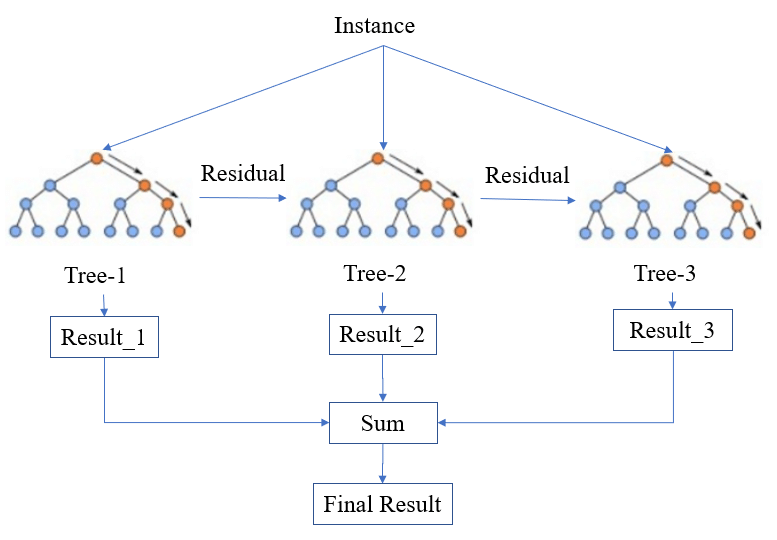

# Experimental Evaluation 

Since this is a classification problem, a number of methods will be used to determine the best performing model. Accuracy, precision, recall, and F1 score will be the specific metrics used to describe model performance, and the confusion matrix for each model will be evaluated to give additional context to the metrics. Accuracy is the total number of correct predictions over the total number of predictions. However, this metric needs to be understood in the greater context of how many false positives and how many false negatives were observed? This is where precision and recall are utilized. Precision describes how often a model incorrectly classified something as positive, or in this case being signed to the MLB. While recall describes how well a model correctly identifies the positives of the total positive in the testing dataset. The equations for precision and recall are shown below (Géron).

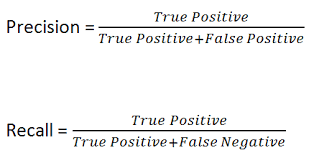

There is often a trade off between precision and recall, as one increases the other can decrease. However, the F1 score can capture the balance between precision and recall. The F1 score is a model performance metric between 0 and 1, and is calculated with the equation below (Géron).

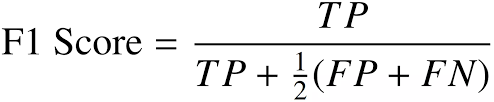

Additionally, a confusion matric can be utilized to visually represent model performance by illustrating the distribution of true positives, false positive, true negatives and false negatives. A confusion matrix is shown below:

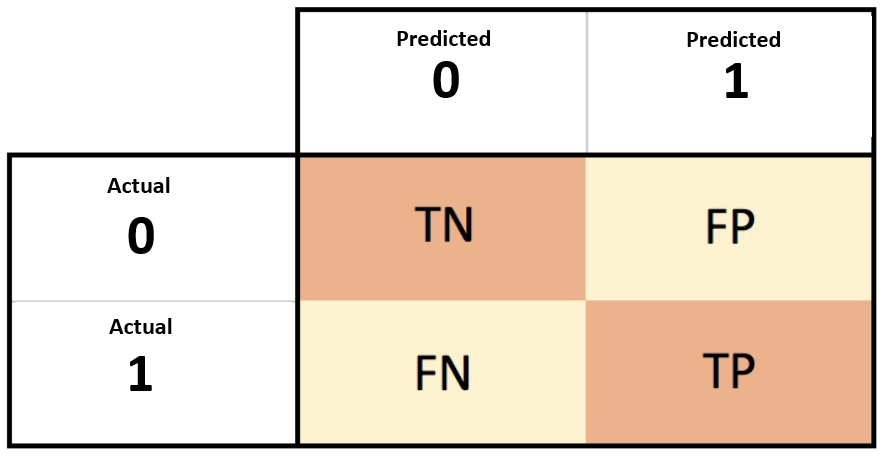

The dataset used for this study is very unweighted, in other words it has a very low instant number where a player was signed to the MLB. Therefore, accuracy while it will be evaluated in context of the other metrics would be a weak indicator of model performance, because the models could predict that every player does not become signed to the MLB and would likely have over 90% accuracy simply because very few players in the dataset are ever signed. The preferred metric will be precision, as precision will pivot the focus onto the model's credibility in predicting if a player will make it to the MLB. 



### Data Evaluation and Preprocessing

The data was sourced from Baseball Cube. The data is originally based as three files as follows:

1. Contracts 
    - Full list of MLB contracts since 2012

2. Batting
    - Minor league batting statistics since 2017

3. Pitching
    - Minor league pitching statistics since 2017


The data evaluation and preprocessing process is as follows. First the data tables and summary statistics will be explored, then the data will be visualized using histograms and box and whisker plots. Any required preprocessing steps will be identified and implemented. Prior to evaluating the data there are a few minor league and baseball specifics worth mentioning. The minor leagues is made up of five levels, Rookie, A-, A, AA, and AAA. Almost every player coming from High School or College starts in the Rookie league or A- league to develop their skills prior to having to compete with more experienced players, so therefore players in the Rookie or A- league should not be expected to move directly into the MLB. Additionally, generally pitchers are not known for thier batting abilities, in fact many teams choose to use a designated hitter in place of a pitcher during game play. During games with a significant lead or loss, position players will substitute in for pitchers to pitch allowing the pitcher to rest instead of exerting effort in games that are effectively over. Finally, MLB players may return to the minors for temporary periods following an injury or to further develop. 

In [4]:
#import data from files

open_file = open(r"alexander_contracts.csv")

df_contracts = pd.read_csv(open_file)

open_file = open(r"alexander_minor_batting_history.csv")

df_batting = pd.read_csv(open_file)

df_batting_org = df_batting.copy(deep = True)

open_file = open(r"alexander_minor_pitching_history.csv")

df_pitching = pd.read_csv(open_file)

In [3]:
df_contracts.head()

lastname firstname  playerid posit    bornDate           teamName  \
0      Chen   Wei-Yin     53053    SP   7/21/1985  Baltimore Orioles   
1     Garza      Matt     41982    SP  11/11/1983       Chicago Cubs   
2   Volstad     Chris    101629     P   9/23/1986       Chicago Cubs   
3  Phillips   Brandon      6607    2b   6/28/1981    Cincinnati Reds   
4     Votto      Joey     21238    1b   9/10/1983    Cincinnati Reds   

   tranxDate                                              notes  \
0  1/20/2012  Signed to 3-year contract for 2012-2014 ($11.3...   
1   2/3/2012  Signed to 1-year contract for 2012-2012 ($9.5m...   
2  1/17/2012  Signed to 1-year contract for 2012-2012 ($2.65...   
3  4/10/2012  Signed to 6-year contract for 2013-2018 ($72.5...   
4   4/4/2012  Signed to 10-year contract for 2014-2023 ($225...   

   contractStart  contractEnd  contractYears  contractDollars  \
0         2012.0       2014.0            3.0           11.388   
1         2012.0       2012.0            1.0            9.500   
2         2012.0       2012.0            1.0            2.655   
3         2013.0       2018.0            6.0           72.500   
4         2014.0       2023.0           10.0          225.000   

                                       contractNotes   mlbid  ServiceTime  \
0  [Free Agent] 3.072--3.572--4.072 $0.25m signin...  612672        8.000   
1                               [Avoids arbitration]  490063       10.149   
2                               [Avoids arbitration]  458690        4.077   
3                                        [Extension]  408252       13.049   
4              [Extension] with club option for 2024  458015       15.027   

   ServiceTimeYear highLevel   mlbYears  playYears  
0           2019.0       MLB  2012-2019  2004-2021  
1           2017.0       MLB  2006-2017  2003-2017  
2           2017.0       MLB  2008-2018  2005-2018  
3           2018.0       MLB  2002-2018  1999-2022  
4           2022.0       MLB  2007-2023  2002-2023

In [4]:
df_contracts.describe()

playerid  contractStart  contractEnd  contractYears  \
count    6814.000000    6813.000000  6813.000000    6813.000000   
mean    69686.441297    2013.962425  2011.946573       1.631000   
std     68489.640375     218.786002     9.969982       1.343649   
min        16.000000    1972.000000  1972.000000       1.000000   
25%      6162.000000    2006.000000  2007.000000       1.000000   
50%     42044.000000    2014.000000  2015.000000       1.000000   
75%    143517.000000    2019.000000  2020.000000       2.000000   
max    231150.000000   20051.000000  2034.000000      14.000000   

       contractDollars          mlbid  ServiceTime  ServiceTimeYear  
count      6813.000000    6814.000000  5472.000000      5472.000000  
mean          9.895980  401140.355885     8.386301      2018.056835  
std          26.464115  188063.819391     3.912978         4.466028  
min           0.000000       0.000000     0.005000      2006.000000  
25%           1.112500  136734.000000     5.148000      2015.000000  
50%           2.800000  453923.000000     8.075000      2020.000000  
75%           7.000000  543726.000000    11.048000      2022.000000  
max         432.000000  807799.000000    23.130000      2022.000000

In [5]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lastname         6814 non-null   object 
 1   firstname        6814 non-null   object 
 2   playerid         6814 non-null   int64  
 3   posit            6788 non-null   object 
 4   bornDate         6814 non-null   object 
 5   teamName         6810 non-null   object 
 6   tranxDate        6814 non-null   object 
 7   notes            6814 non-null   object 
 8   contractStart    6813 non-null   float64
 9   contractEnd      6813 non-null   float64
 10  contractYears    6813 non-null   float64
 11  contractDollars  6813 non-null   float64
 12  contractNotes    6412 non-null   object 
 13  mlbid            6814 non-null   int64  
 14  ServiceTime      5472 non-null   float64
 15  ServiceTimeYear  5472 non-null   float64
 16  highLevel        6814 non-null   object 
 17  mlbYears      

In [6]:
df_batting.head()

playerid  year                   teamName LeagueAbbr Level  Org lastName  \
0       130  2017      Sacramento River Cats        PCL   AAA  SFN    Upton   
1       215  2017             Salt Lake Bees        PCL   AAA  ANA   Ackley   
2       215  2018             Salt Lake Bees        PCL   AAA  ANA   Ackley   
3       232  2021            Louisville Bats        IL2   AAA  CIN  Adleman   
4       374  2017  Richmond Flying Squirrels       East    AA  SFN   Arnold   

  firstName    G   AB  ...    OPS  Age    ht   WT  Bats  Throws  posit  \
0      B.J.   12   45  ...  0.639   32  '6-2  170     R       R     CF   
1    Dustin  116  441  ...  0.716   29  '6-1  182     L       R     1B   
2    Dustin   72  241  ...  0.776   30  '6-1  182     L       R  LF-2B   
3       Tim   26    2  ...  0.333   33  '6-5  206     R       R      P   
4      Jeff   61  185  ...  0.646   29  '6-2  205     R       R      C   

     borndate             Place   mlbid  
0   8/21/1984        Norfolk,VA  425834  
1   2/26/1988  Winston-Salem,NC  554429  
2   2/26/1988  Winston-Salem,NC  554429  
3  11/13/1987        Raleigh,NC  534947  
4   1/13/1988     Louisville,KY  594740  

[5 rows x 38 columns]

In [7]:
df_batting.describe()

playerid          year             G            AB             R  \
count   35443.000000  35443.000000  35443.000000  35443.000000  35443.000000   
mean   198787.640747   2019.757272     34.380357    116.514149     17.067319   
std     35883.428415      2.098156     30.629645    113.578074     17.556572   
min       130.000000   2017.000000      0.000000      0.000000      0.000000   
25%    183053.000000   2018.000000      9.000000     23.000000      3.000000   
50%    203997.000000   2019.000000     26.000000     84.000000     12.000000   
75%    216883.000000   2022.000000     50.000000    174.000000     26.000000   
max    315328.000000   2023.000000    145.000000    557.000000    118.000000   

                  H           Dbl           Tpl            HR           RBI  \
count  35443.000000  35443.000000  35443.000000  35443.000000  35443.000000   
mean      29.079988      5.747030      0.888412      2.755720     15.156843   
std       30.225202      6.529657      1.466744      4.292889     16.667737   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      1.000000      0.000000      0.000000      2.000000   
50%       19.000000      3.000000      0.000000      1.000000     10.000000   
75%       44.000000      9.000000      1.000000      4.000000     23.000000   
max      180.000000     43.000000     18.000000     38.000000    114.000000   

       ...            SF           HBP           GDP          Bavg  \
count  ...  35443.000000  35443.000000  35443.000000  35394.000000   
mean   ...      1.037553      2.145417      2.203877      0.227730   
std    ...      1.490570      2.887477      2.865300      0.108305   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.186000   
50%    ...      0.000000      1.000000      1.000000      0.238000   
75%    ...      2.000000      3.000000      3.000000      0.279000   
max    ...     13.000000     38.000000     32.000000      1.000000   

                Slg           obp           OPS           Age            WT  \
count  35394.000000  35397.000000  35394.000000  35443.000000  35443.000000   
mean       0.344937      0.315050      0.659929     22.355670    188.358350   
std        0.190283      0.124851      0.290846      3.758978     39.091473   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.255000      0.273000      0.544000     20.000000    170.000000   
50%        0.348000      0.326000      0.677000     22.000000    185.000000   
75%        0.433000      0.371000      0.798000     24.000000    204.000000   
max        4.000000      1.000000      5.000000     42.000000   2250.000000   

               mlbid  
count   35443.000000  
mean   660338.704201  
std     55024.319483  
min         0.000000  
25%    650380.000000  
50%    669743.000000  
75%    682191.000000  
max    815220.000000  

[8 rows x 26 columns]

In [8]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35443 entries, 0 to 35442
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerid    35443 non-null  int64  
 1   year        35443 non-null  int64  
 2   teamName    35443 non-null  object 
 3   LeagueAbbr  35443 non-null  object 
 4   Level       35443 non-null  object 
 5   Org         35333 non-null  object 
 6   lastName    35443 non-null  object 
 7   firstName   35443 non-null  object 
 8   G           35443 non-null  int64  
 9   AB          35443 non-null  int64  
 10  R           35443 non-null  int64  
 11  H           35443 non-null  int64  
 12  Dbl         35443 non-null  int64  
 13  Tpl         35443 non-null  int64  
 14  HR          35443 non-null  int64  
 15  RBI         35443 non-null  int64  
 16  SB          35443 non-null  int64  
 17  CS          35443 non-null  int64  
 18  BB          35443 non-null  int64  
 19  IBB         35443 non-nul

In [9]:
df_pitching.head()

playerid  year             teamName LeagueAbbr Level  Org lastName  \
0        50  2018  Omaha Storm Chasers        PCL   AAA  KCA    Lohse   
1       133  2018  Inland Empire 66ers      Calif    A+  ANA  Johnson   
2       133  2018       Salt Lake Bees        PCL   AAA  ANA  Johnson   
3       232  2017      Louisville Bats         IL   AAA  CIN  Adleman   
4       232  2019      Toledo Mud Hens         IL   AAA  DET  Adleman   

  firstName  W  L  ...  WHIP  Age    ht   WT  Bats  Throws  posit    borndate  \
0      Kyle  0  1  ...  2.54   39  '6-2  190     R       R      P   10/4/1978   
1       Jim  0  0  ...  3.00   35  '6-5  210     R       R      P   6/27/1983   
2       Jim  0  0  ...  1.00   35  '6-5  210     R       R      P   6/27/1983   
3       Tim  0  1  ...  0.86   29  '6-5  206     R       R      P  11/13/1987   
4       Tim  9  4  ...  1.15   31  '6-5  206     R       R      P  11/13/1987   

             Place   mlbid  
0         Chico,CA  346798  
1  Johnson City,NY  462382  
2  Johnson City,NY  462382  
3       Raleigh,NC  534947  
4       Raleigh,NC  534947  

[5 rows x 41 columns]

In [10]:
df_pitching.describe()

playerid          year             W             L             G  \
count   40677.000000  40677.000000  40677.000000  40677.000000  40677.000000   
mean   199485.638592   2019.866903      1.547951      1.547754     11.354107   
std     35804.206442      2.103382      1.938780      1.970318      9.544230   
min        50.000000   2017.000000      0.000000      0.000000      0.000000   
25%    183921.000000   2018.000000      0.000000      0.000000      4.000000   
50%    203999.000000   2019.000000      1.000000      1.000000      9.000000   
75%    216685.000000   2022.000000      2.000000      2.000000     16.000000   
max    315339.000000   2023.000000     16.000000     15.000000     66.000000   

                 GS            CG           SHO            GF            SV  \
count  40677.000000  40677.000000  40677.000000  40677.000000  40677.000000   
mean       3.097475      0.027116      0.009194      3.069376      0.732502   
std        5.158260      0.184265      0.101682      4.838086      1.858292   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        4.000000      0.000000      0.000000      4.000000      1.000000   
max       29.000000      4.000000      3.000000     56.000000     35.000000   

       ...            BK           ERA           h9           hr9  \
count  ...  40677.000000  40677.000000  40677.00000  40677.000000   
mean   ...      0.295990      5.126551      8.87744      0.861304   
std    ...      0.681186      7.078084      5.80593      1.748336   
min    ...      0.000000      0.000000      0.00000      0.000000   
25%    ...      0.000000      2.330000      6.39000      0.000000   
50%    ...      0.000000      3.950000      8.31000      0.520000   
75%    ...      0.000000      6.000000     10.27000      1.120000   
max    ...     11.000000    270.000000    162.00000     81.000000   

                bb9           so9          WHIP           Age            WT  \
count  40677.000000  40677.000000  40677.000000  40677.000000  40677.000000   
mean       4.855091      9.397802      1.525885     23.015316    194.247830   
std        5.962238      3.898750      1.028706     17.560231     23.928031   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.360000      7.270000      1.100000     20.000000    175.000000   
50%        3.770000      9.050000      1.380000     23.000000    190.000000   
75%        5.730000     11.340000      1.710000     25.000000    210.000000   
max      270.000000     54.000000     42.000000   2022.000000    300.000000   

               mlbid  
count   40677.000000  
mean   663017.080512  
std     54136.735516  
min         0.000000  
25%    656061.000000  
50%    670404.000000  
75%    682609.000000  
max    815276.000000  

[8 rows x 29 columns]

In [11]:
df_pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40677 entries, 0 to 40676
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerid    40677 non-null  int64  
 1   year        40677 non-null  int64  
 2   teamName    40677 non-null  object 
 3   LeagueAbbr  40677 non-null  object 
 4   Level       40677 non-null  object 
 5   Org         40538 non-null  object 
 6   lastName    40677 non-null  object 
 7   firstName   40677 non-null  object 
 8   W           40677 non-null  int64  
 9   L           40677 non-null  int64  
 10  G           40677 non-null  int64  
 11  GS          40677 non-null  int64  
 12  CG          40677 non-null  int64  
 13  SHO         40677 non-null  int64  
 14  GF          40677 non-null  int64  
 15  SV          40677 non-null  int64  
 16  IP          40677 non-null  float64
 17  H           40677 non-null  int64  
 18  HR          40677 non-null  int64  
 19  R           40677 non-nul

Before making any visualizations, a few preprocessing steps can already be made. The first year players should be removed, the pitchers should be removed from the batting data, the position players should be removed from the hitting data, and the returning major league players should be removed. A few columns will also be converted from string to float types. 

Process Batting Data First

In [12]:
df_batting.Level.value_counts()

Rk     12014
AAA     6997
AA      5491
A       4696
A+      4681
A-      1564
Name: Level, dtype: int64

As can be seen above, the Rookie league has a significant number of players in it that do not advance to the next league, and are often still developing talents. These players will be removed to prevent adding bad data to the model. 

In [13]:
df_batting_copy = df_batting.copy(deep = True)

df_batting_copy.set_index(['playerid', 'year'], inplace=True)

rookie_only = []

for person in df_batting_copy.index.get_level_values('playerid').unique():

    player_df = df_batting_copy.loc[person]
    player_df.reset_index(inplace = True)

    if (player_df["Level"] == player_df['Level'][0]).all() & (player_df["Level"][0] == 'Rk'):
        rookie_only.append(person)
    if (player_df["Level"] == player_df['Level'][0]).all() & (player_df["Level"][0] == 'A-'):
        rookie_only.append(person)

print(f"Number of Rookies  only: {len(rookie_only)}")

df_batting = df_batting[~df_batting['playerid'].isin(rookie_only)]

Number of Rookies  only: 3152


In [14]:
df_batting["ht"] = df_batting["ht"].replace("'51-", "'6-0")
df_batting["ht"] = df_batting["ht"].replace("'9-4", "'6-0")
df_batting["ht"] = df_batting["ht"].replace("'", "'6-0")
df_batting["ht"] = df_batting["ht"].replace("'51", "'6-0")

height_df = df_batting["ht"].str.split("-", expand = True)
height_df["height"] = height_df[0].str.slice(1).astype(float) + round((height_df[1].astype(float))/12, 2)
df_batting['ht'] = height_df['height']

In [15]:
df_batting["prim_posit"] = df_batting['posit'].str.split('-', expand = True)[0]
df_batting["sec_posit"] = df_batting['posit'].str.split('-', expand = True)[1]
df_batting = df_batting.drop(columns = ['posit'])


In [16]:
df_batting['Place'].str.split(',', expand = True)[0]
df_batting["HomeCity"] = df_batting['Place'].str.split(',', expand = True)[0]
df_batting["StateProv"] = df_batting['Place'].str.split(',', expand = True)[1]
df_batting = df_batting.drop(columns = ["Place"])

In [17]:
df_contracts['bornDate'] = pd.to_datetime(df_contracts['bornDate'], format='%m/%d/%Y')
df_contracts['tranxDate'] = pd.to_datetime(df_contracts['tranxDate'], format='%m/%d/%Y')
df_contracts['contractStart'] = df_contracts['contractStart'].astype(int, errors = "ignore")
df_contracts['contractEnd'] = df_contracts['contractEnd'].astype(int, errors = "ignore")
df_contracts['ServiceTimeYear'] = df_contracts['ServiceTimeYear'].astype(int, errors = "ignore")
df_contracts["mlbStartYear"] = df_contracts['mlbYears'].str.slice(0,4)
df_contracts["mlbStartYear"] = pd.to_numeric(df_contracts["mlbStartYear"], errors = 'coerce')

As stated, positon players will often come in to relieve actual pitchers during games that are effectively over. These pitching performances are not typical of normal pitching situations and therefore should be removed from the data. 

In [18]:
extra_pos = pd.DataFrame(df_pitching[df_pitching['posit'].str.len() > 2]["posit"])

extra_pos["posit"].str.split("-") 

extra_pos.posit.value_counts()

C-1B     65
3B-1B    54
3B-2B    53
2B-3B    44
SS-2B    33
         ..
LF-P      1
RF-OF     1
C-2B      1
CF-SS     1
3B-C      1
Name: posit, Length: 62, dtype: int64

In [19]:
df_pitching = df_pitching[df_pitching["posit"] == "P"]
df_pitching['Place'].str.split(',', expand = True)[0]
df_pitching["HomeCity"] = df_pitching['Place'].str.split(',', expand = True)[0]
df_pitching["StateProv"] = df_pitching['Place'].str.split(',', expand = True)[1]
df_pitching = df_pitching.drop(columns = ["Place"])

The players in the Rookie and A- league will be removed from the pitching data set too. 

In [20]:
df_pitching_copy = df_pitching.copy(deep = True)

df_pitching_copy.set_index(['playerid', 'year'], inplace=True)

rookie_only = []

for person in df_pitching_copy.index.get_level_values('playerid').unique():

    player_df = df_pitching_copy.loc[person]
    player_df.reset_index(inplace = True)

    if (player_df["Level"] == player_df['Level'][0]).all() & (player_df["Level"][0] == 'Rk'):
        rookie_only.append(person)
    if (player_df["Level"] == player_df['Level'][0]).all() & (player_df["Level"][0] == 'A-'):
        rookie_only.append(person)

df_pitching = df_pitching[~df_pitching['playerid'].isin(rookie_only)]



In [21]:
df_pitching["IP"] = df_pitching["IP"].astype(int)
df_pitching["ht"] = df_pitching["ht"].replace("'", "'6-2")
df_height = df_pitching["ht"].str.split("-", expand = True)

df_height["height"] = df_height[0].str.slice(1).astype(float) + round((df_height[1].astype(float))/12, 2)
df_pitching["ht"] = df_height["height"]

To find players that are retuning to the minor leagues the dataframes will be left joined to the contracts dataframe on playerid, and the difference between the pitching or batting year and the MLB start year will be found. Any year that is not null or greater than 0 will be removed. 

In [22]:
pitch_data = df_pitching.drop(columns = ["Bats", "Throws", "posit", "borndate", "mlbid", "HomeCity", "StateProv", "Age", "teamName", "LeagueAbbr", "Level", "Org", "lastName", "firstName"])
df_contracts_sub = df_contracts.groupby('playerid').first().reset_index()
df_contracts_sub = df_contracts_sub[["mlbStartYear", "playerid"]]
df_pitching_comb = pitch_data.merge(df_contracts_sub, left_on = "playerid", right_on = "playerid", how = "left")
df_pitching_comb["time_delta"] = df_pitching_comb.year - df_pitching_comb.mlbStartYear
df_pitching_comb = df_pitching_comb[(df_pitching_comb["time_delta"] <= 0) | (df_pitching_comb["time_delta"].isnull())]

col_list = pitch_data.columns.tolist()

def find_career_averages(df, col_list):
    career_weighted_avg_df = pd.DataFrame()

    for i in col_list:
        if i != "playerid" and i != "year":
            df[f'wt_avg_{i}'] = df['IP'].astype(int) * df[f'{i}']
            
            yearly_weighted_avg = df.groupby(['playerid', 'year'])[f'wt_avg_{i}'].sum() / df.groupby(['playerid', 'year'])['IP'].sum()
            yearly_weighted_avg = yearly_weighted_avg.reset_index().rename(columns = {0:f"wt_avg_{i}"})
            # Merge the yearly weighted averages and the total AB back into a single DataFrame
            temp_df = pd.merge(yearly_weighted_avg.reset_index(), df.groupby(['playerid', 'year'])['IP'].sum().reset_index(), on=['playerid', 'year'])
            temp_df.dropna(inplace=True)
            # Now, compute the career weighted averages
            career_weighted_avg = temp_df.groupby('playerid').apply(lambda x: np.average(x[f'wt_avg_{i}'], weights=x['IP'])).reset_index().rename(columns={0: f"career_wt_avg_{i}"})
            
            if len(career_weighted_avg_df) == 0:
                career_weighted_avg_df = career_weighted_avg
            else:
                career_weighted_avg_df = career_weighted_avg_df.merge(career_weighted_avg, on='playerid')

    return career_weighted_avg_df

weighted_pitch_car = find_career_averages(df_pitching_comb, col_list)

It is generally said that pitchers do not hit well, but that statement will be evaluated prior to removing every pitcher from the batting dataset. 

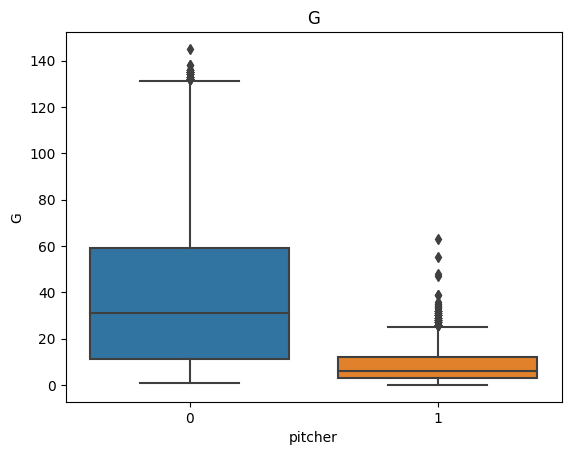

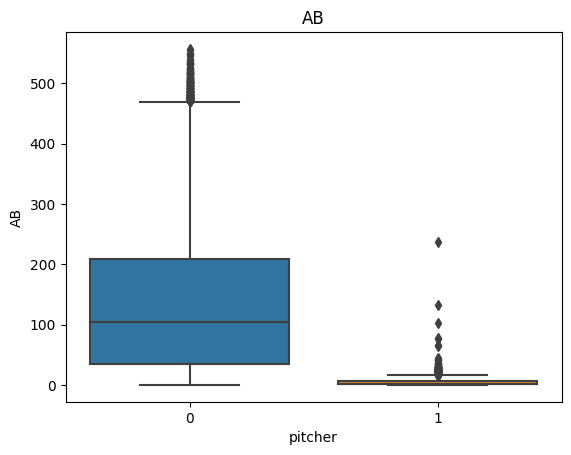

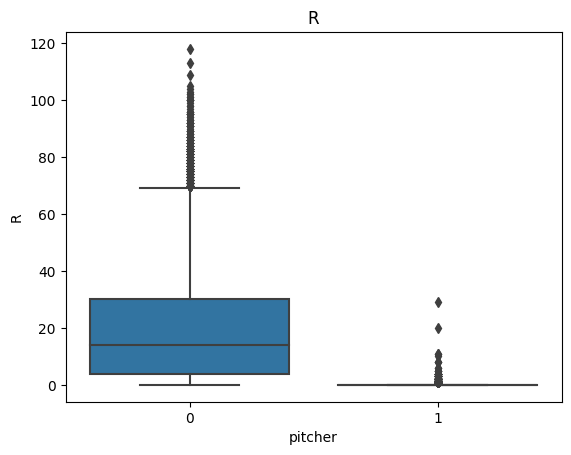

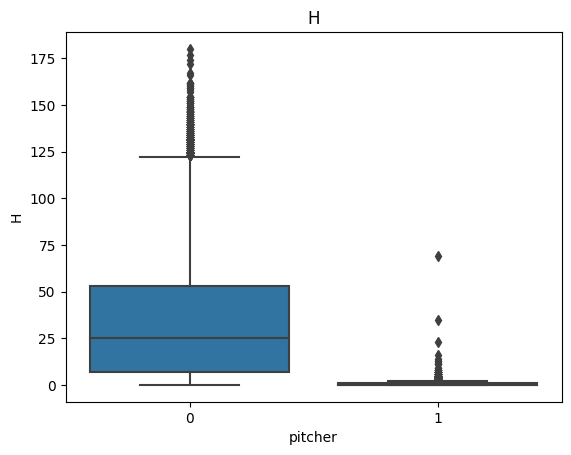

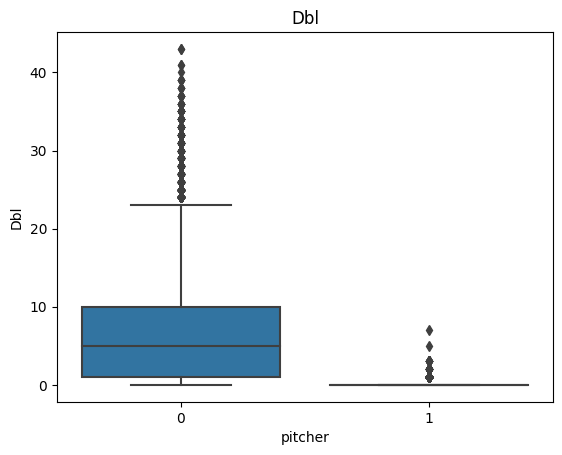

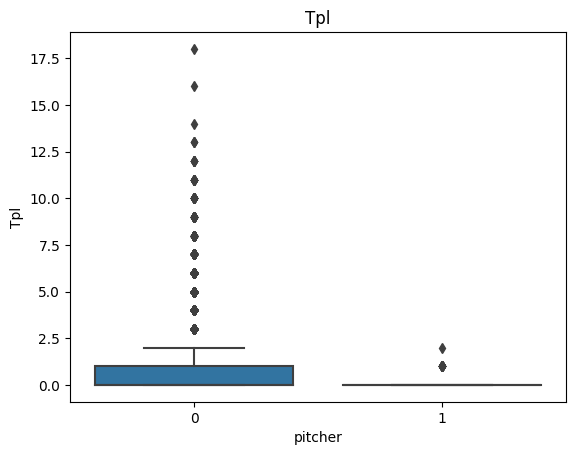

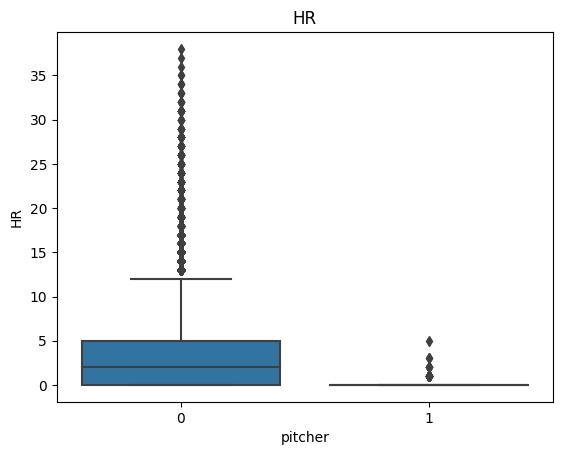

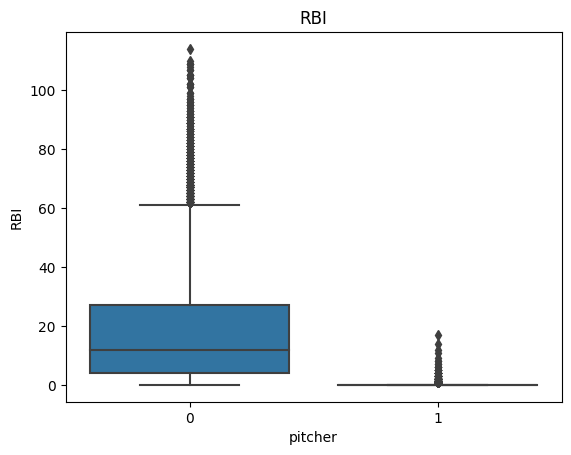

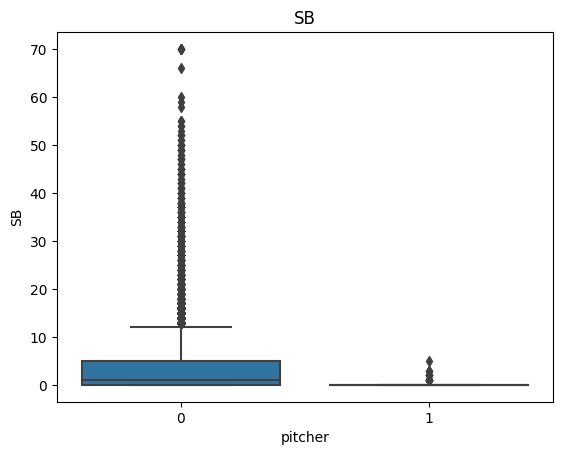

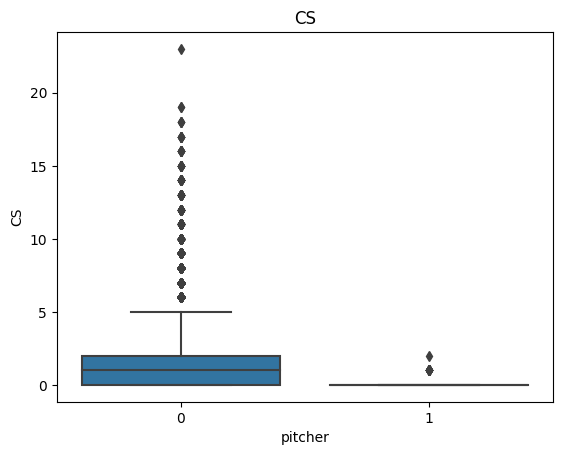

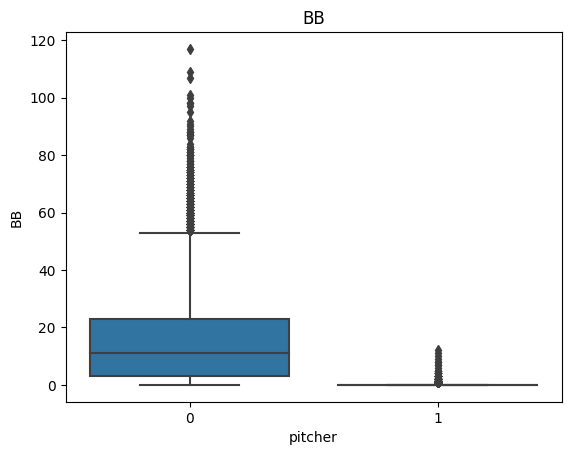

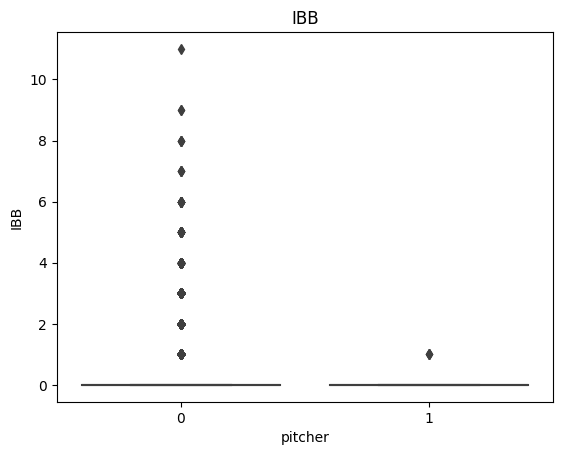

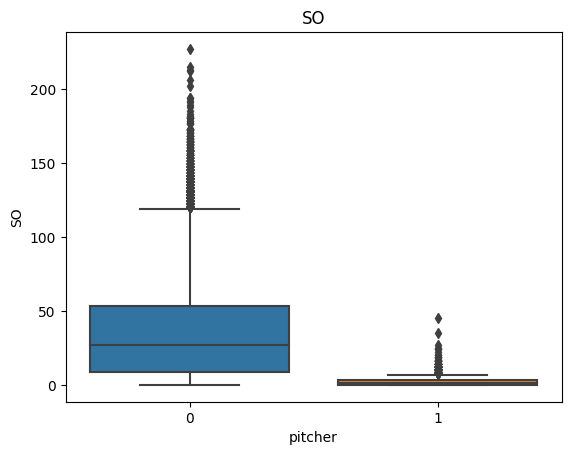

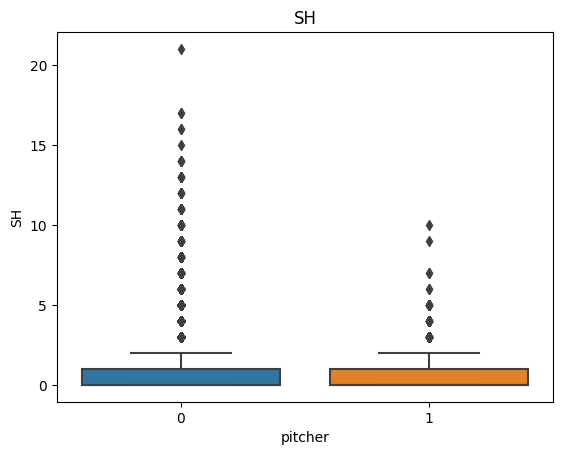

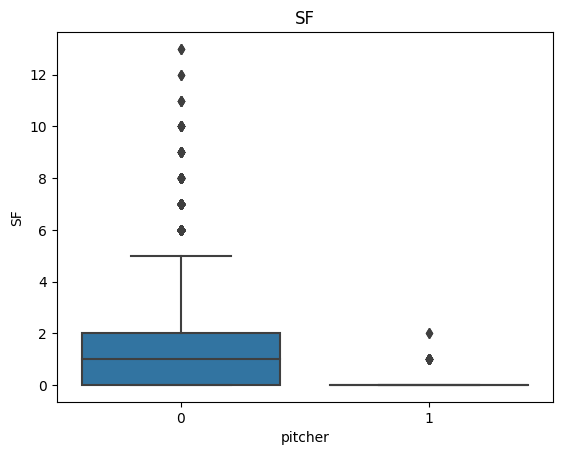

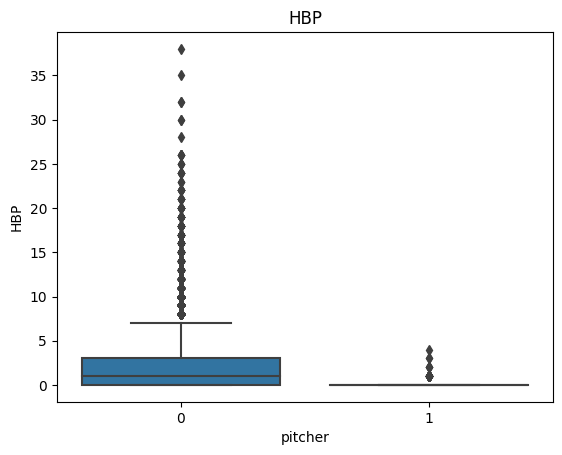

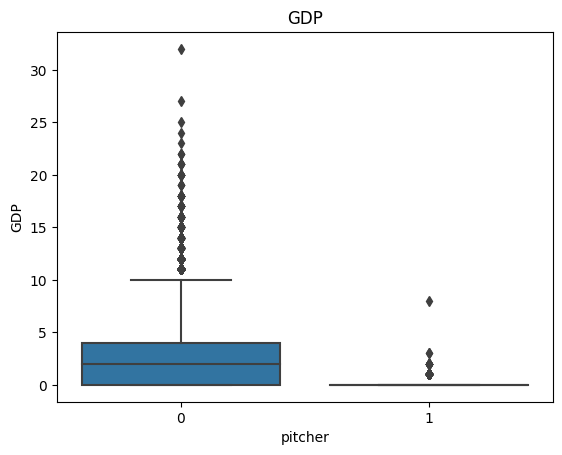

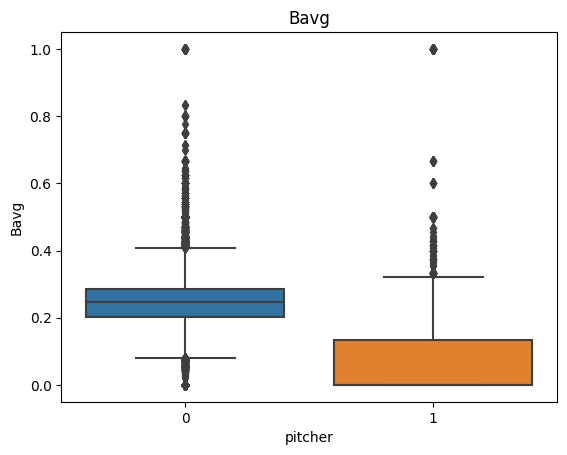

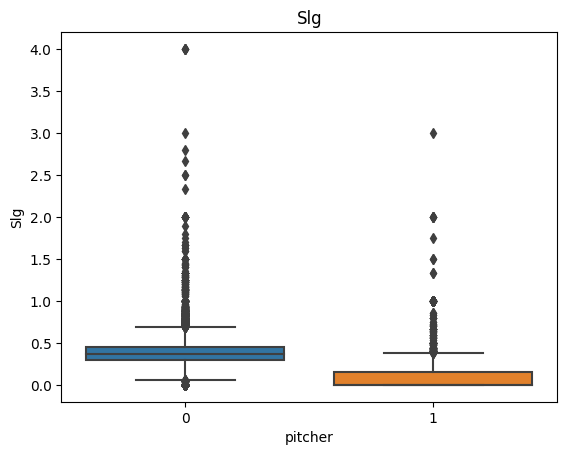

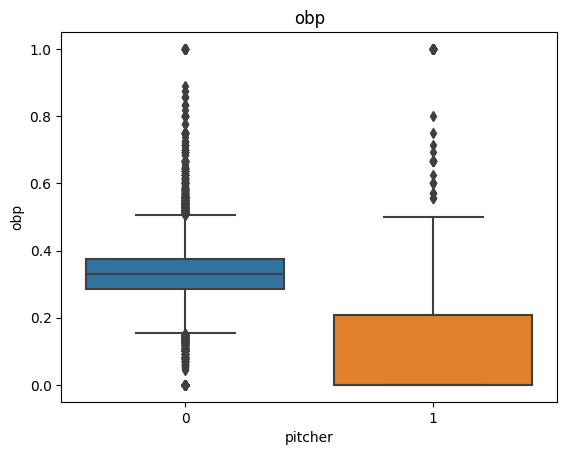

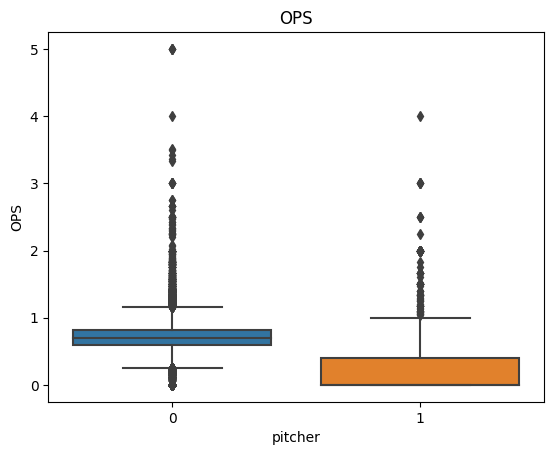

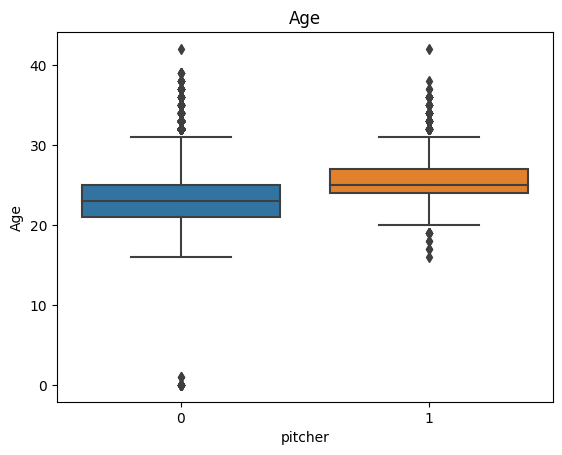

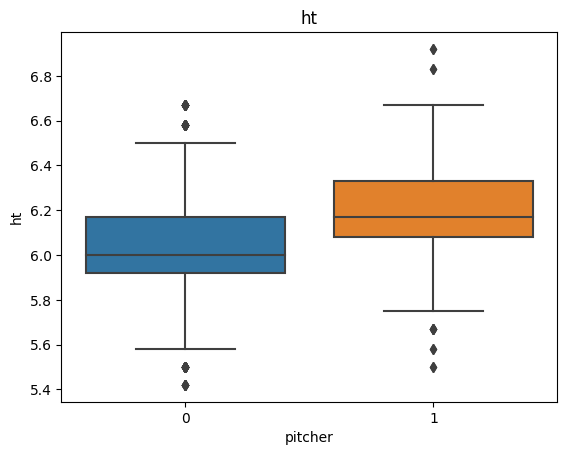

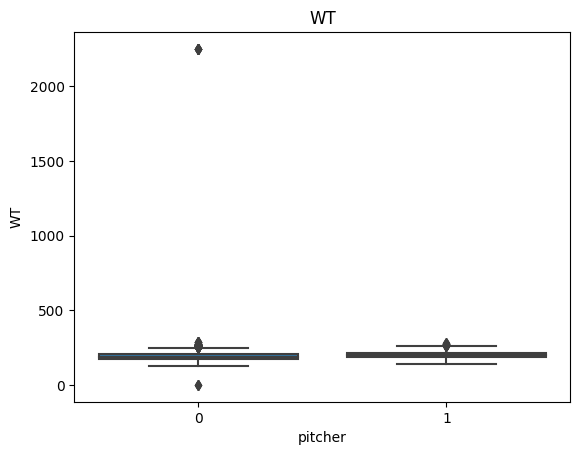

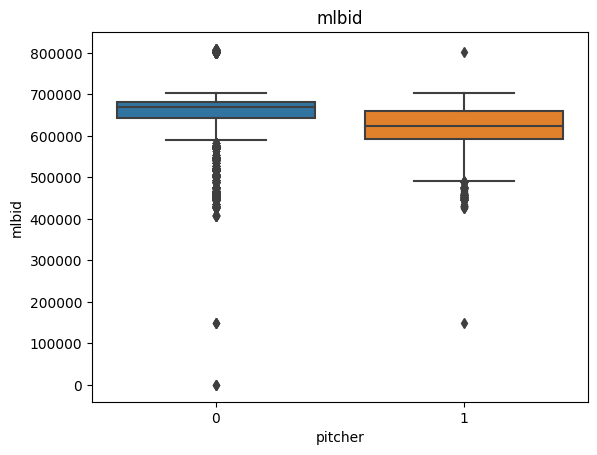

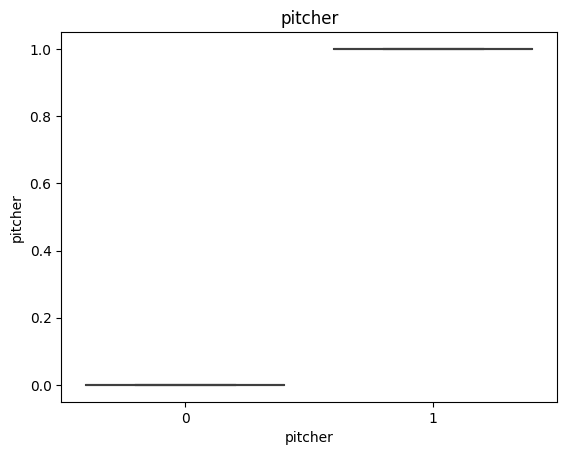

In [23]:
pitch_temp = df_batting.copy(deep= True)
pitch_temp["pitcher"] = np.where(pitch_temp["prim_posit"] == 'P', 1, 0)

for i in pitch_temp.columns.tolist():
    if i not in ("sec_posit", "borndate", "prim_posit", "StateProv", "HomeCity", "teamName", "LeagueAbbr", "Level", "Org", "Bats", "Throws", "lastName", "firstName", "playerid", "year"):
        sns.boxplot(x="pitcher", y=f"{i}", data = pitch_temp).set_title(f"{i}")
        plt.show()

We can see from the data that pitchers overall, do not perform well offensively, to prevent the model from being trained on this misleading data, it will be removed. 

<Axes: >

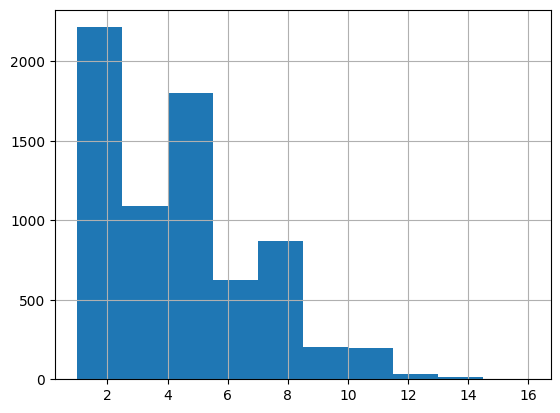

In [24]:
df_batting.playerid.value_counts().hist()

When considering which classification model to use, the format of the data is a crucial consideration. Given the time series component of the data year over year per player, approaches such as MiniRocket would be appropriate. However, MiniRocket and other time series classification techniques require many consecutive data points often over 9, but minor league players often only play for a few years. This can be seen below with how many times a player id appears - even considering the values below do not show true years in the minor league given that players often play for more than one team in a given year. 

As a result, a static classification method will be used and the data should be summarized for the player's career. The weighted average of the player's batting stats will be found for their career based upon at bats. 

In [25]:
df_batting_non_pitch = df_batting[df_batting["prim_posit"] != "P"]

df_contracts_sub = df_contracts.groupby('playerid').first().reset_index()
df_contracts_sub = df_contracts_sub[["mlbStartYear", "playerid"]]
df_batting_comb = df_batting_non_pitch.merge(df_contracts_sub, left_on = "playerid", right_on = "playerid", how = "left")
df_batting_comb["time_delta"] = df_batting_comb.year - df_batting_comb.mlbStartYear
df_batting_comb[(df_batting_comb["time_delta"] <= 0) | (df_batting_comb["time_delta"].isnull())]
df_batting_comb[(df_batting_comb["time_delta"] <= 0)]
df_batting_comb = df_batting_comb[(df_batting_comb["time_delta"] <= 0) | (df_batting_comb["time_delta"].isnull())]

col_list = ["R", "H", "Dbl", "Tpl", "HR", "RBI", "SB", "CS", "BB", "IBB", "SO", "SH", "SF", "HBP", "GDP", "Bavg", "Slg", "obp", "OPS", "ht", "WT"]

def find_career_averages(df, col_list):
    career_weighted_avg_df = pd.DataFrame()

    for i in col_list:
        df[f'wt_avg_{i}'] = df['AB'] * df[f'{i}']
        
        yearly_weighted_avg = df.groupby(['playerid', 'year'])[f'wt_avg_{i}'].sum() / df.groupby(['playerid', 'year'])['AB'].sum()
        yearly_weighted_avg = yearly_weighted_avg.reset_index().rename(columns = {0:f"wt_avg_{i}"})
        
        # Merge the yearly weighted averages and the total AB back into a single DataFrame
        temp_df = pd.merge(yearly_weighted_avg.reset_index(), df.groupby(['playerid', 'year'])['AB'].sum().reset_index(), on=['playerid', 'year'])
        temp_df.dropna(inplace=True)
        # Now, compute the career weighted averages
        career_weighted_avg = temp_df.groupby('playerid').apply(lambda x: np.average(x[f'wt_avg_{i}'], weights=x['AB'])).reset_index().rename(columns={0: f"career_wt_avg_{i}"})
        
        if len(career_weighted_avg_df) == 0:
            career_weighted_avg_df = career_weighted_avg
        else:
            career_weighted_avg_df = career_weighted_avg_df.merge(career_weighted_avg, on='playerid')

    return career_weighted_avg_df

weighted_bat_car = find_career_averages(df_batting_comb, col_list)

### Batting Visuals

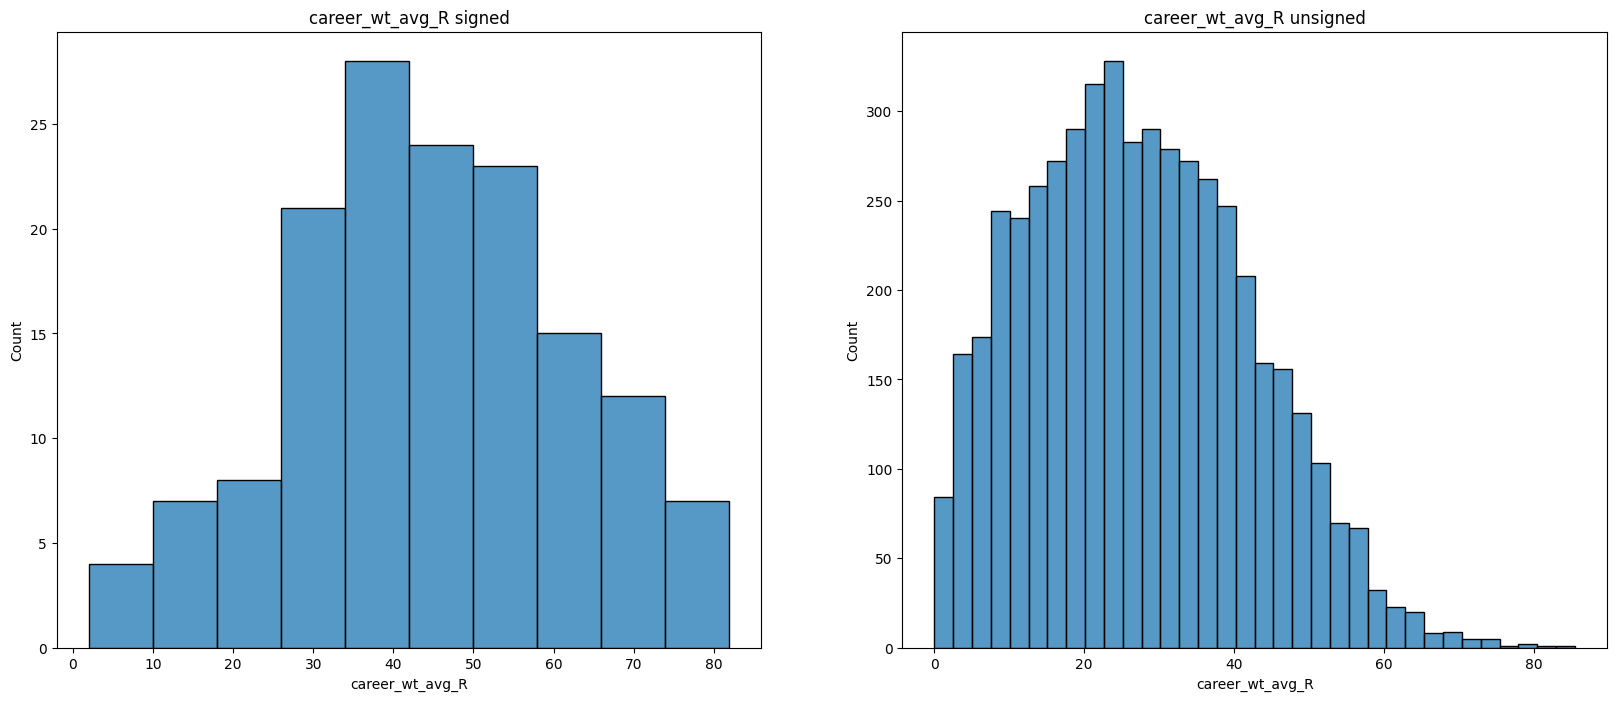

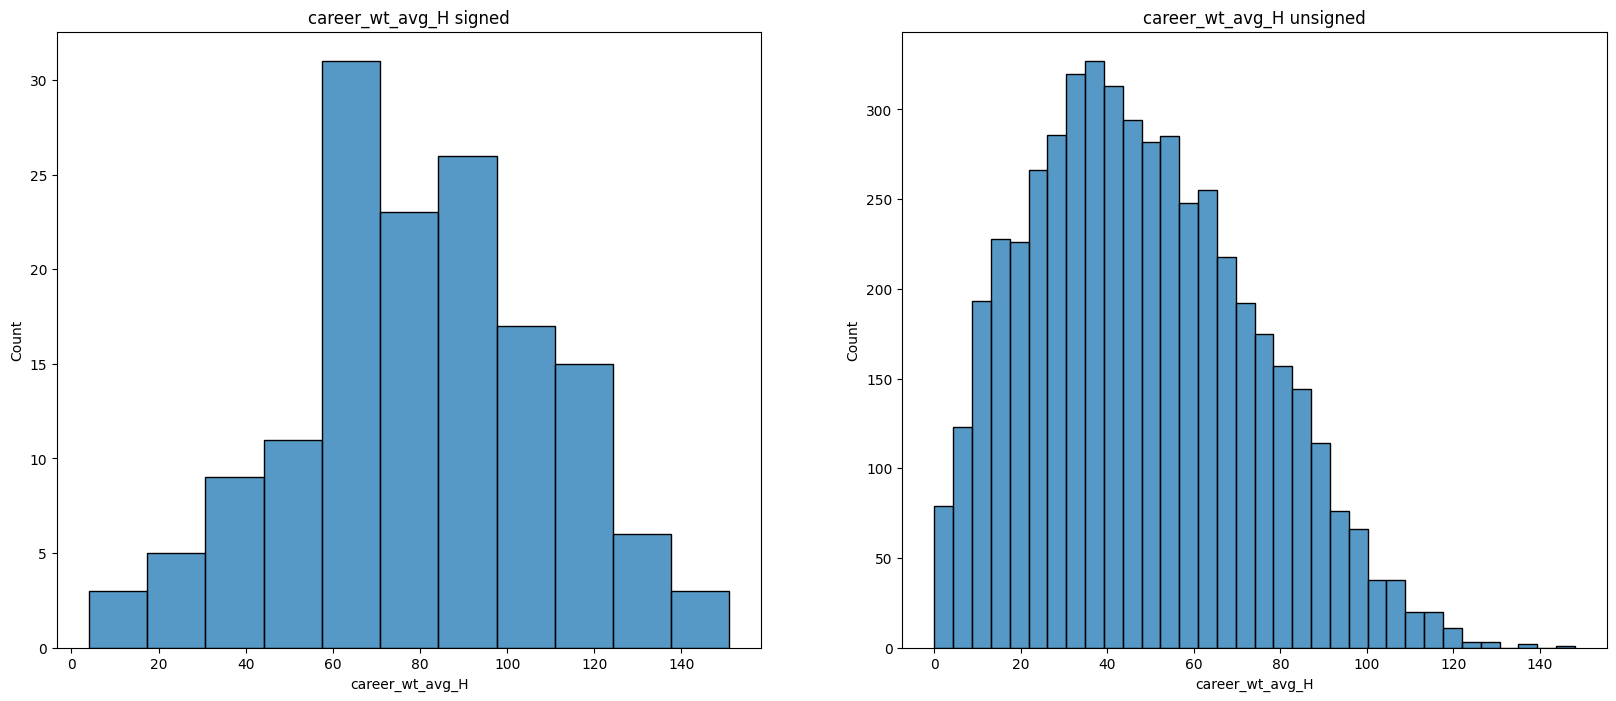

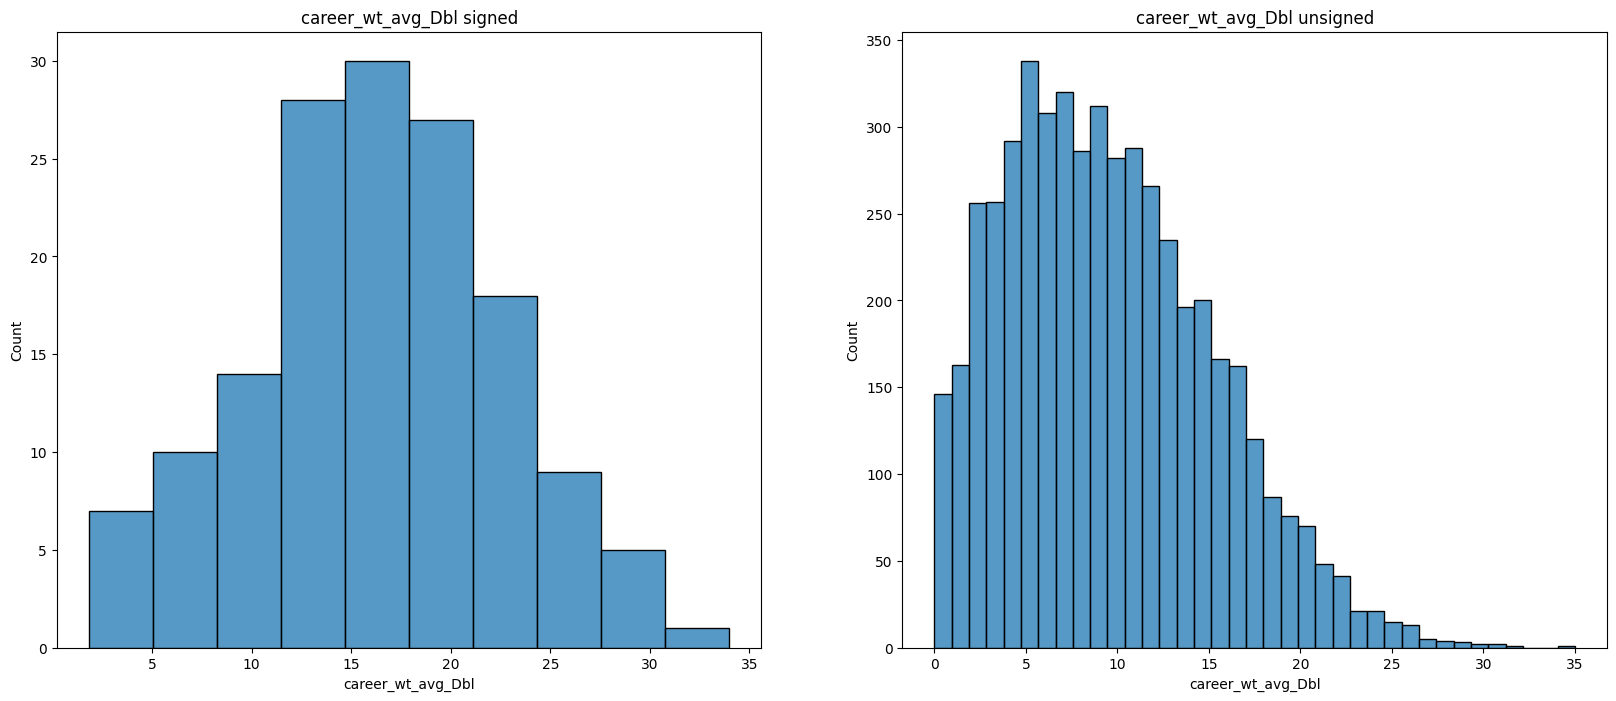

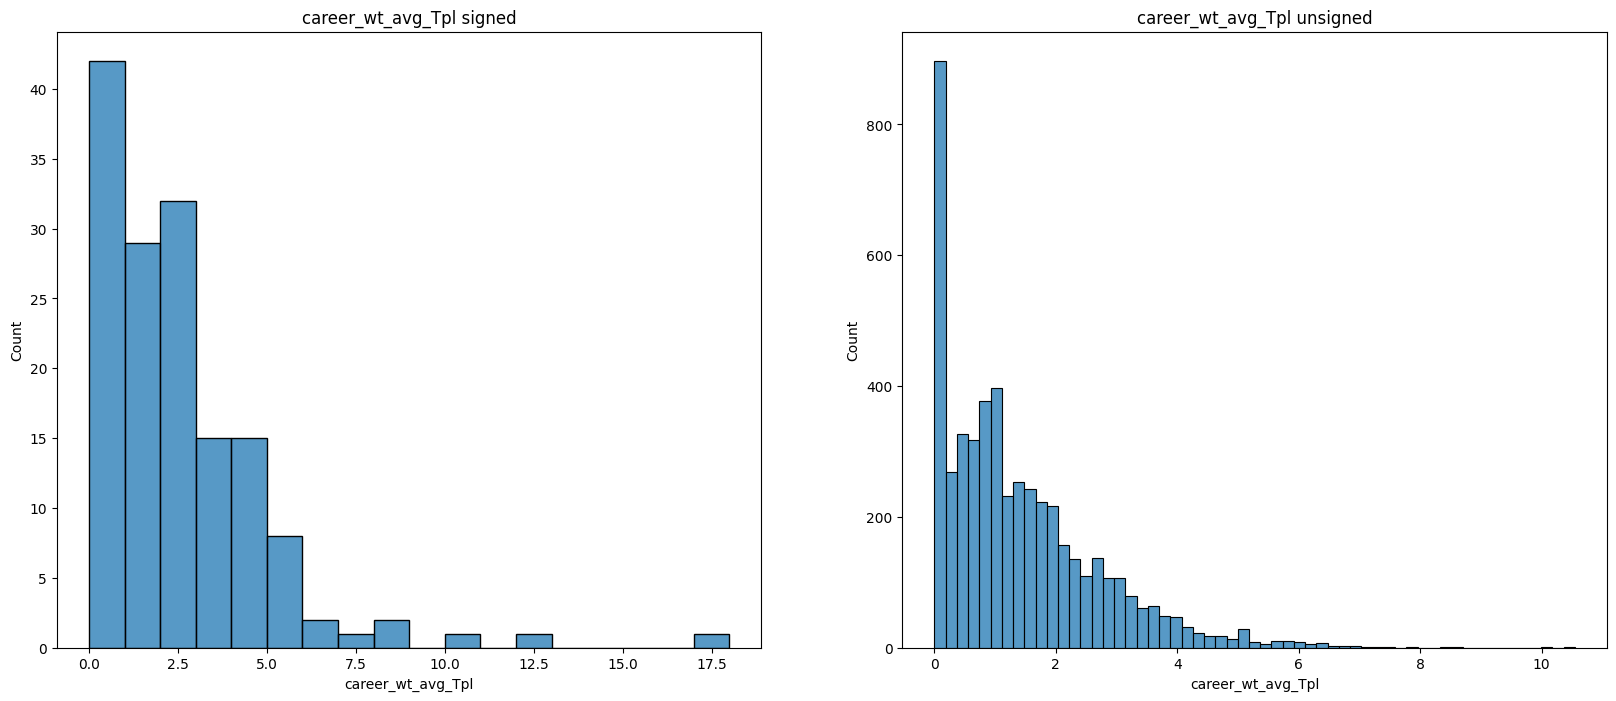

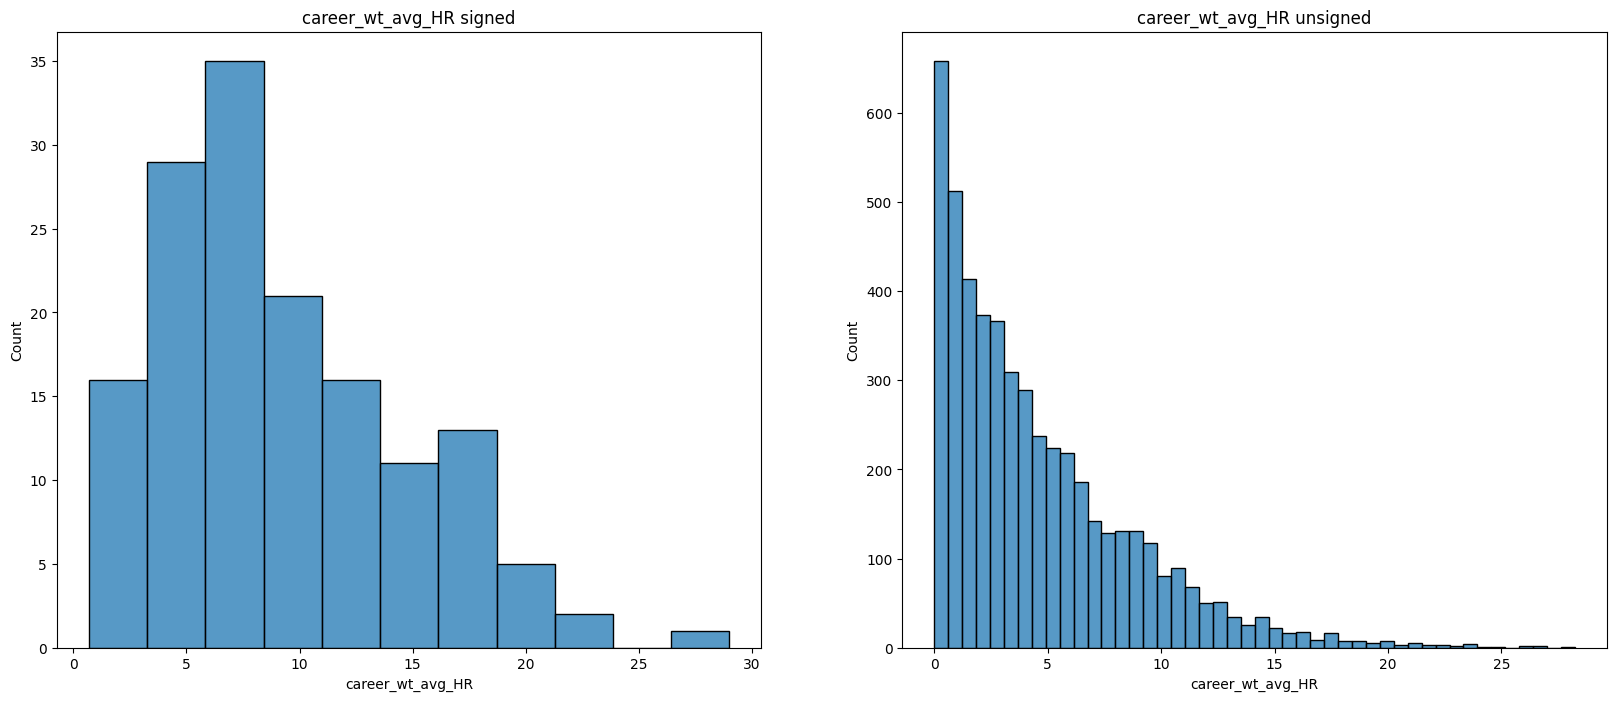

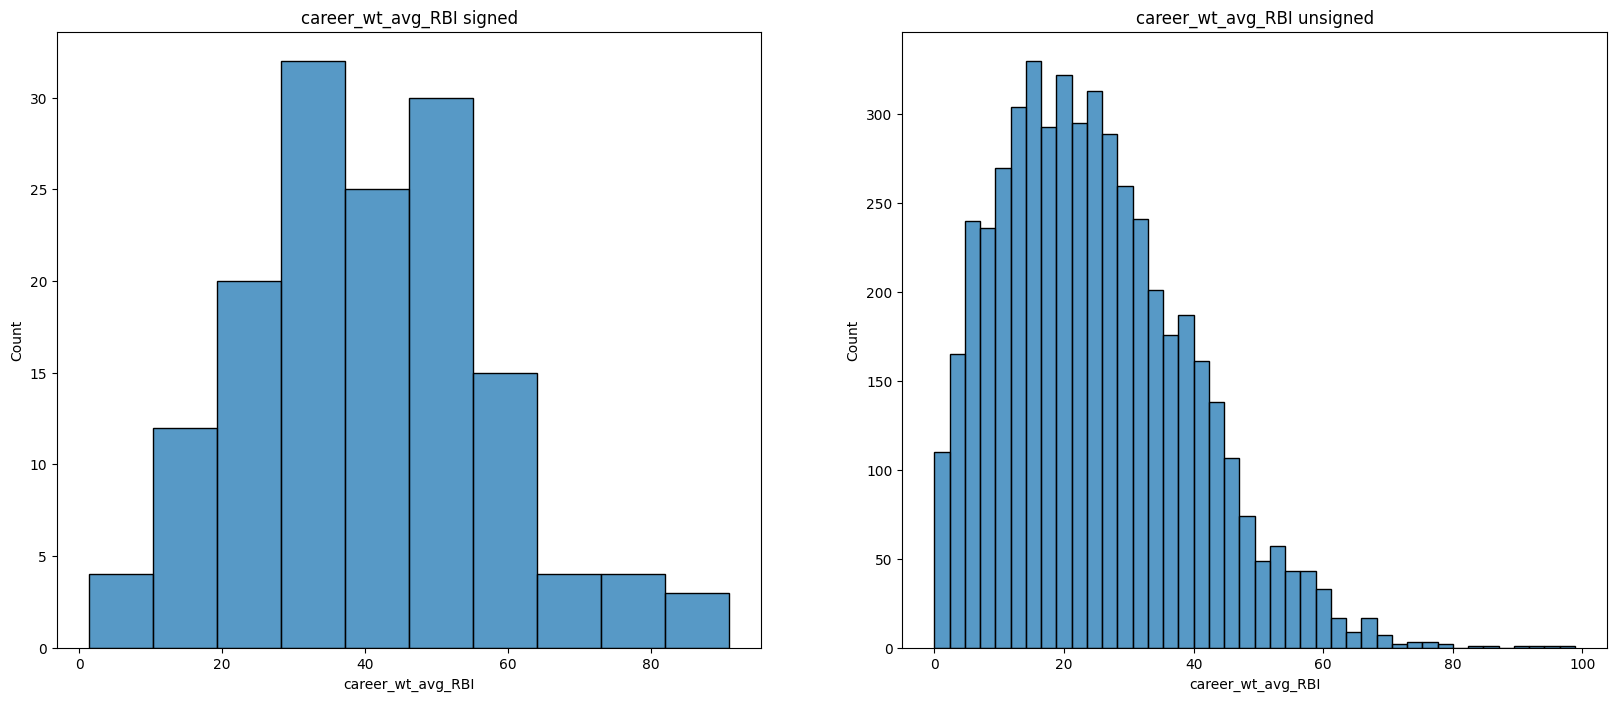

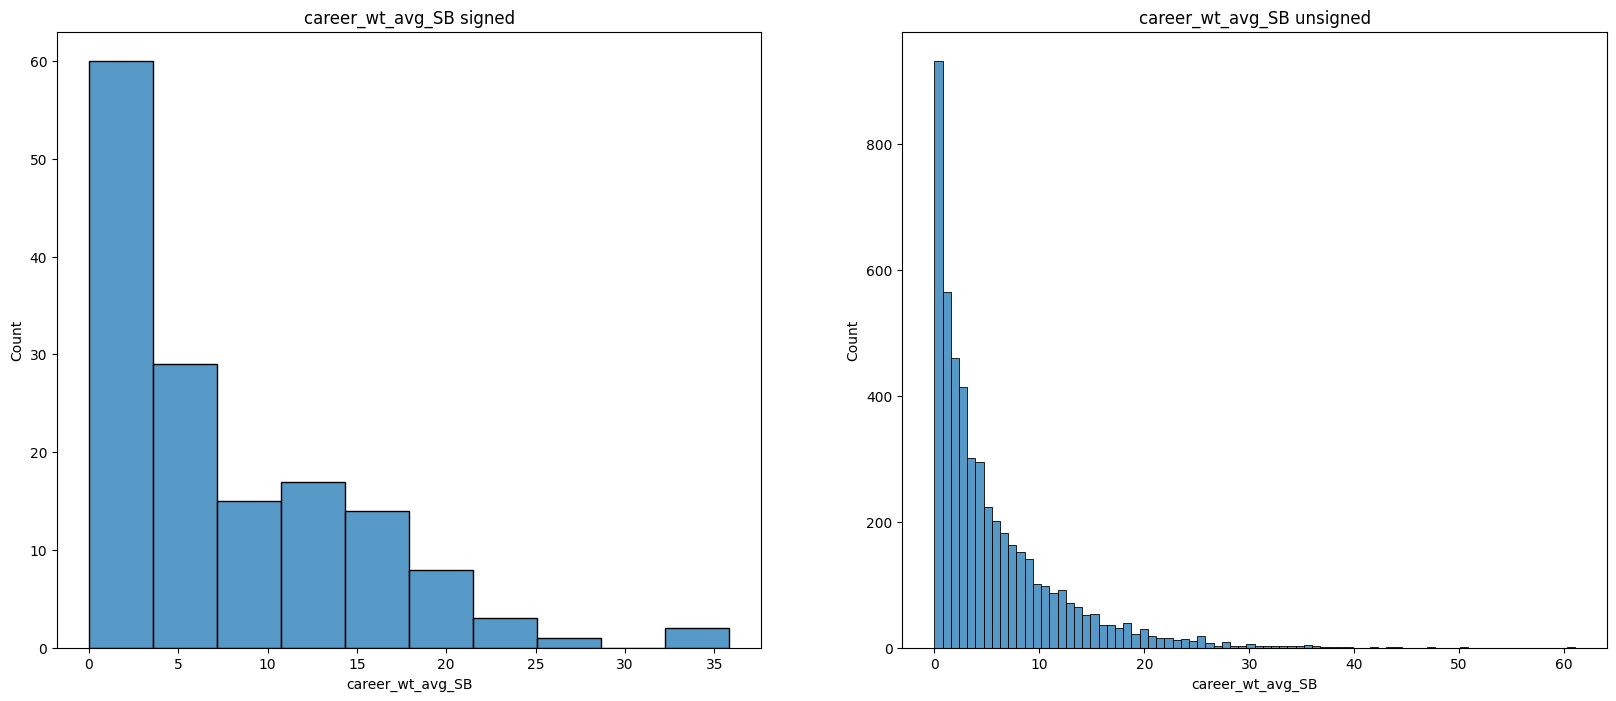

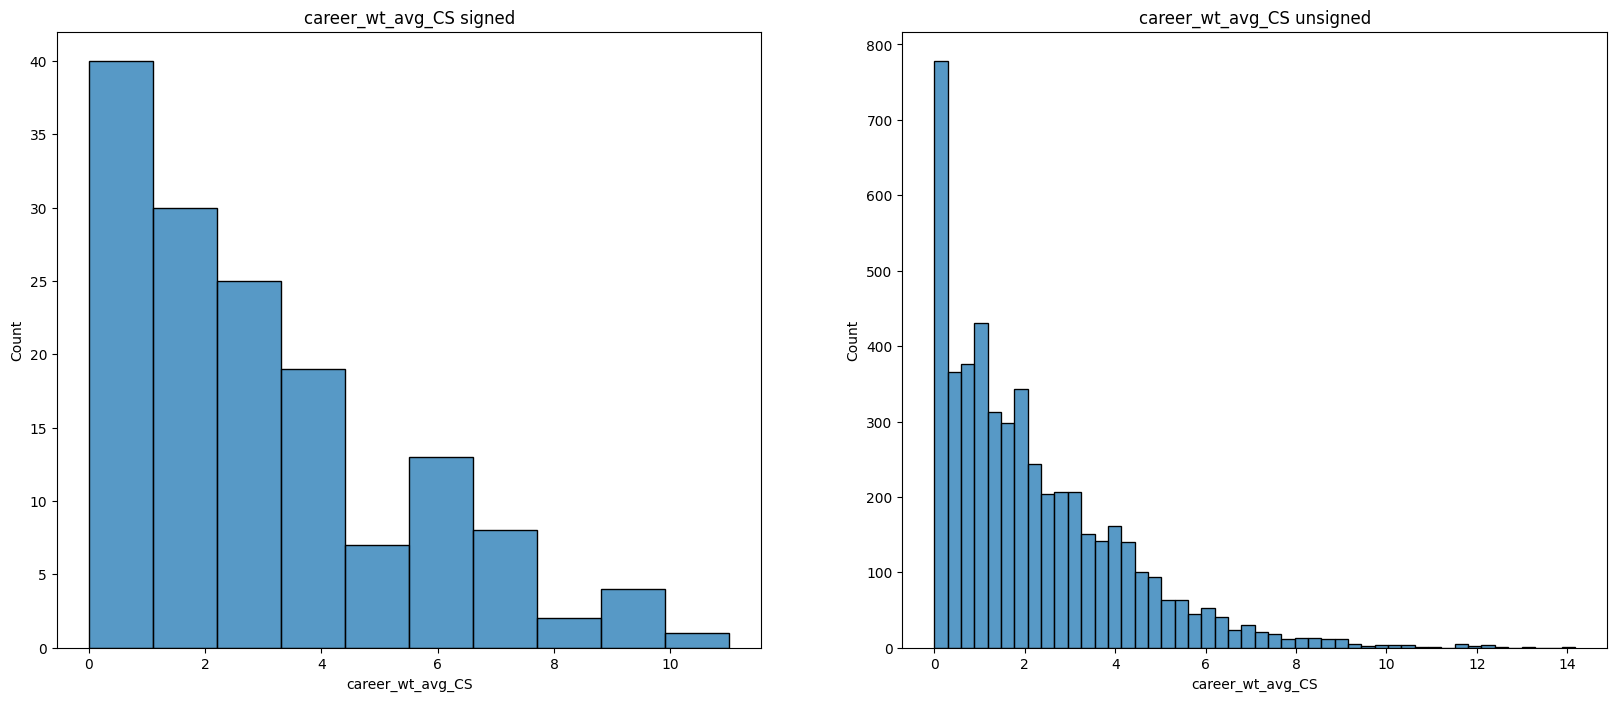

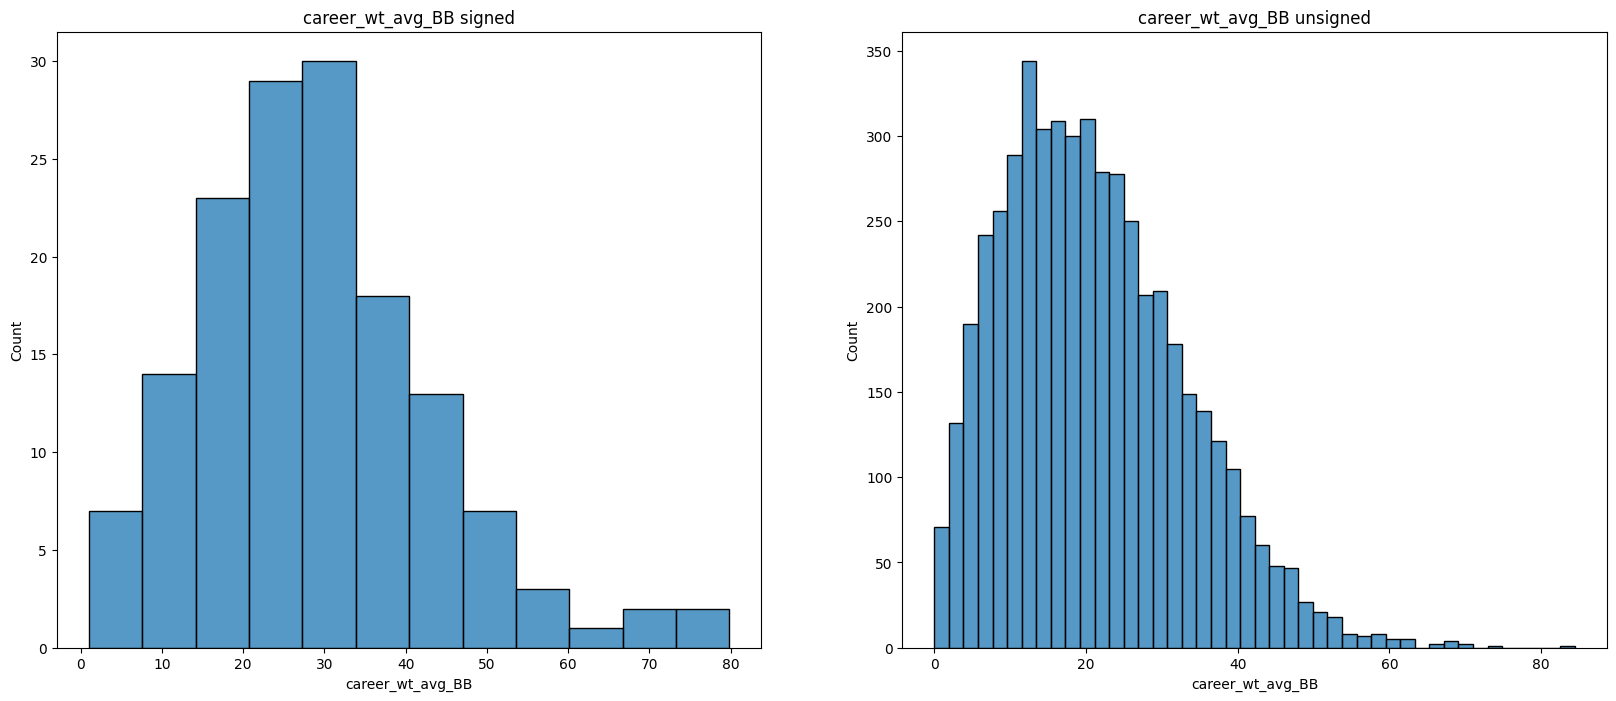

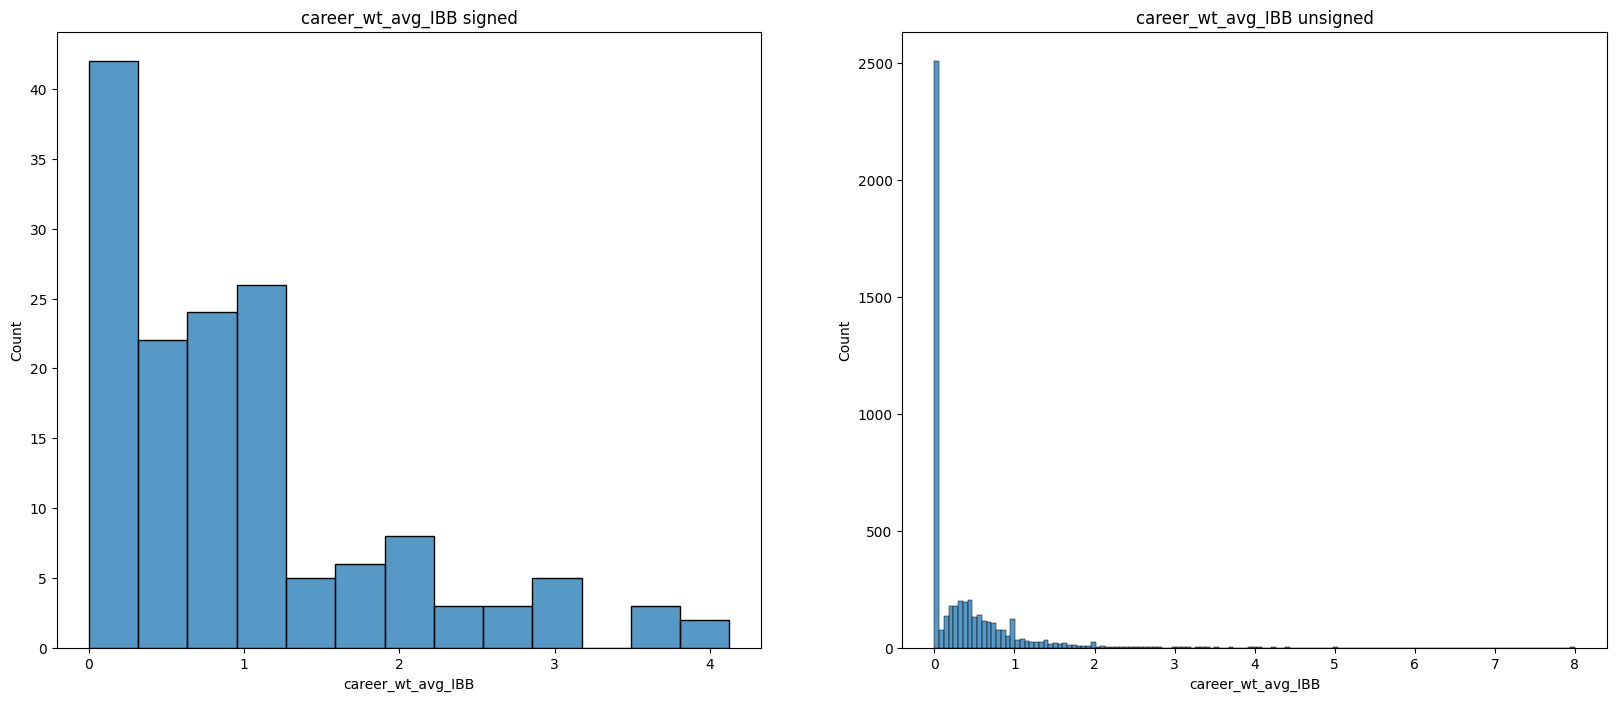

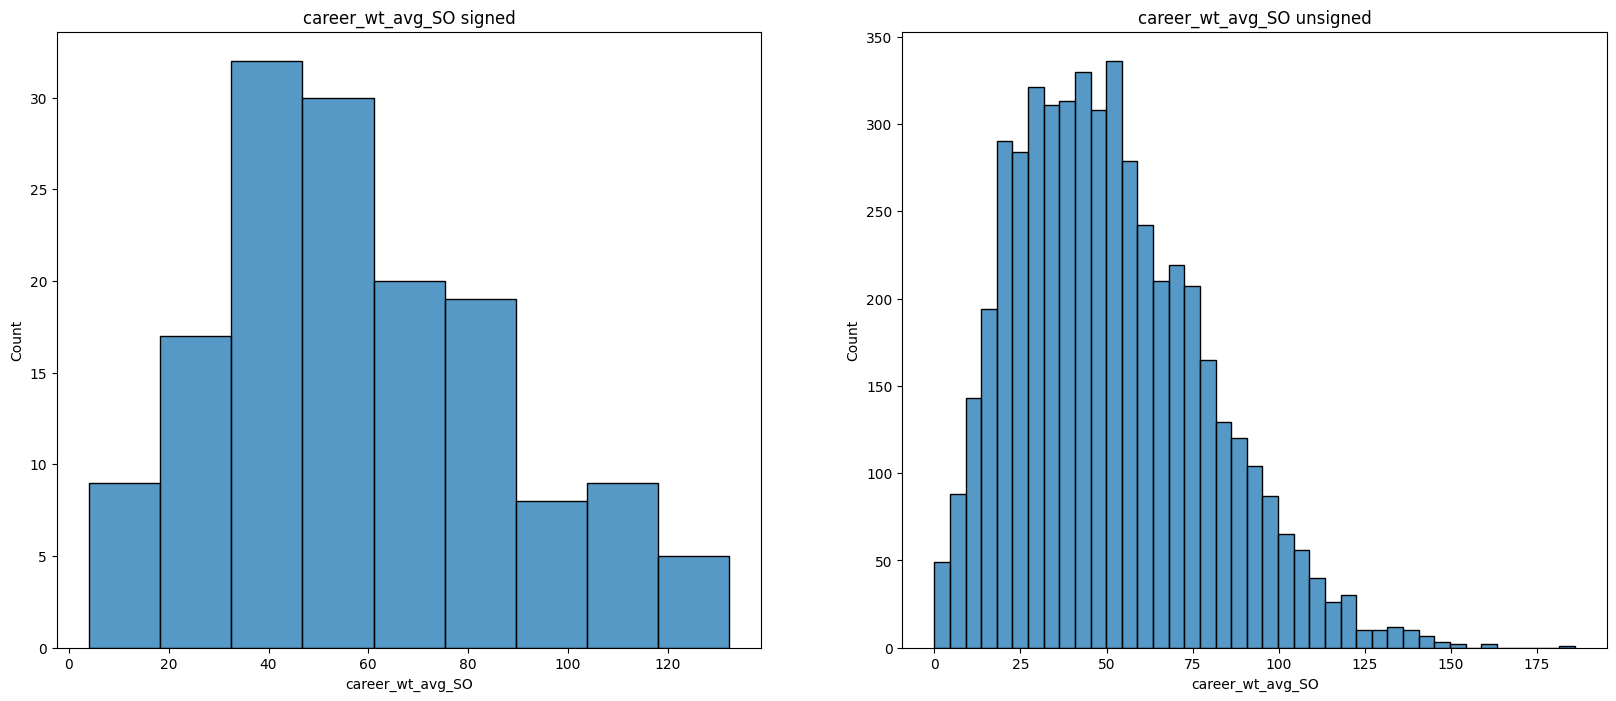

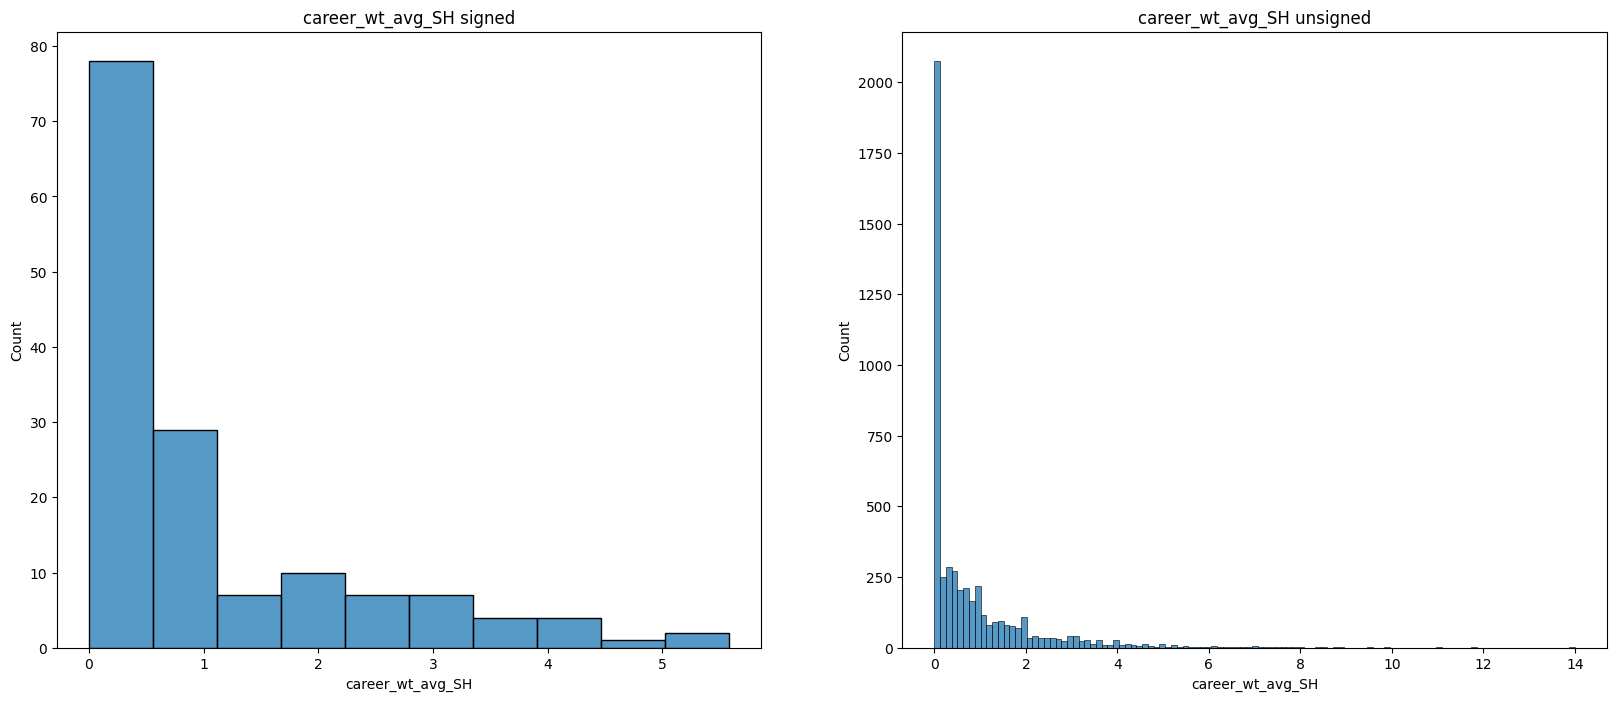

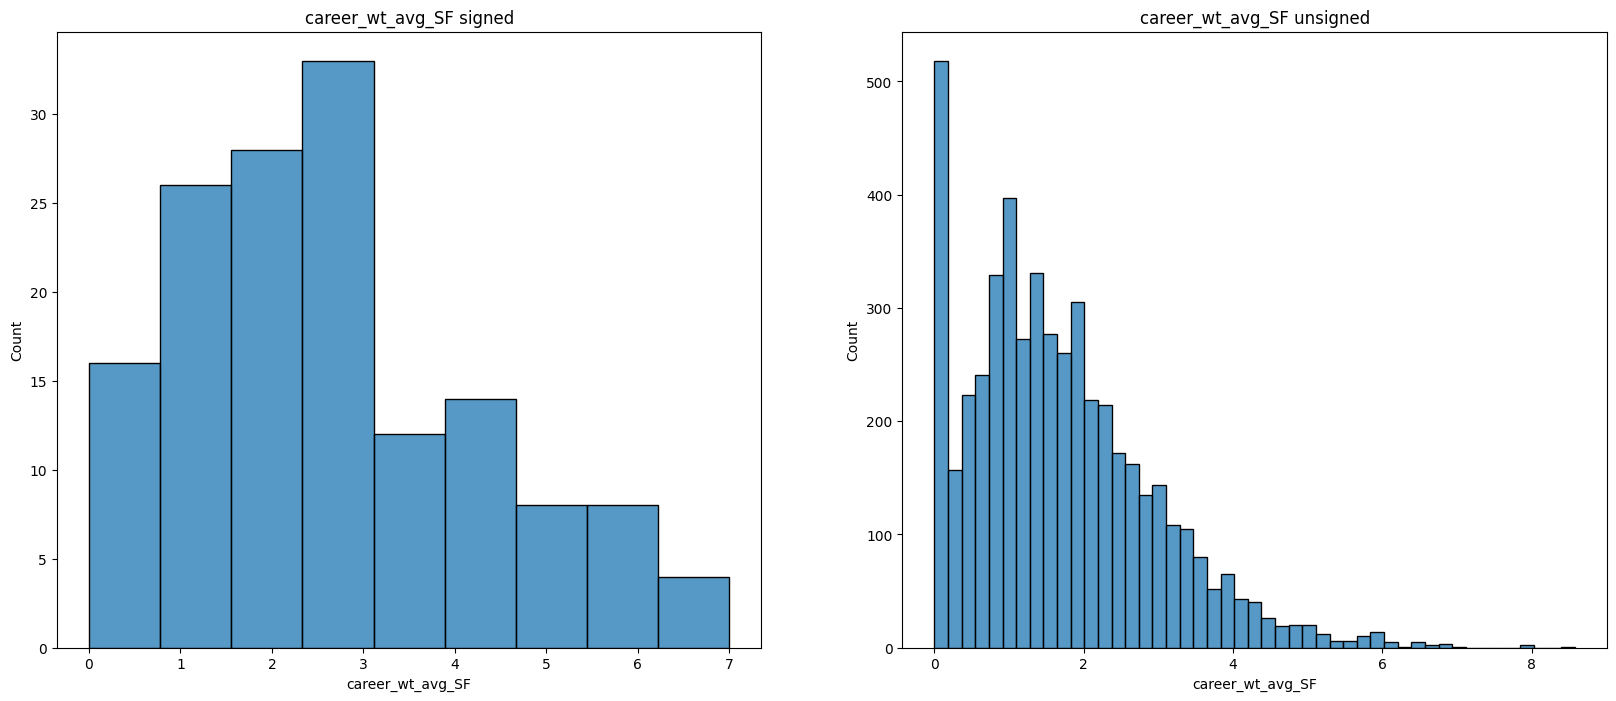

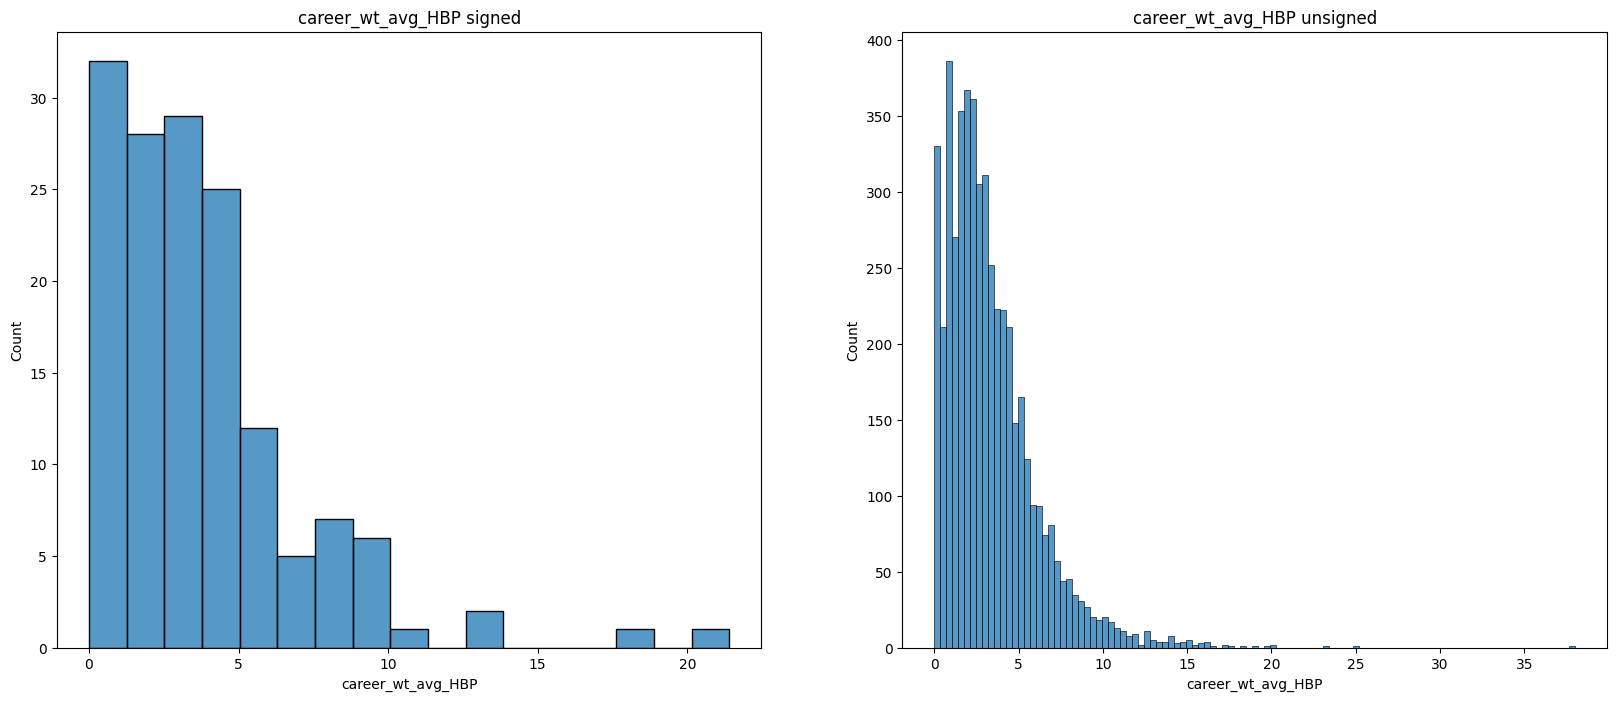

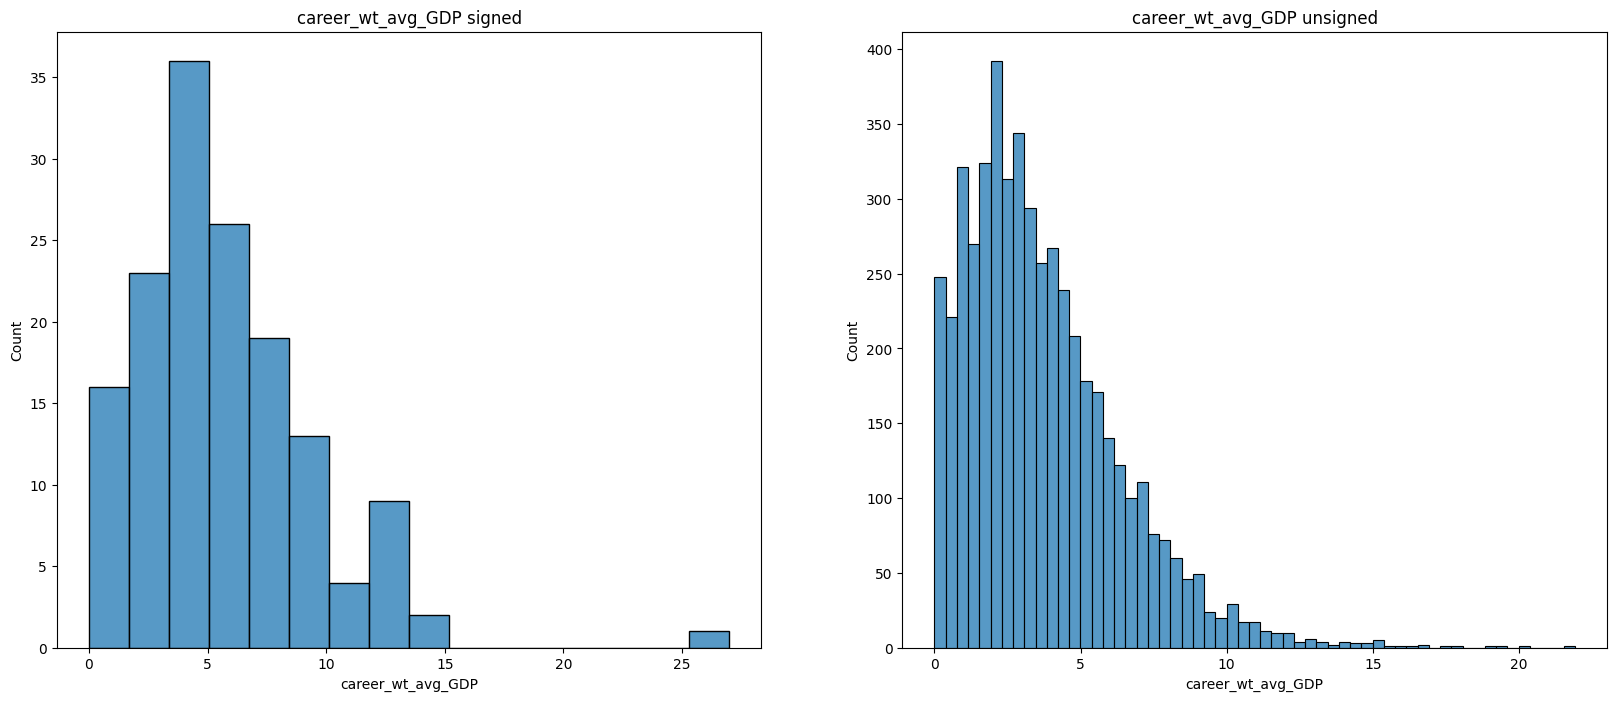

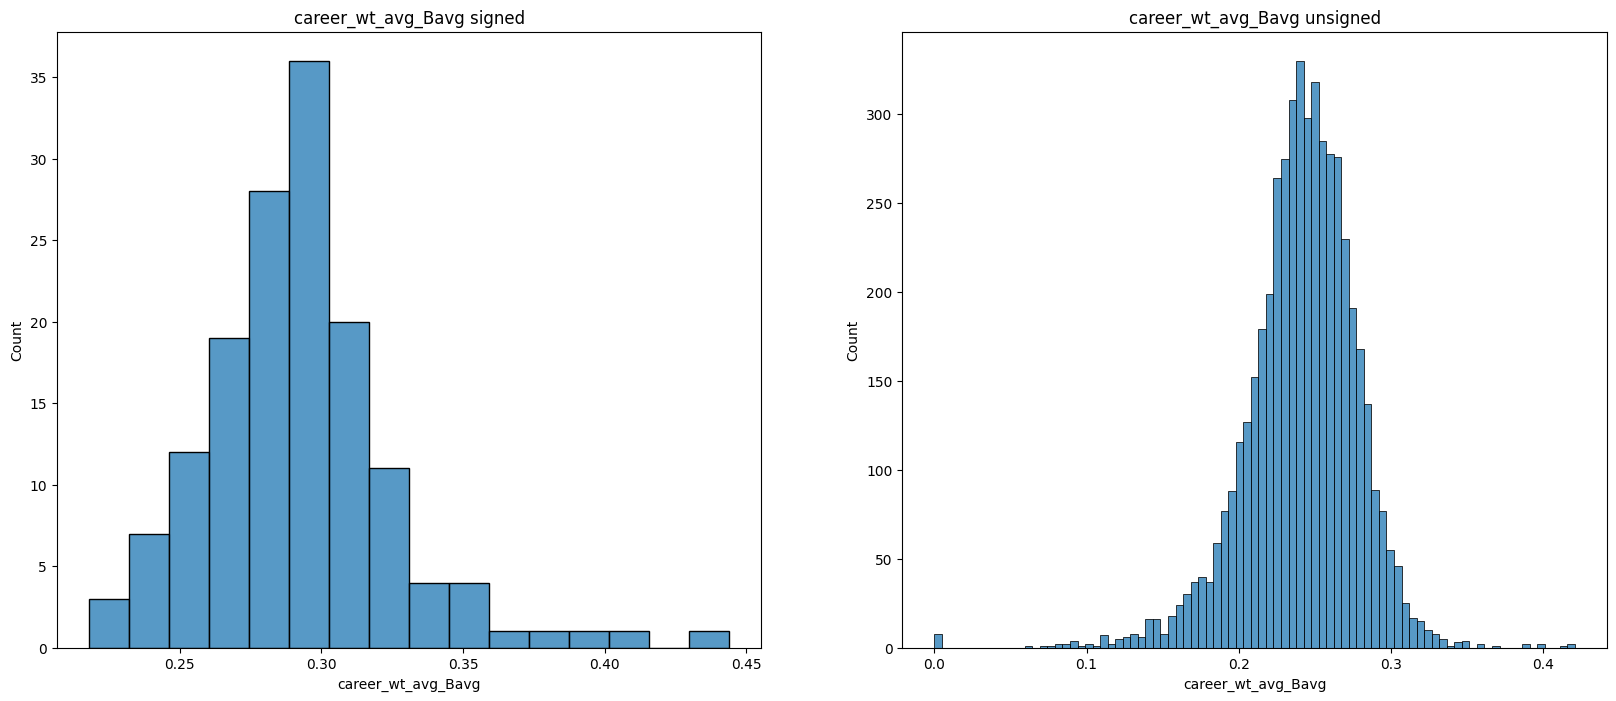

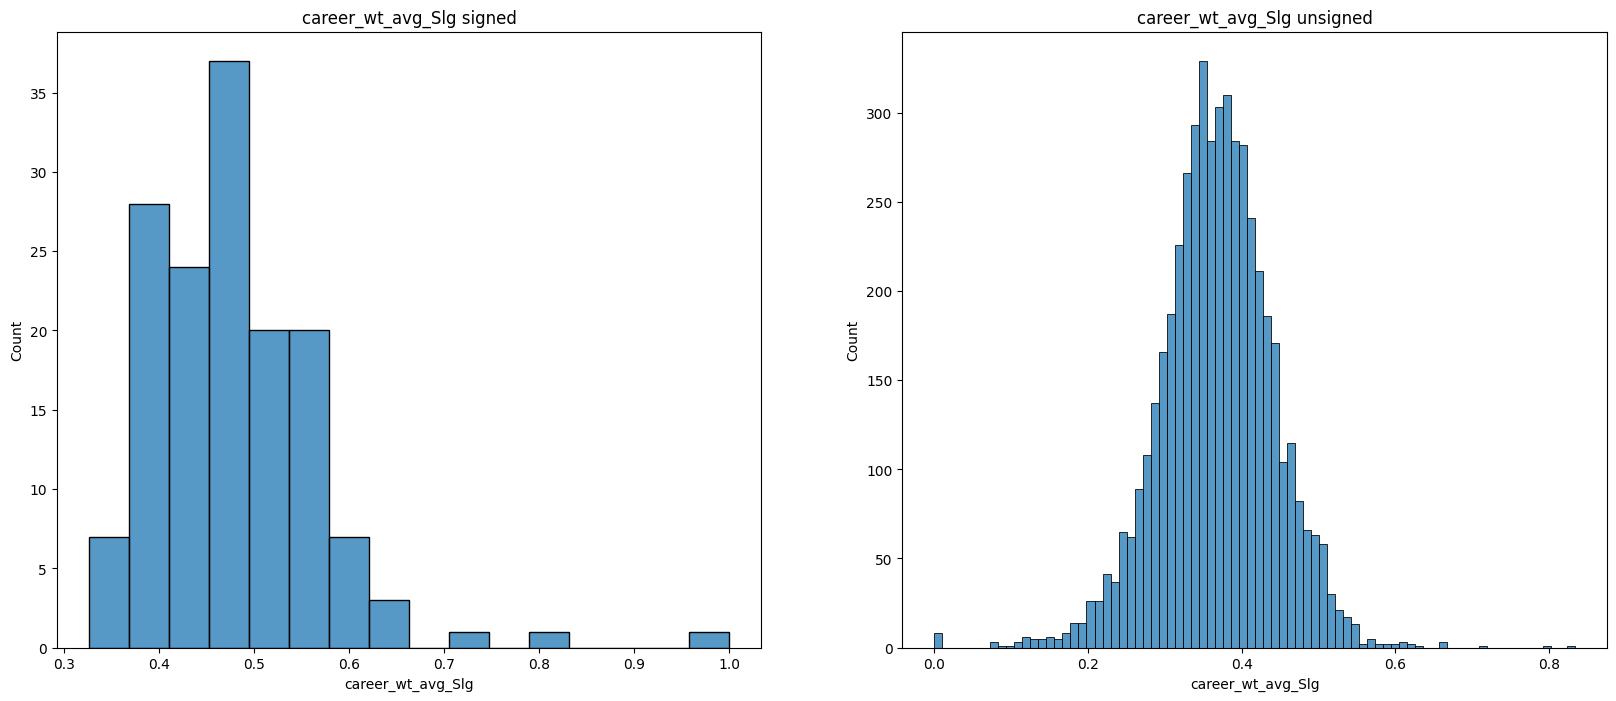

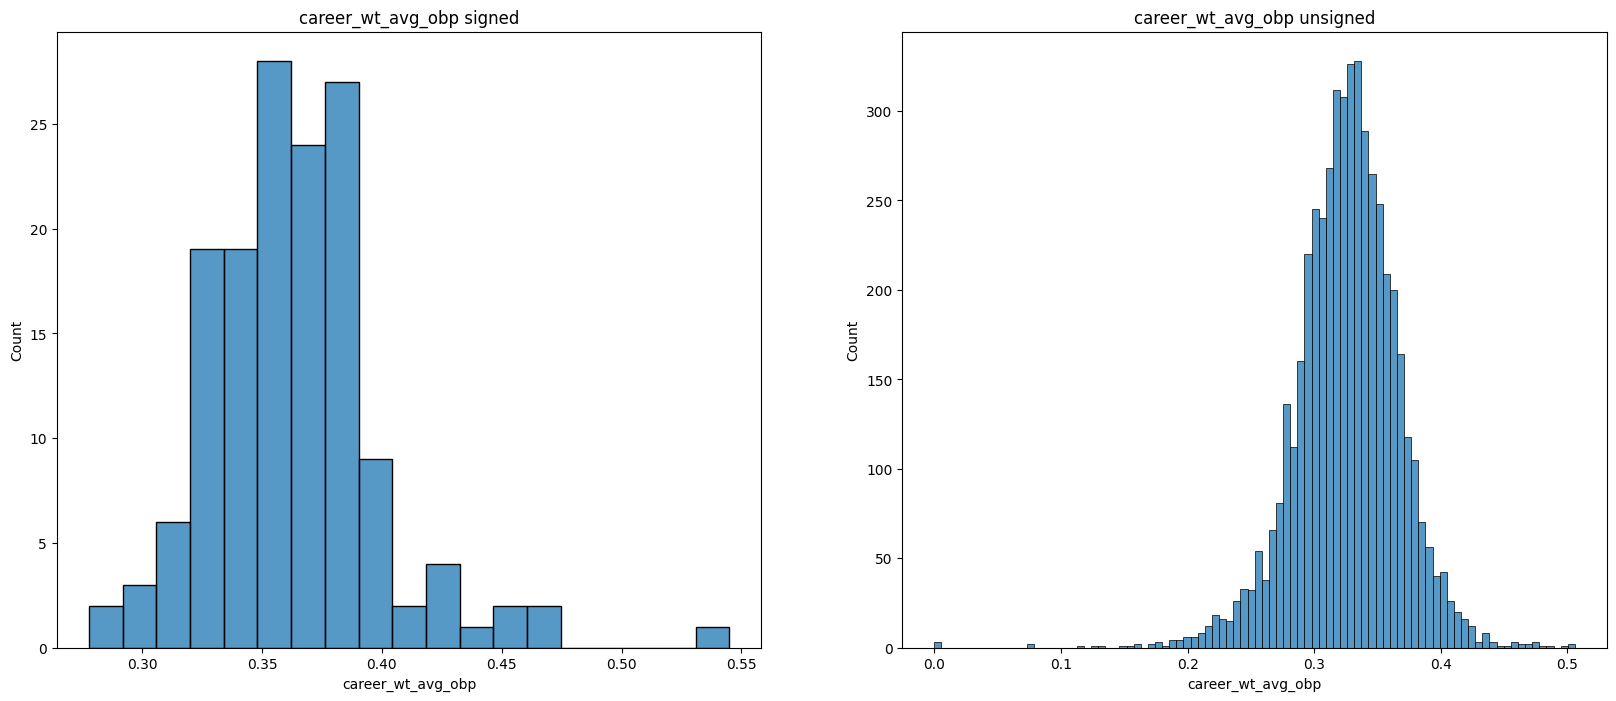

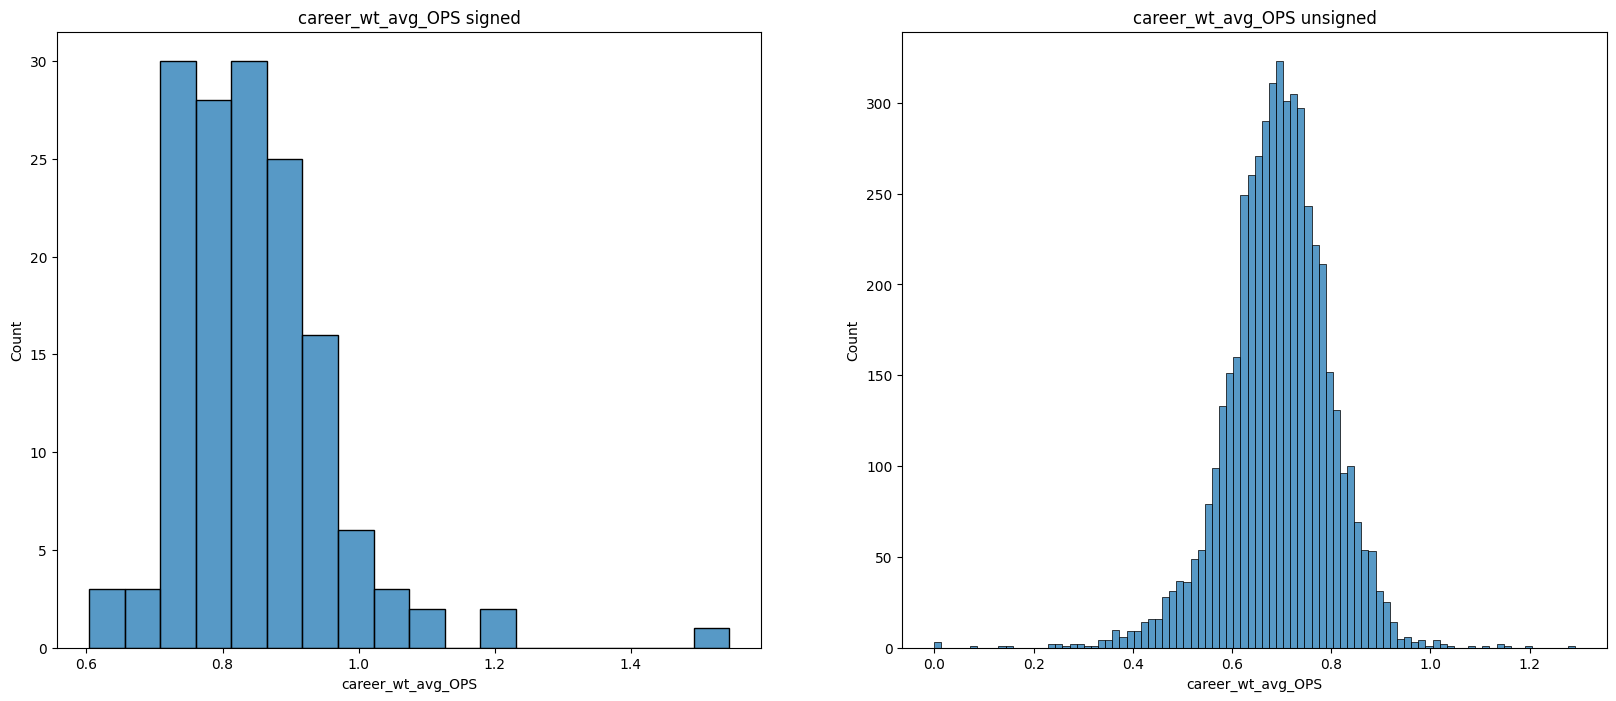

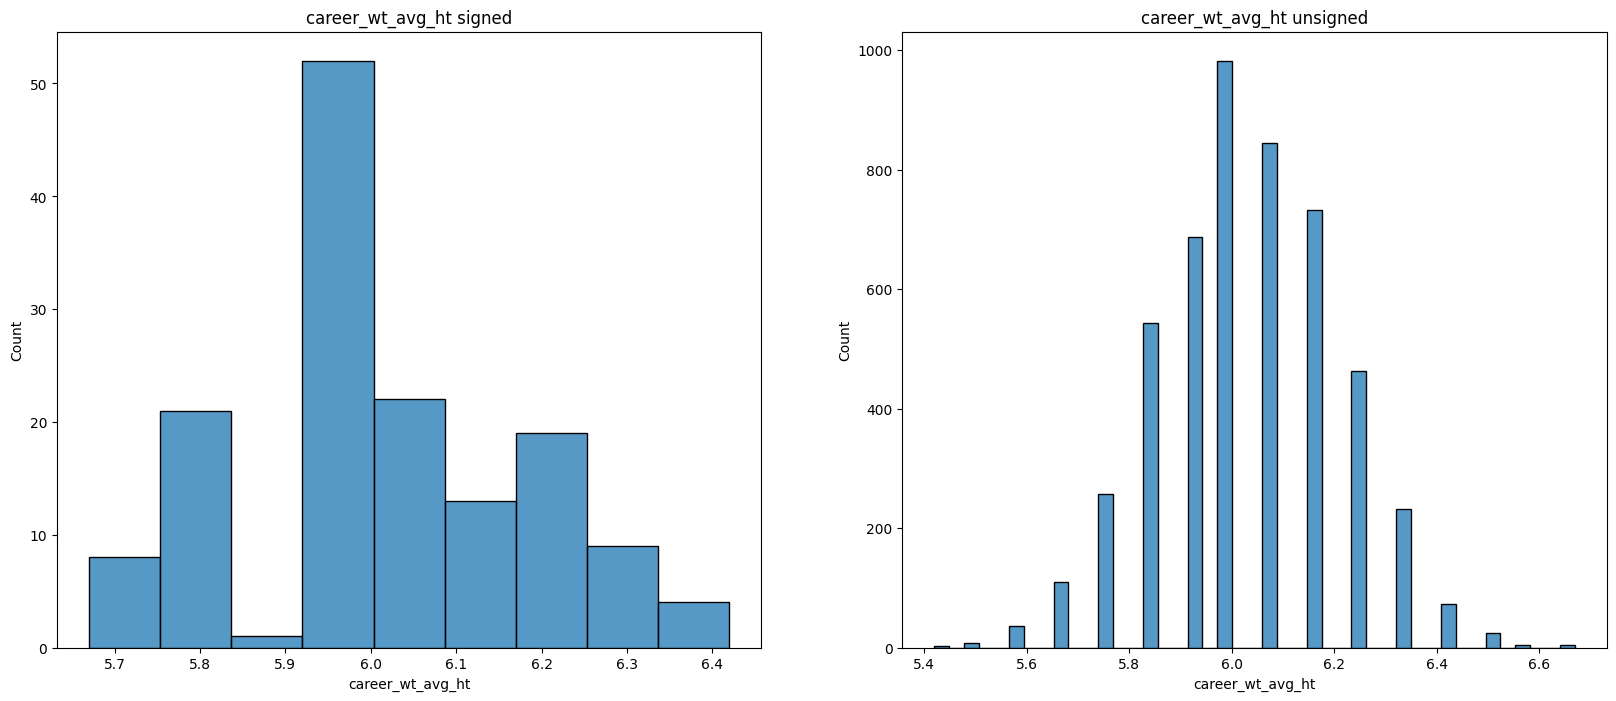

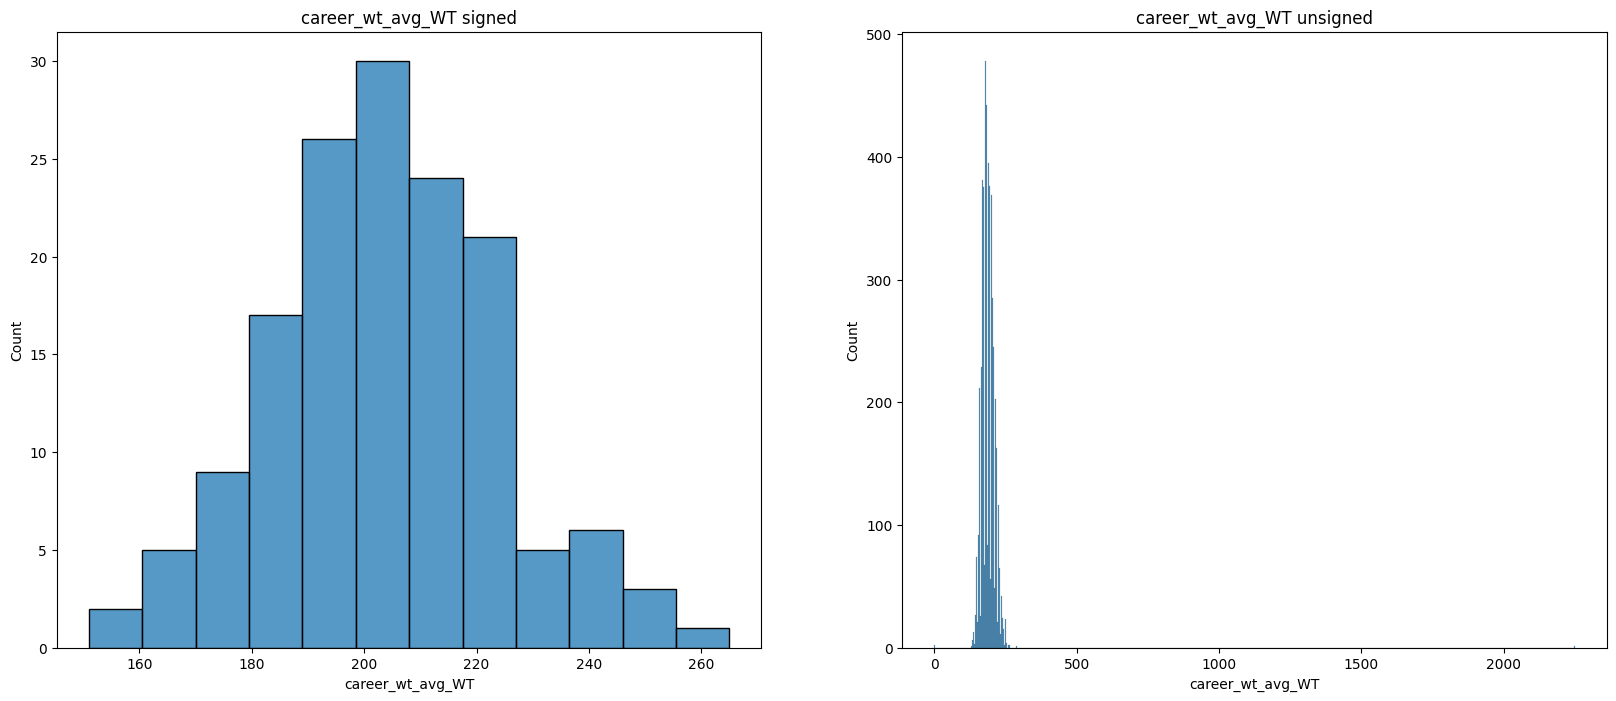

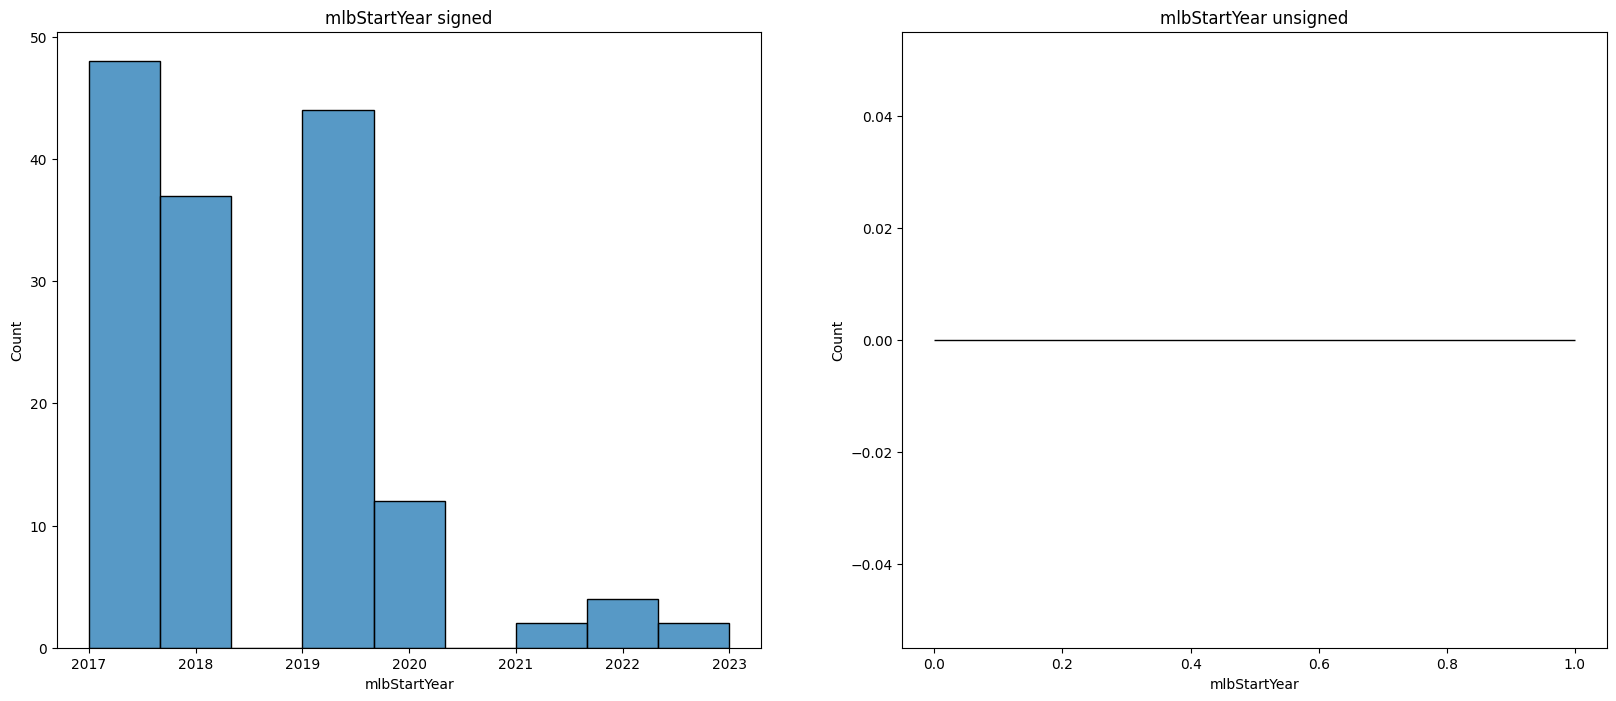

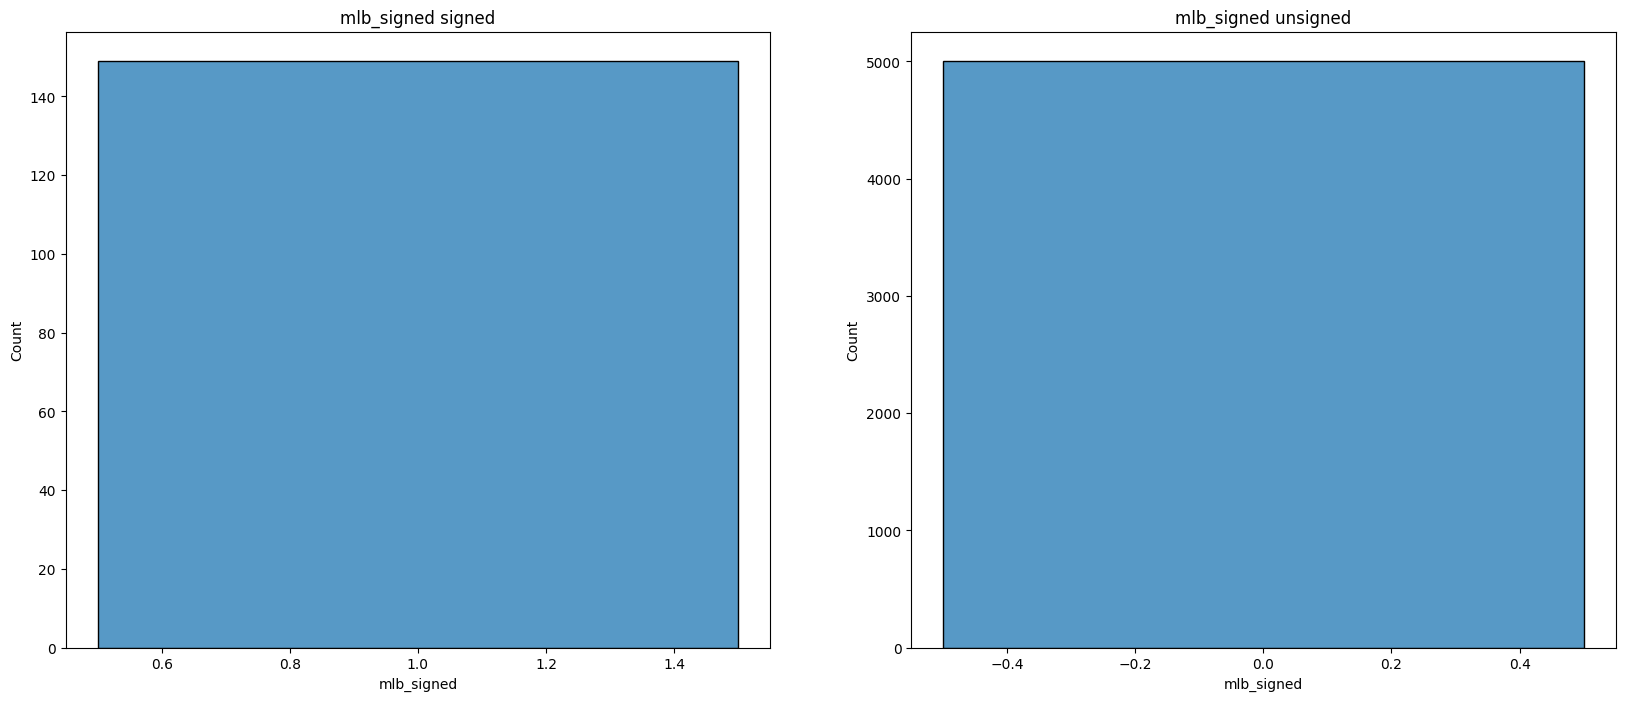

In [26]:
career_batting_comb = weighted_bat_car.merge(df_contracts_sub, left_on = "playerid", right_on = "playerid", how = "left")

career_batting_comb["mlb_signed"] = np.where(career_batting_comb["mlbStartYear"].notnull(), 1, 0)
import matplotlib.pyplot as plt
import seaborn as sns

signed_df = career_batting_comb[career_batting_comb["mlb_signed"] == 1]

unsigned_df = career_batting_comb[career_batting_comb["mlb_signed"] == 0]

for i in career_batting_comb.columns.tolist():

    if i not in ("lastName", "firstName", "playerid", "year"):

        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
        sns.histplot(signed_df[i], ax=ax1).set_title(f"{i} signed")
        sns.histplot(unsigned_df[i],ax=ax2).set_title(f"{i} unsigned")
        plt.show()

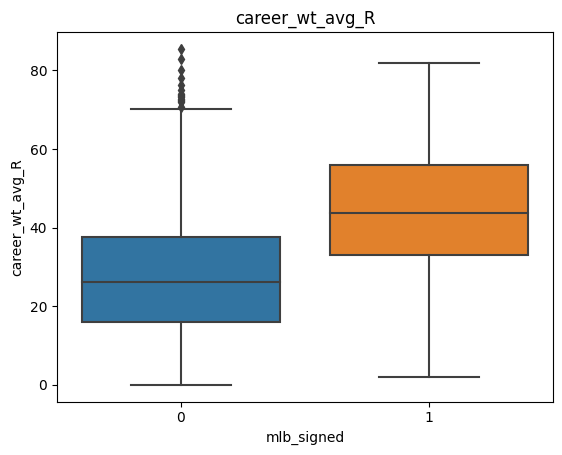

Signed and Unsigned players have a different distribution for career_wt_avg_R


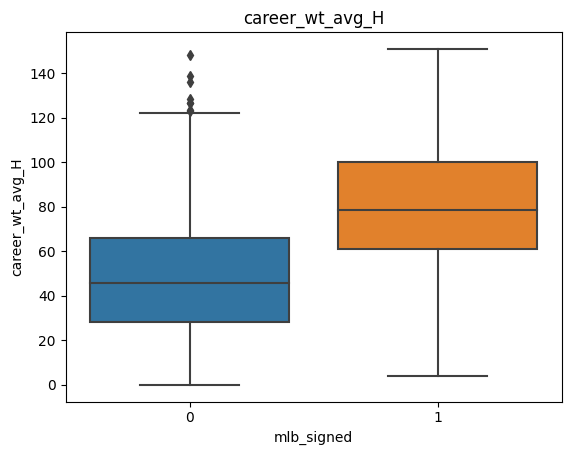

Signed and Unsigned players have a different distribution for career_wt_avg_H


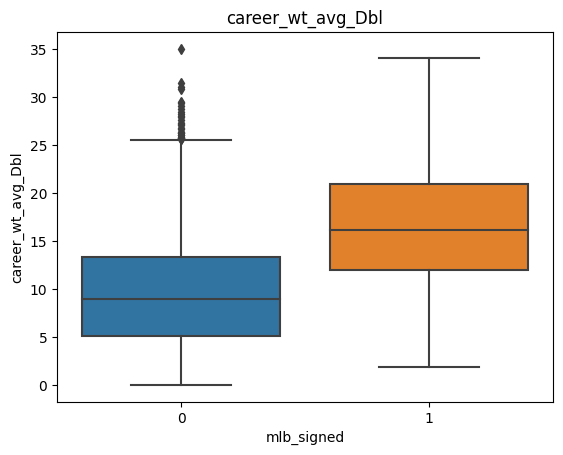

Signed and Unsigned players have a different distribution for career_wt_avg_Dbl


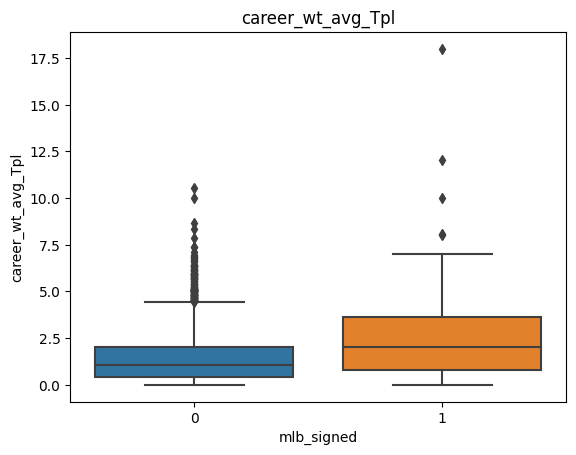

Signed and Unsigned players have a different distribution for career_wt_avg_Tpl


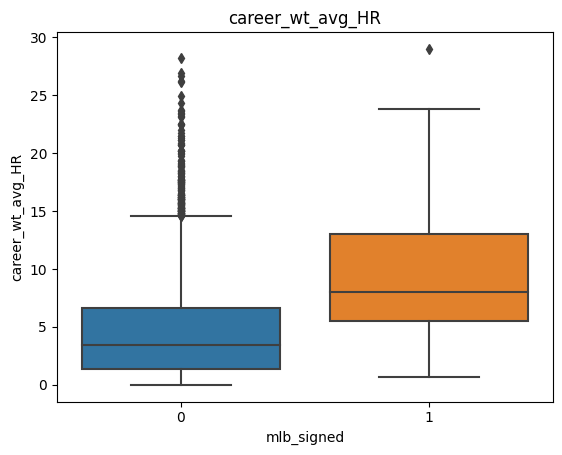

Signed and Unsigned players have a different distribution for career_wt_avg_HR


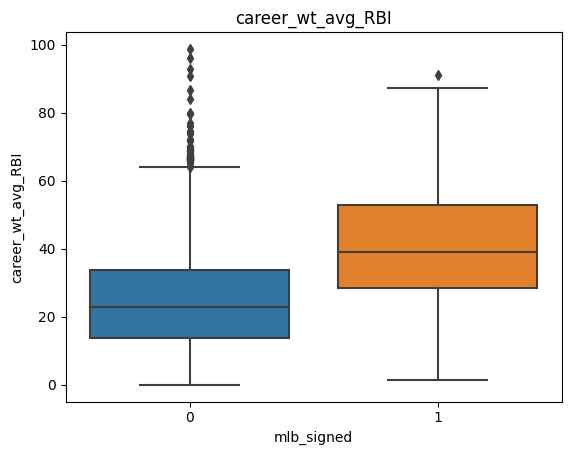

Signed and Unsigned players have a different distribution for career_wt_avg_RBI


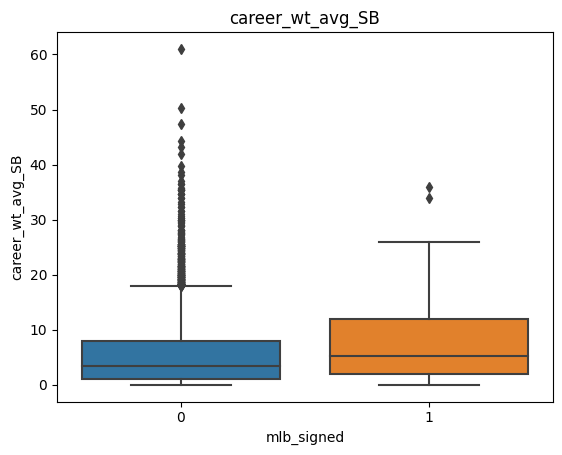

Signed and Unsigned players have a different distribution for career_wt_avg_SB


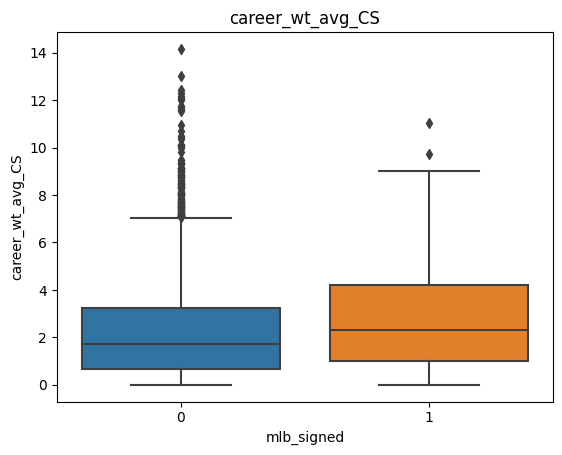

Signed and Unsigned players have a different distribution for career_wt_avg_CS


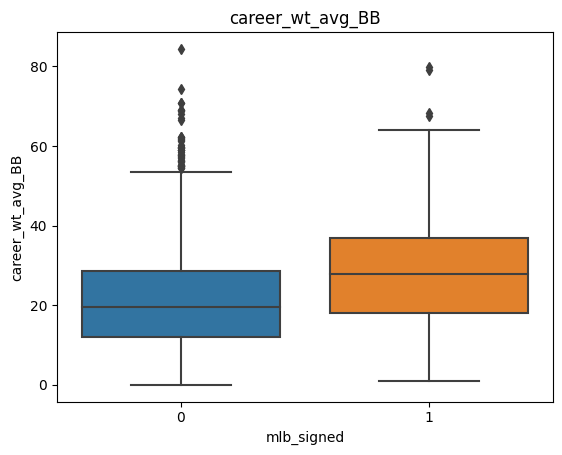

Signed and Unsigned players have a different distribution for career_wt_avg_BB


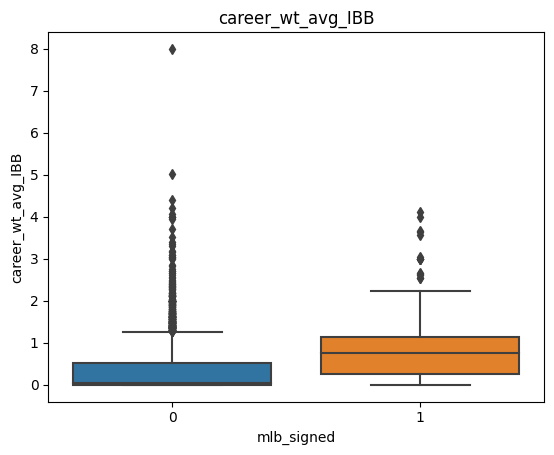

Signed and Unsigned players have a different distribution for career_wt_avg_IBB


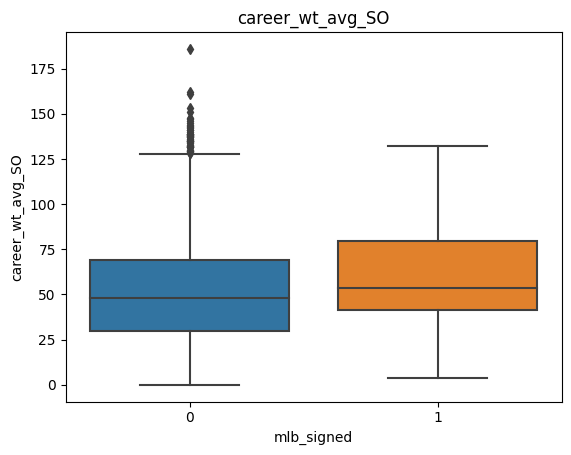

Signed and Unsigned players have a different distribution for career_wt_avg_SO


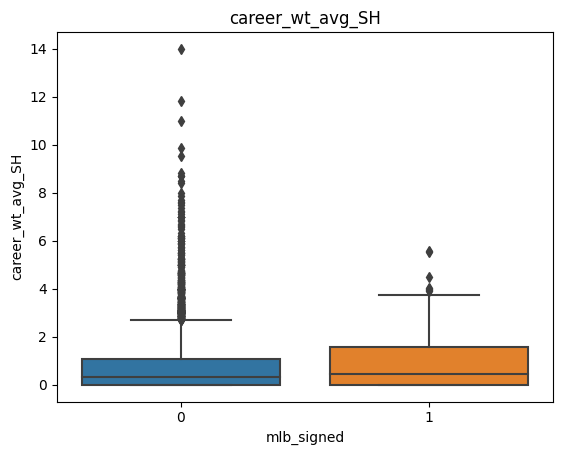

Null hypothesis (equal means) cannot be rejected for career_wt_avg_SH.


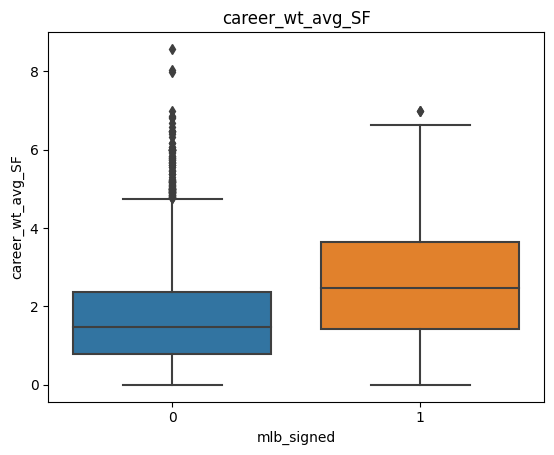

Signed and Unsigned players have a different distribution for career_wt_avg_SF


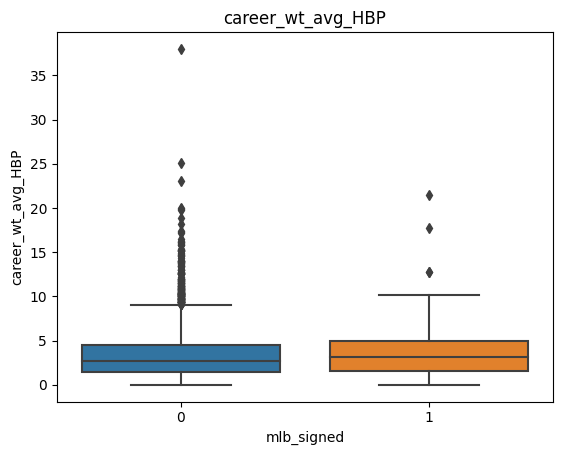

Null hypothesis (equal means) cannot be rejected for career_wt_avg_HBP.


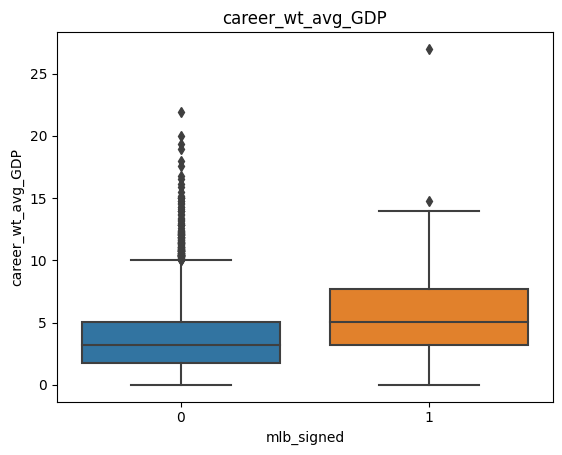

Signed and Unsigned players have a different distribution for career_wt_avg_GDP


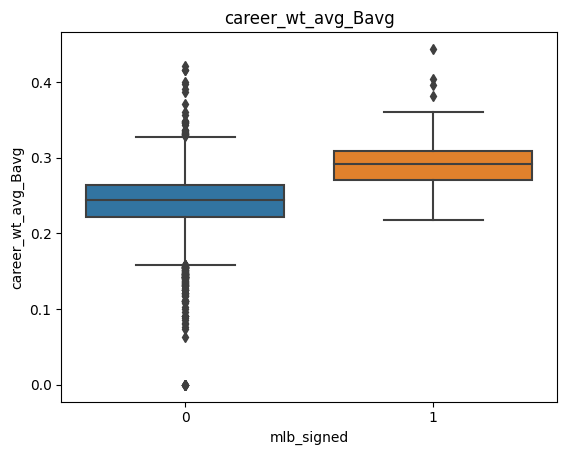

Signed and Unsigned players have a different distribution for career_wt_avg_Bavg


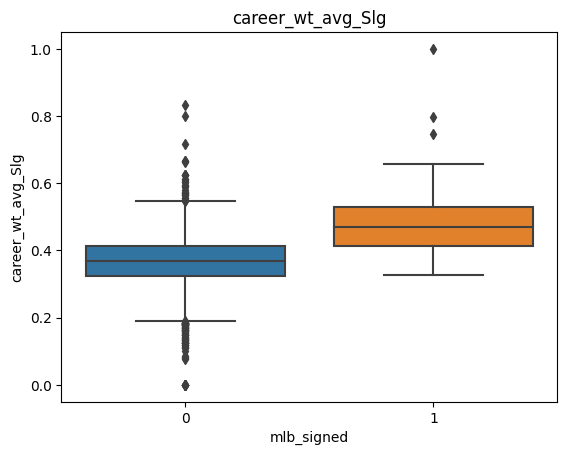

Signed and Unsigned players have a different distribution for career_wt_avg_Slg


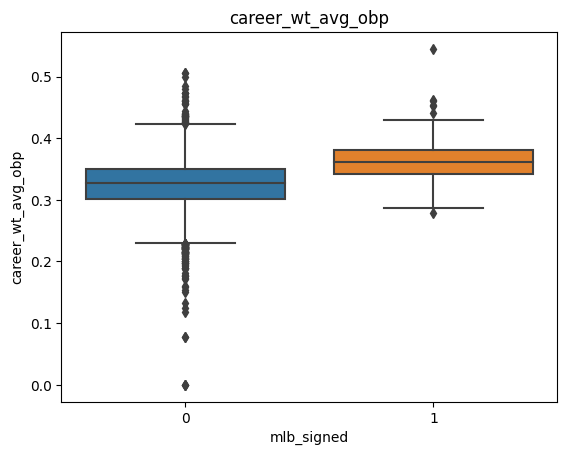

Signed and Unsigned players have a different distribution for career_wt_avg_obp


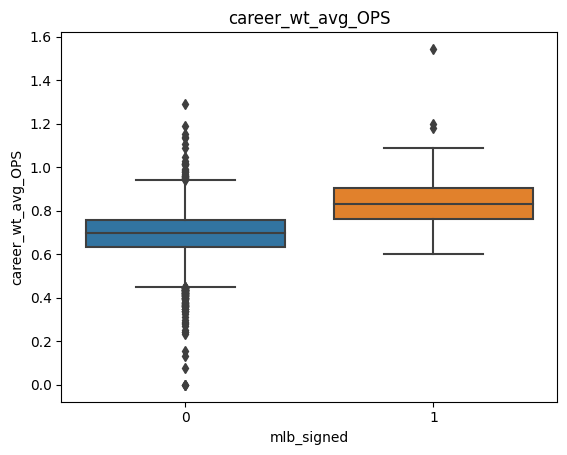

Signed and Unsigned players have a different distribution for career_wt_avg_OPS


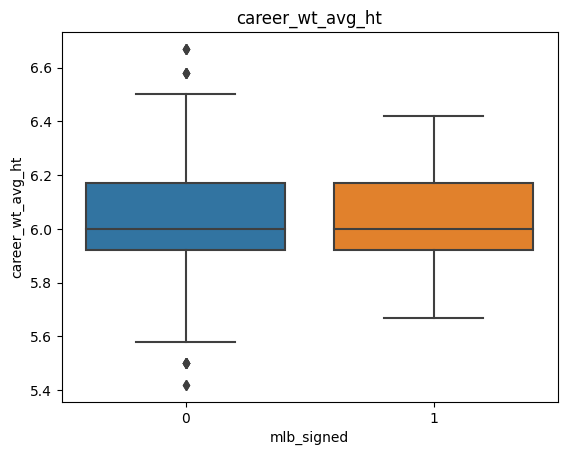

Null hypothesis (equal means) cannot be rejected for career_wt_avg_ht.


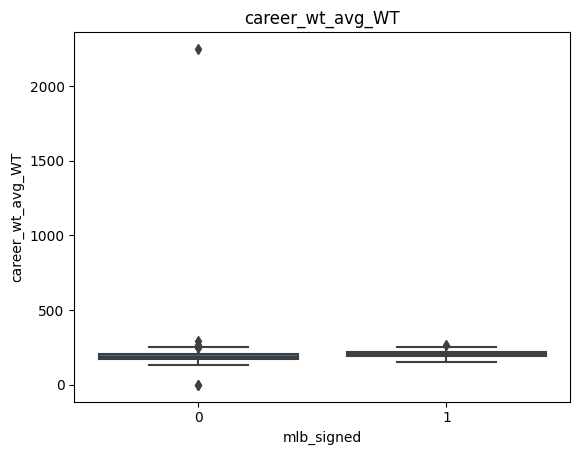

Signed and Unsigned players have a different distribution for career_wt_avg_WT


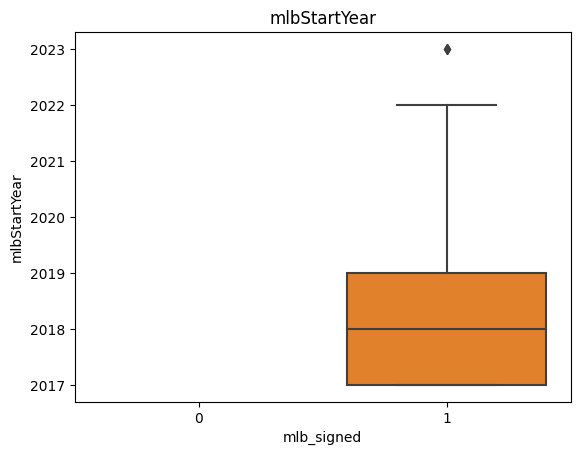

Null hypothesis (equal means) cannot be rejected for mlbStartYear.


In [27]:
from scipy import stats

for i in career_batting_comb.columns.tolist():

    if i not in ("lastName", "firstName", "playerid", "year", "mlb_signed"):

        t,p = stats.ttest_ind(career_batting_comb[f"{i}"][career_batting_comb.mlb_signed.eq(0)], career_batting_comb[f"{i}"][career_batting_comb.mlb_signed.eq(1)], 
                      equal_var=False, alternative='two-sided')

        sns.boxplot(x="mlb_signed", y=f"{i}", data = career_batting_comb).set_title(f"{i}")
        plt.show()

        if p < 0.05:
            print(f'Signed and Unsigned players have a different distribution for {i}')
        else:
            print(f'Null hypothesis (equal means) cannot be rejected for {i}.')

The dataset has a number of outliers. To improve model performance these will be capped at the 95th and 5th percentile. 

In [28]:
col_list = ["career_wt_avg_R", "career_wt_avg_H", "career_wt_avg_Dbl", 
            "career_wt_avg_Tpl", "career_wt_avg_HR", "career_wt_avg_RBI", 
            "career_wt_avg_CS", "career_wt_avg_BB", "career_wt_avg_IBB", 
            "career_wt_avg_SO", "career_wt_avg_SH", "career_wt_avg_SF", 
            "career_wt_avg_HBP", "career_wt_avg_GDP", "career_wt_avg_Bavg", 
            "career_wt_avg_Slg", "career_wt_avg_obp", "career_wt_avg_OPS"]

for col in col_list:
    # Calculate the 1st and 95th percentiles
    lower_threshold = career_batting_comb[col].quantile(0.05)
    upper_threshold = career_batting_comb[col].quantile(0.95)

    # Clip values outside the thresholds
    career_batting_comb[col] = career_batting_comb[col].clip(lower_threshold, upper_threshold)

<Axes: >

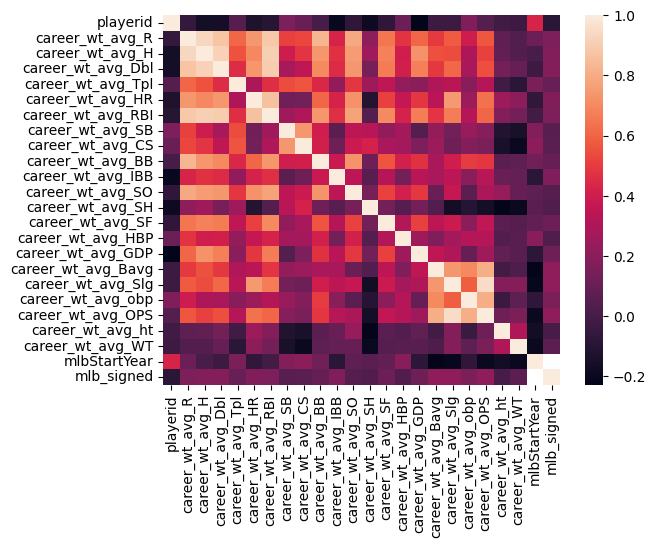

In [29]:
sns.heatmap(career_batting_comb.corr())

In [30]:
career_batting_comb

playerid  career_wt_avg_R  career_wt_avg_H  career_wt_avg_Dbl  \
0          374        13.781473        24.061758           6.311164   
1         3604         8.000000        17.000000           3.000000   
2         3796        24.253886        38.898964           8.733161   
3         4567        23.539474        53.837719           6.868421   
4         4635        21.000000        59.000000           5.000000   
...        ...              ...              ...                ...   
5147    284920        26.677165        65.527559           9.503937   
5148    291323        26.000000        31.000000           7.000000   
5149    291649        29.000000        61.000000           5.000000   
5150    291650        12.000000        11.000000           2.000000   
5151    295940         5.212222        11.363636           1.552470   

      career_wt_avg_Tpl  career_wt_avg_HR  career_wt_avg_RBI  \
0              0.439430          3.693587          15.399050   
1              0.000000          2.000000           8.000000   
2              2.393782          2.958549          21.867876   
3              0.000000          2.934211          16.627193   
4              1.000000          4.000000          24.000000   
...                 ...               ...                ...   
5147           0.944882          2.000000          20.173228   
5148           1.000000          6.000000          26.000000   
5149           0.000000          4.000000          24.000000   
5150           1.000000          0.000000           4.417187   
5151           0.000000          0.000000           6.181818   

      career_wt_avg_SB  career_wt_avg_CS  career_wt_avg_BB  ...  \
0             0.000000          0.439430         19.144893  ...   
1             0.000000          0.000000         11.000000  ...   
2             1.945596          0.152850         16.756477  ...   
3             0.000000          0.978070         17.671053  ...   
4             4.000000          2.000000         13.000000  ...   
...                ...               ...               ...  ...   
5147          1.889764          0.944882         26.456693  ...   
5148          5.000000          2.000000         22.000000  ...   
5149          4.000000          3.000000         26.000000  ...   
5150         10.000000          1.000000         14.000000  ...   
5151          0.000000          0.000000          6.045455  ...   

      career_wt_avg_HBP  career_wt_avg_GDP  career_wt_avg_Bavg  \
0              1.643705           2.688836            0.180562   
1              0.065136           1.000000            0.215000   
2              0.914508           4.554404            0.253544   
3              3.912281           4.890351            0.250355   
4              0.065136           7.000000            0.266000   
...                 ...                ...                 ...   
5147           0.065136           4.779528            0.295772   
5148           2.000000           3.000000            0.254000   
5149           4.000000           6.000000            0.276000   
5150           3.000000           0.396765            0.256000   
5151           0.863636           3.454545            0.180562   

      career_wt_avg_Slg  career_wt_avg_obp  career_wt_avg_OPS  \
0              0.299204           0.277622           0.576827   
1              0.329000           0.311000           0.640000   
2              0.401541           0.336135           0.737676   
3              0.324184           0.318864           0.643048   
4              0.351000           0.303000           0.654000   
...                 ...                ...                ...   
5147           0.394197           0.364748           0.758000   
5148           0.475000           0.369000           0.845000   
5149           0.353000           0.361000           0.714000   
5150           0.349000           0.389009           0.816000   
5151           0.248013           0.259585           0.523138   

     

In [31]:
career_batting_comb.mlb_signed.value_counts()

0    5003
1     149
Name: mlb_signed, dtype: int64

From the visuals it is clear that there a number of metrics that have a separation between signed and unsigned players. Hits, Runs, Doubles, Home Runs, On Base Percentage, On Base Plus Slugging, Batting Average and Slugging all have a higher median for signed players. The distinction between these two groups is further supported by the passing of the hypothesis test at a significance of 0.05. Additionally, a number of the metrics are right skewed and will likely need to be transformed prior to being used in the logistic regression model. 

The heat map shows there does appear to be some colinearity between different hitting metrics. Runs, Hits, HR, and Doubles all have over .6 correlation, which intiuitively makes sense. If a player is a talented hitter they will both have a higher frequency of hits, homeruns, and runs. However, there is a not a variable with a high correlation with making it to the MLB. 

Most importantly, however, is that the data set is very imbalanced. To better train the model the SMOTE, synthetic minority oversampling technique will be used to artificially increase the number of signed players in the training data set. This is achieved by finding a line between two closely connected minority class points and creating a new minority class point on the line.

### Pitching Visuals

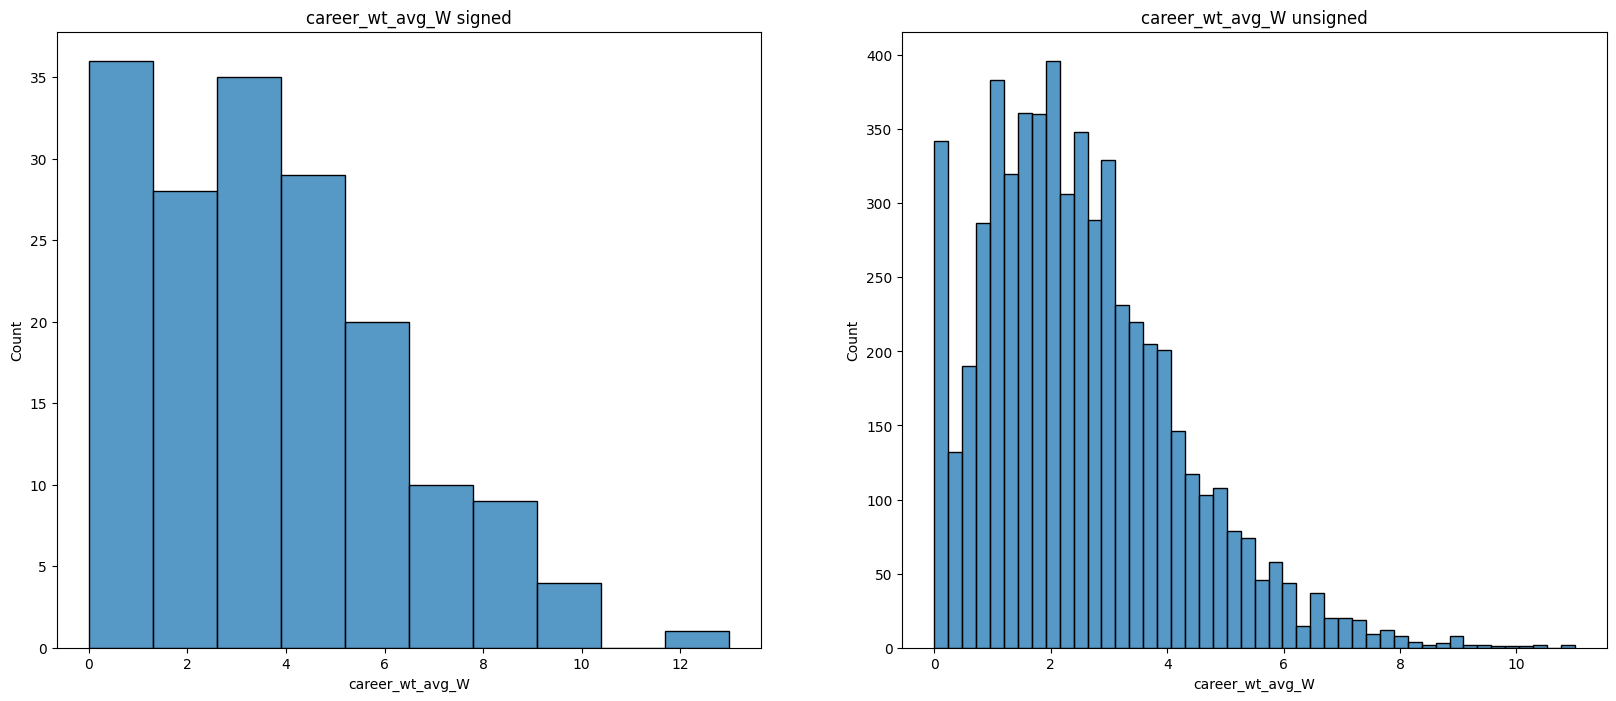

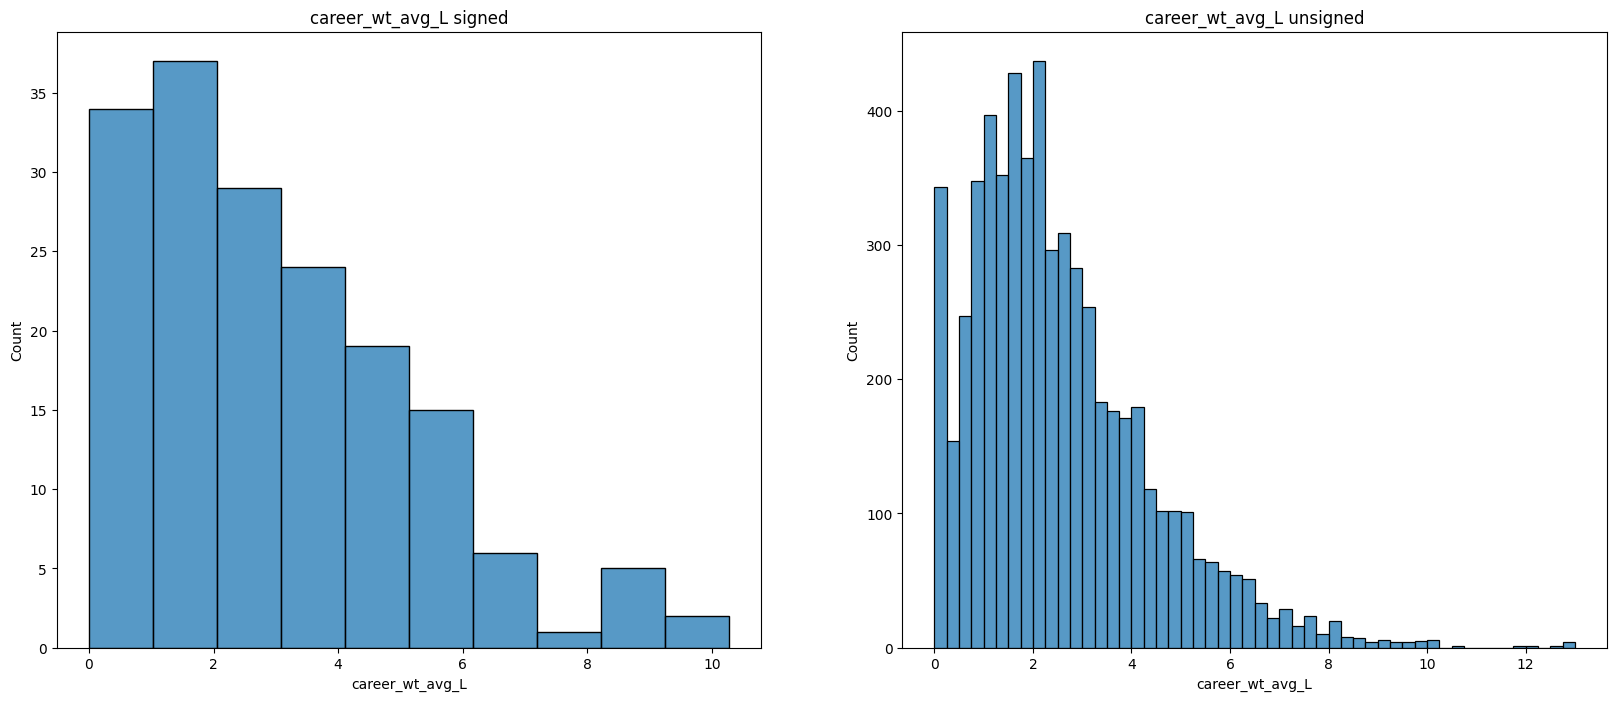

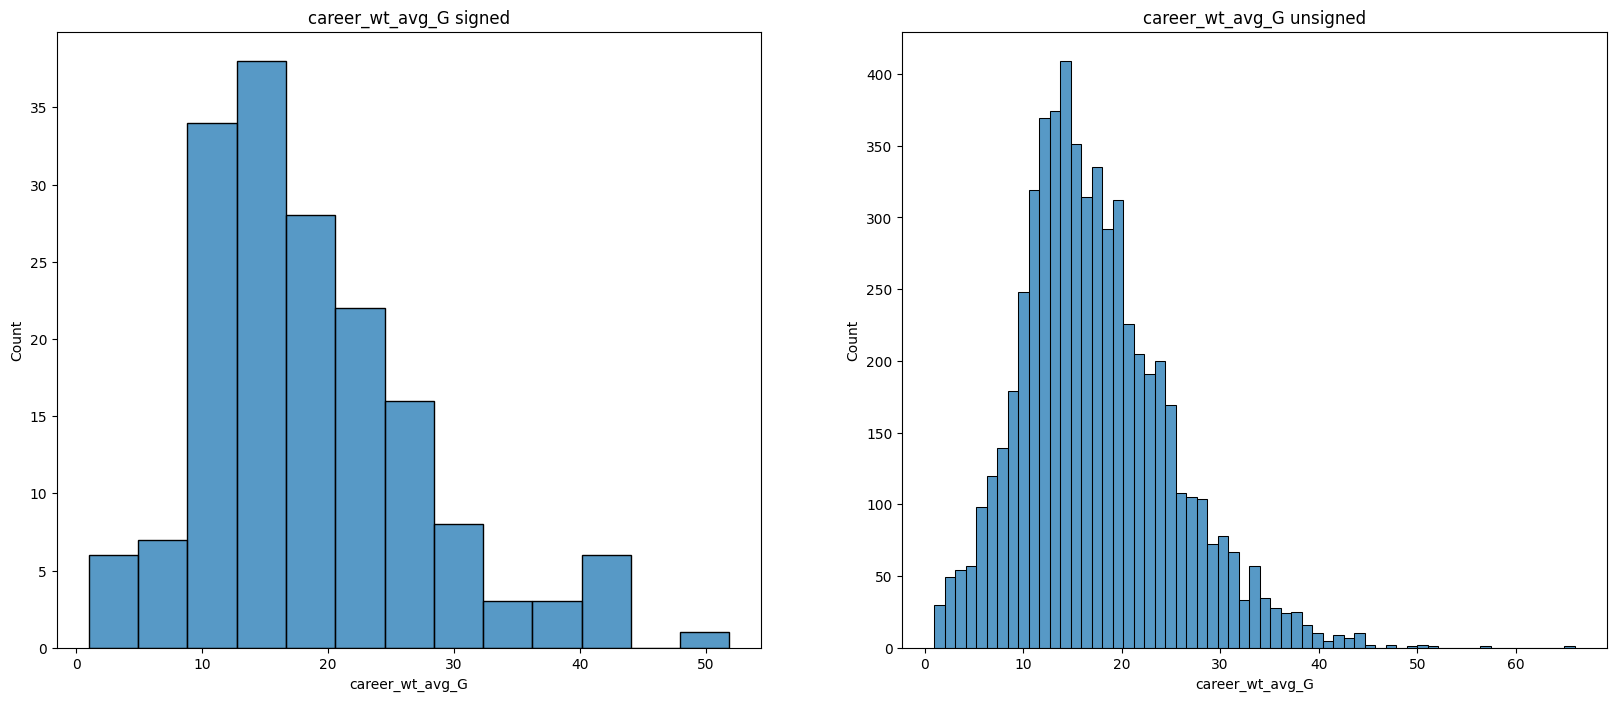

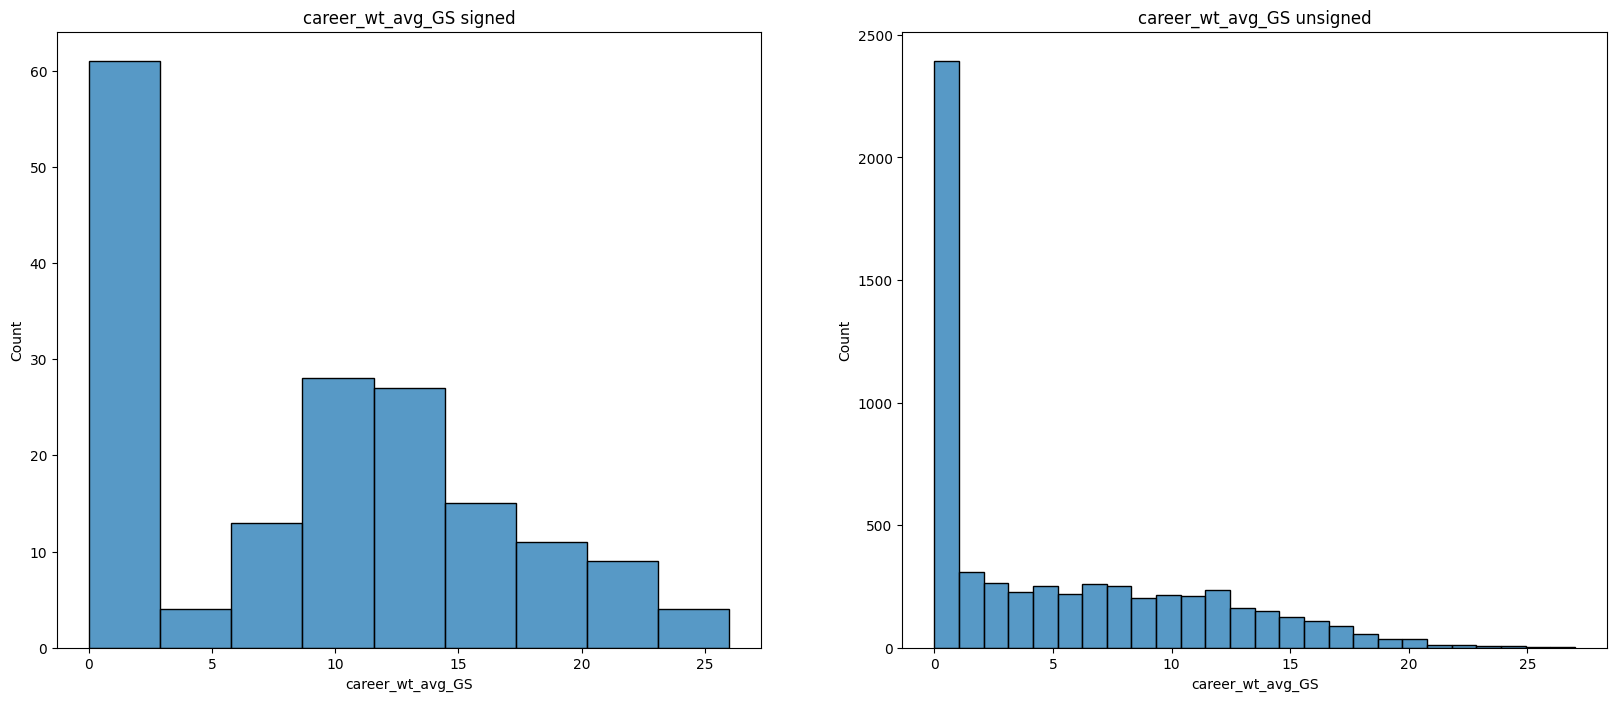

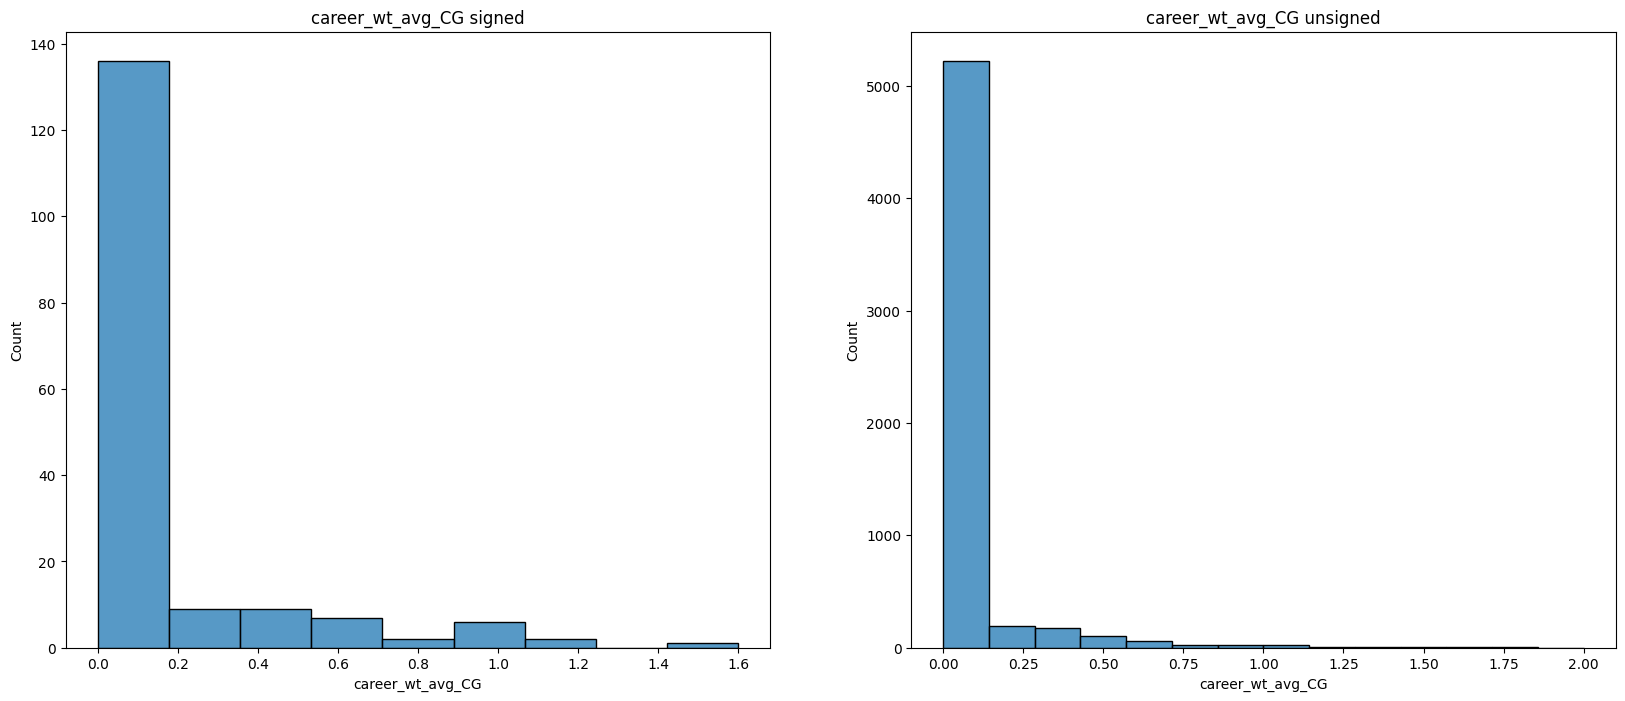

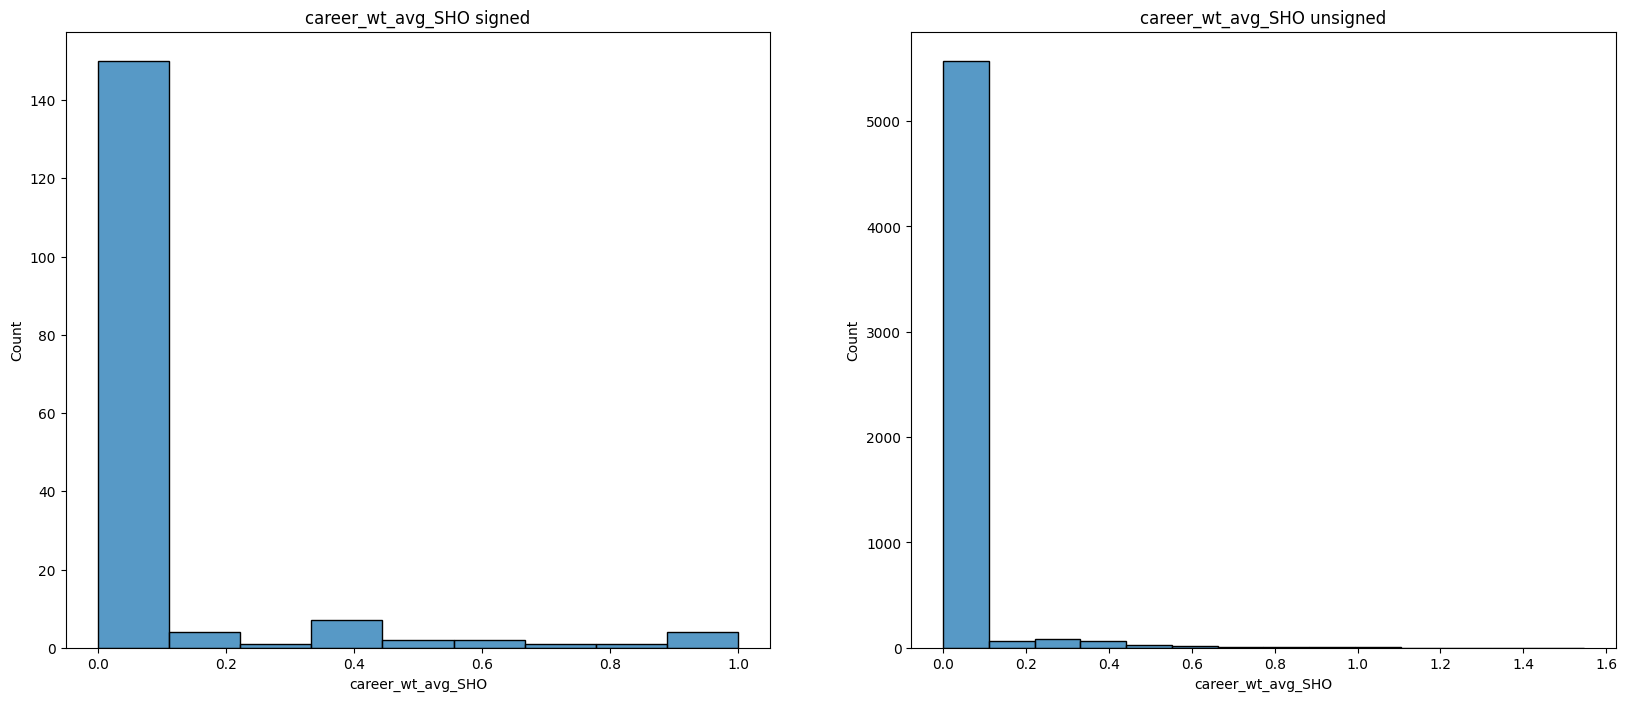

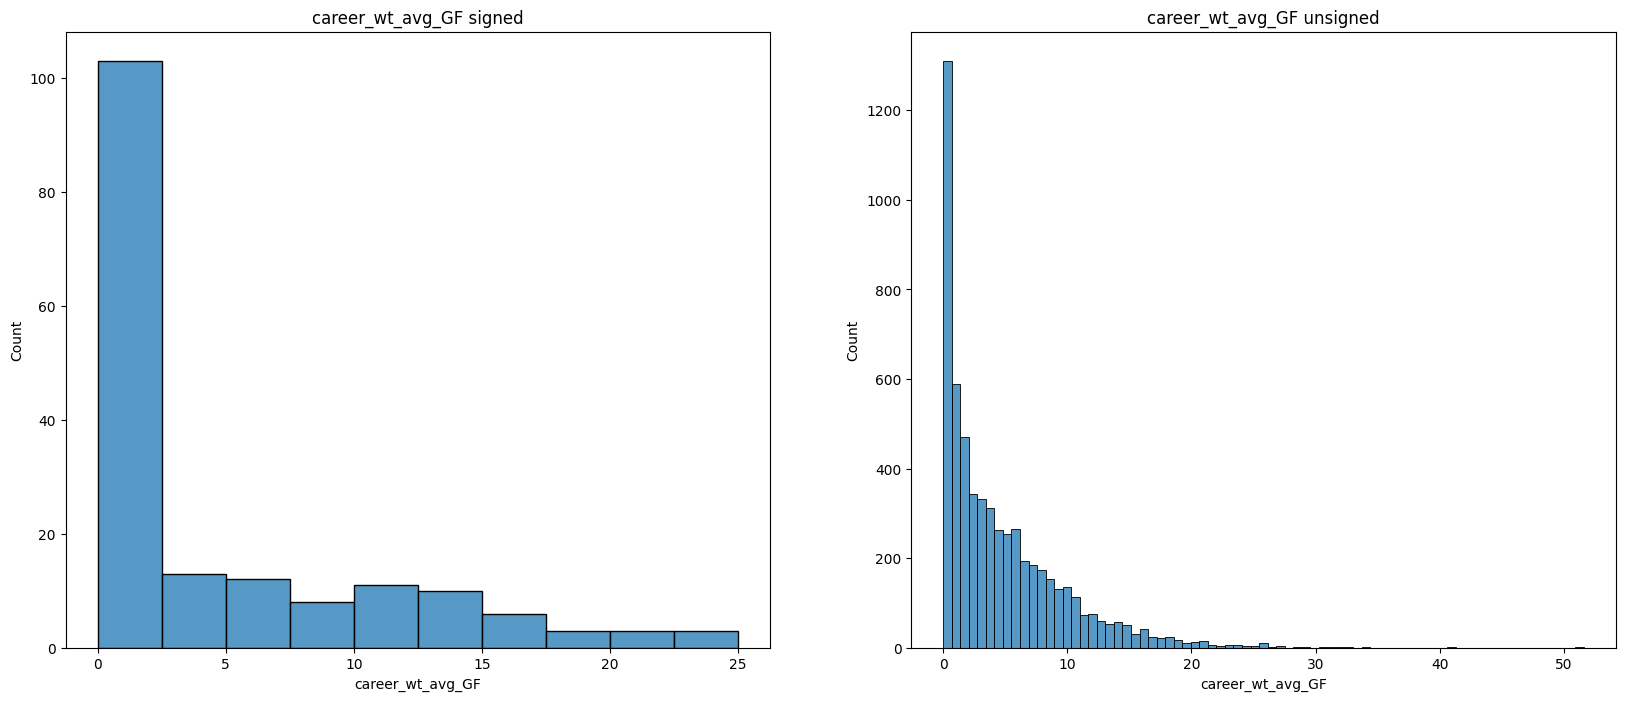

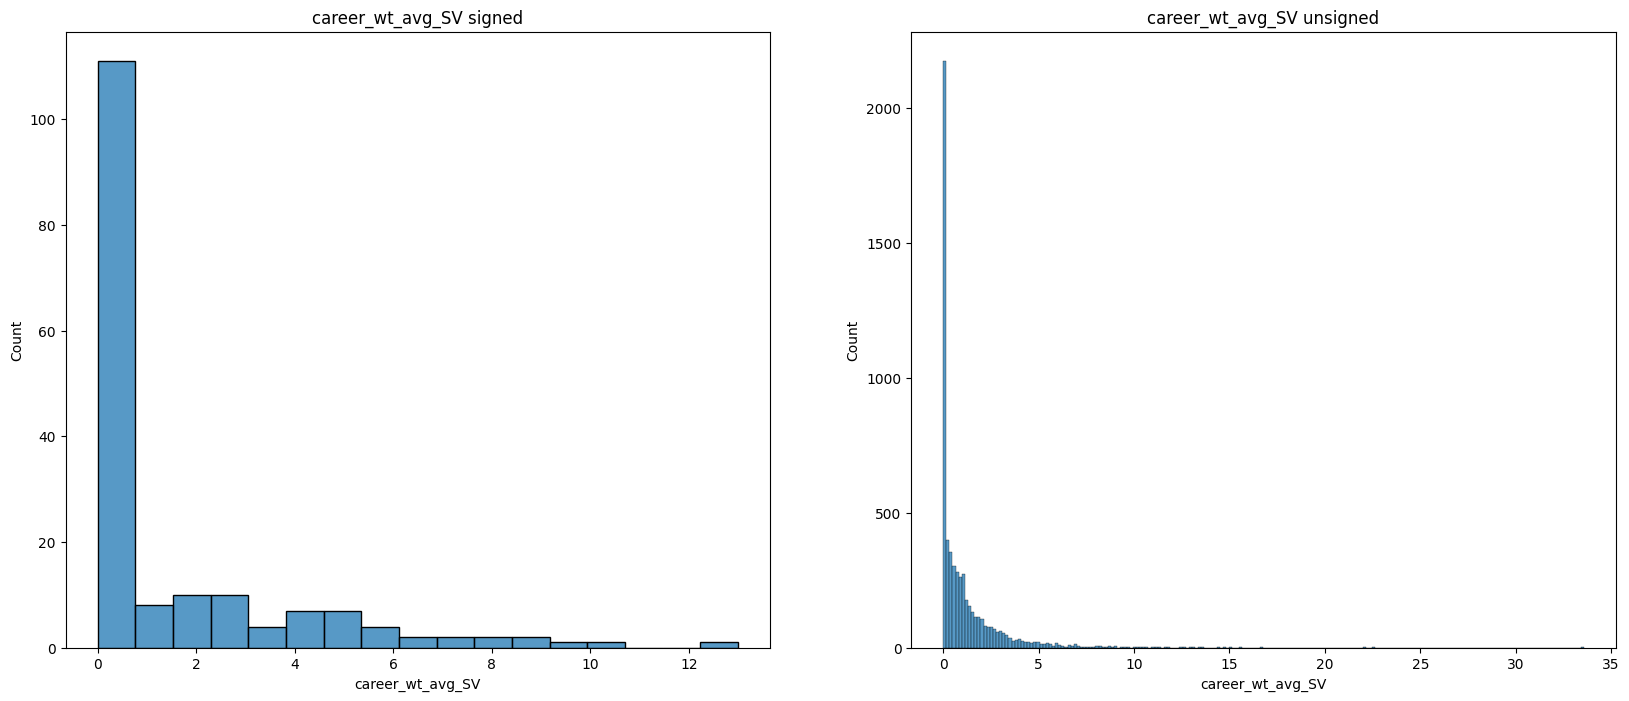

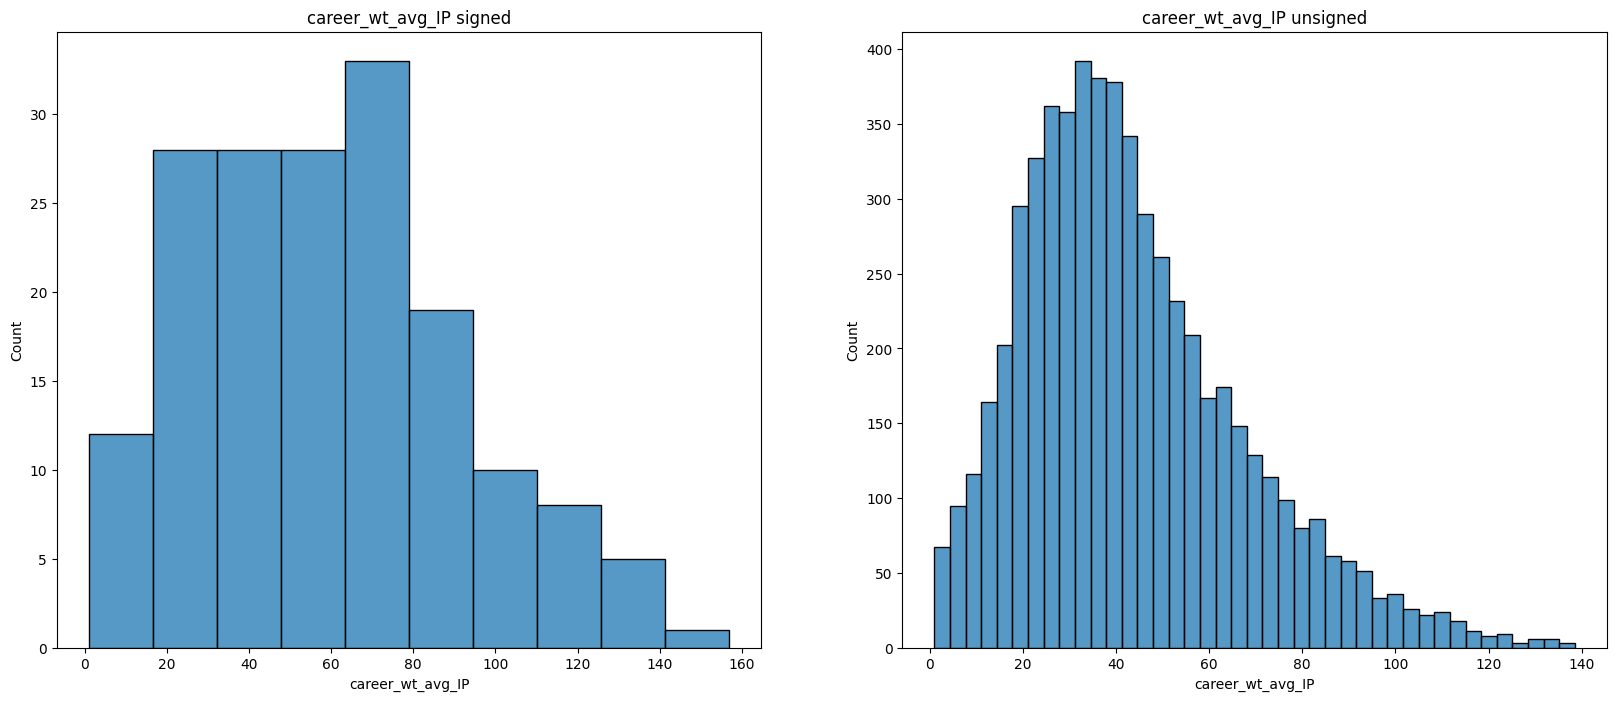

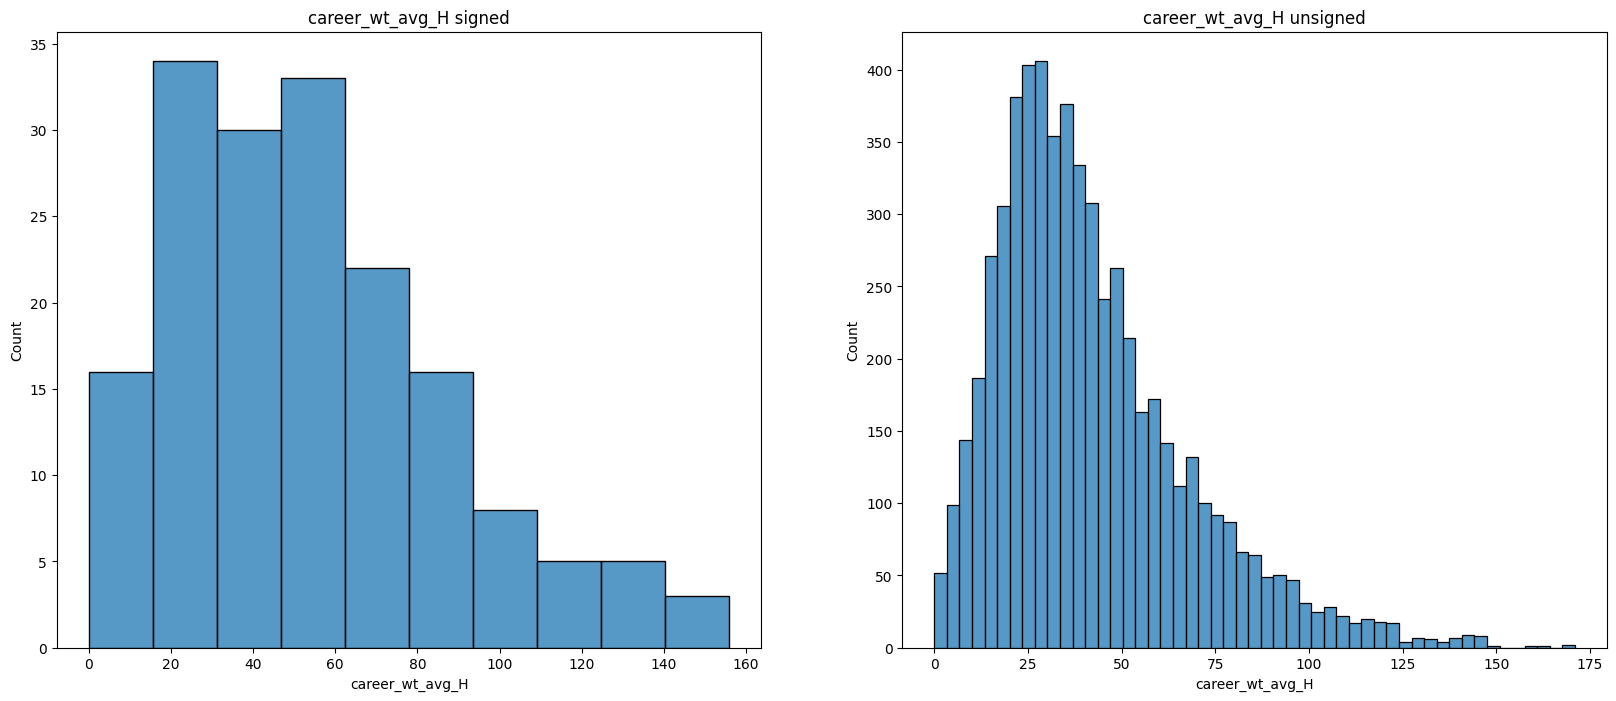

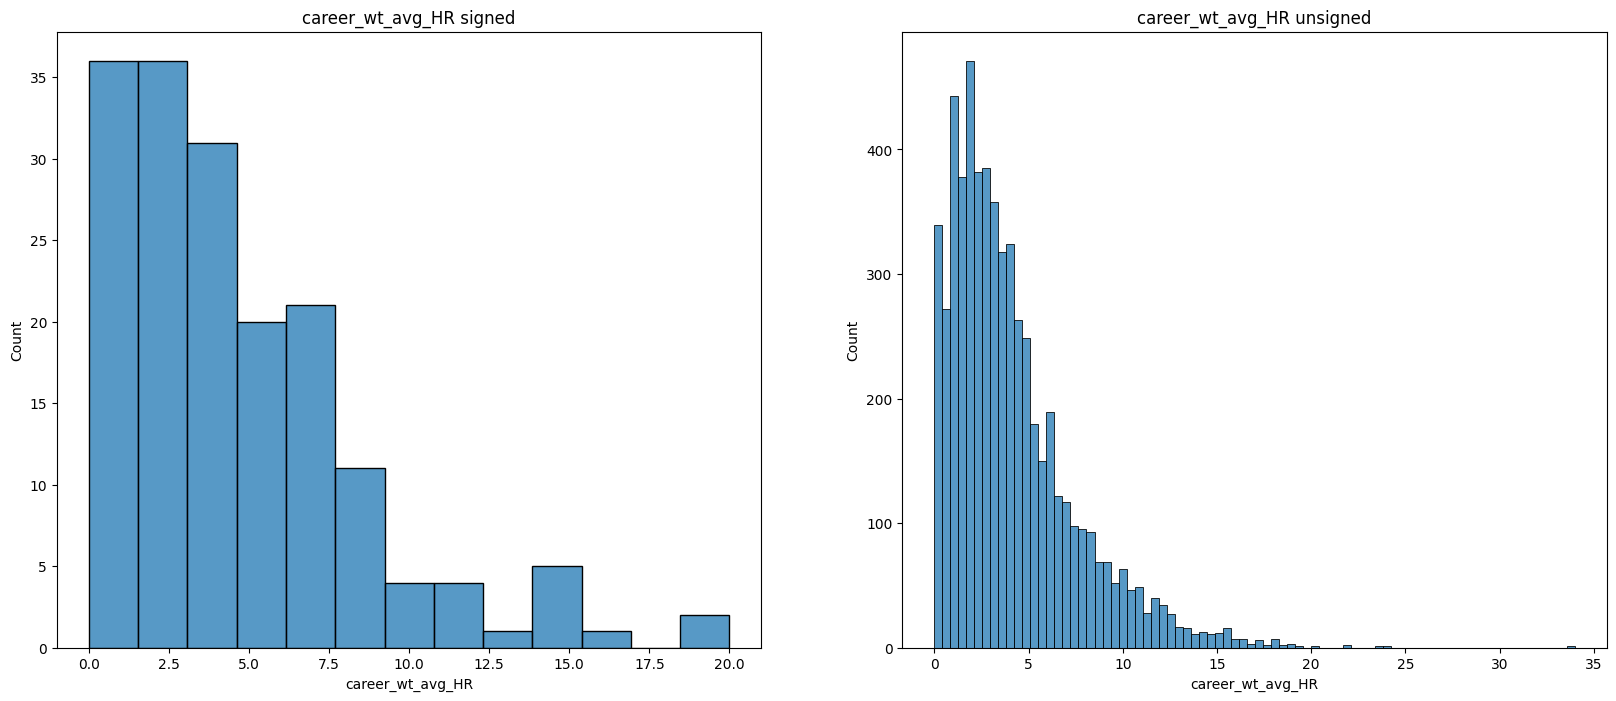

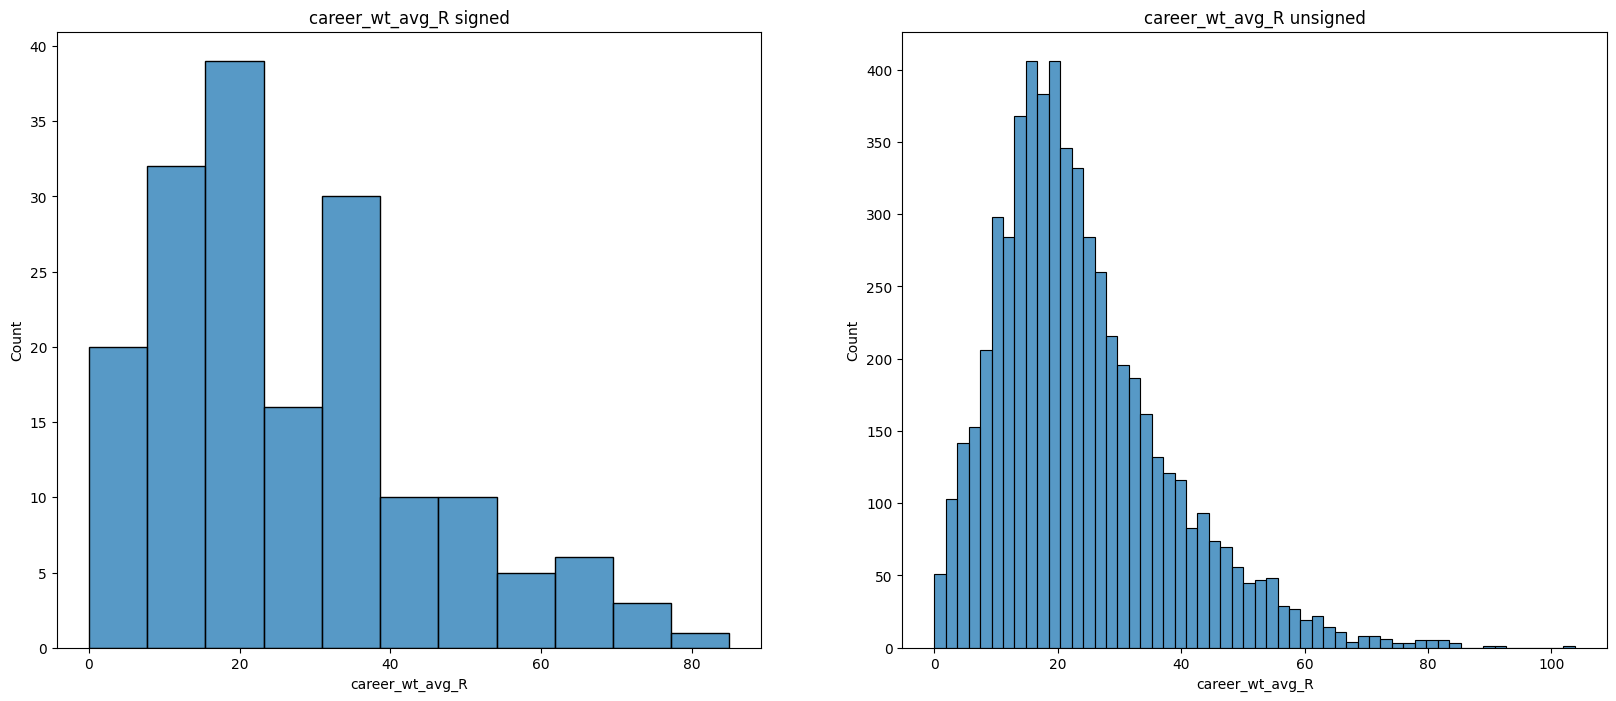

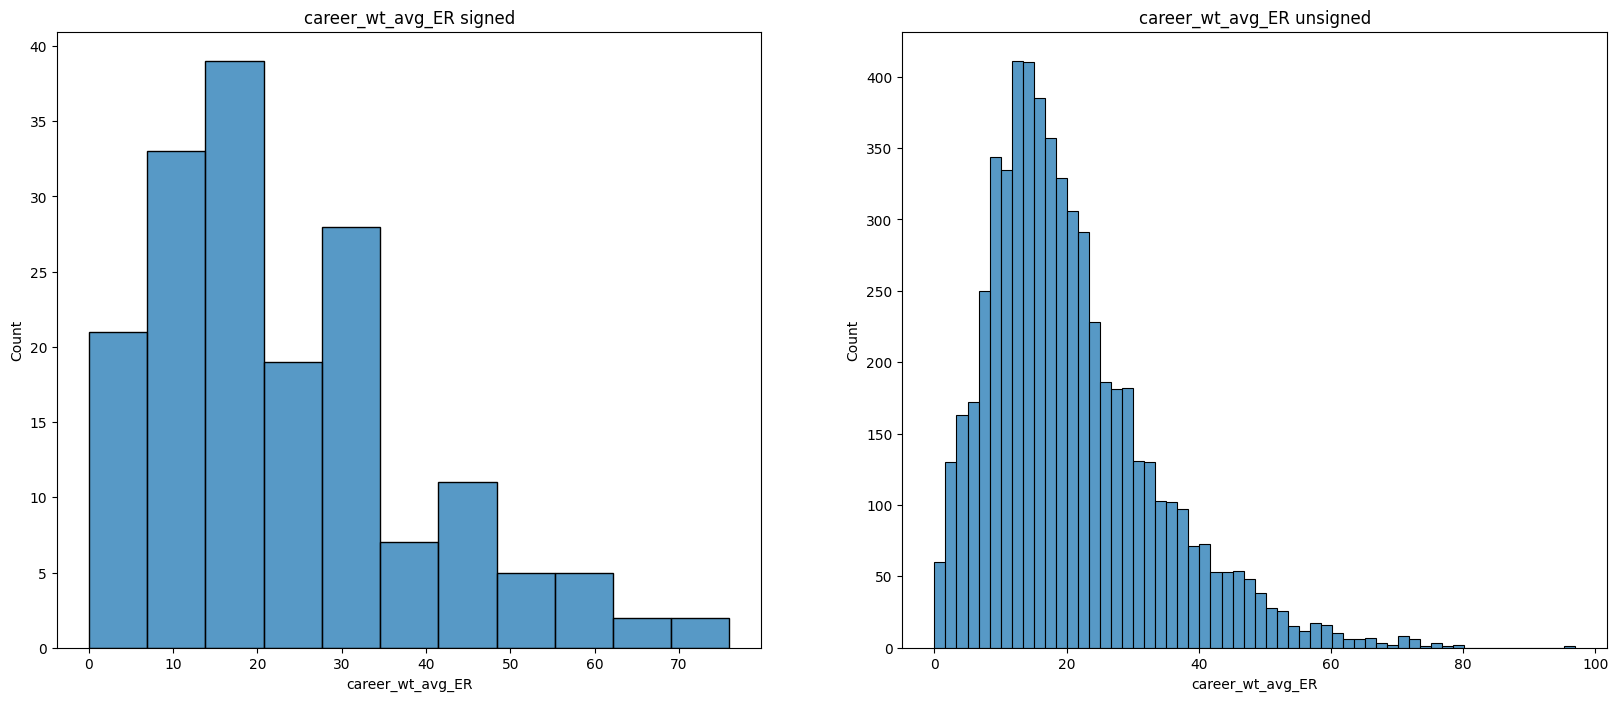

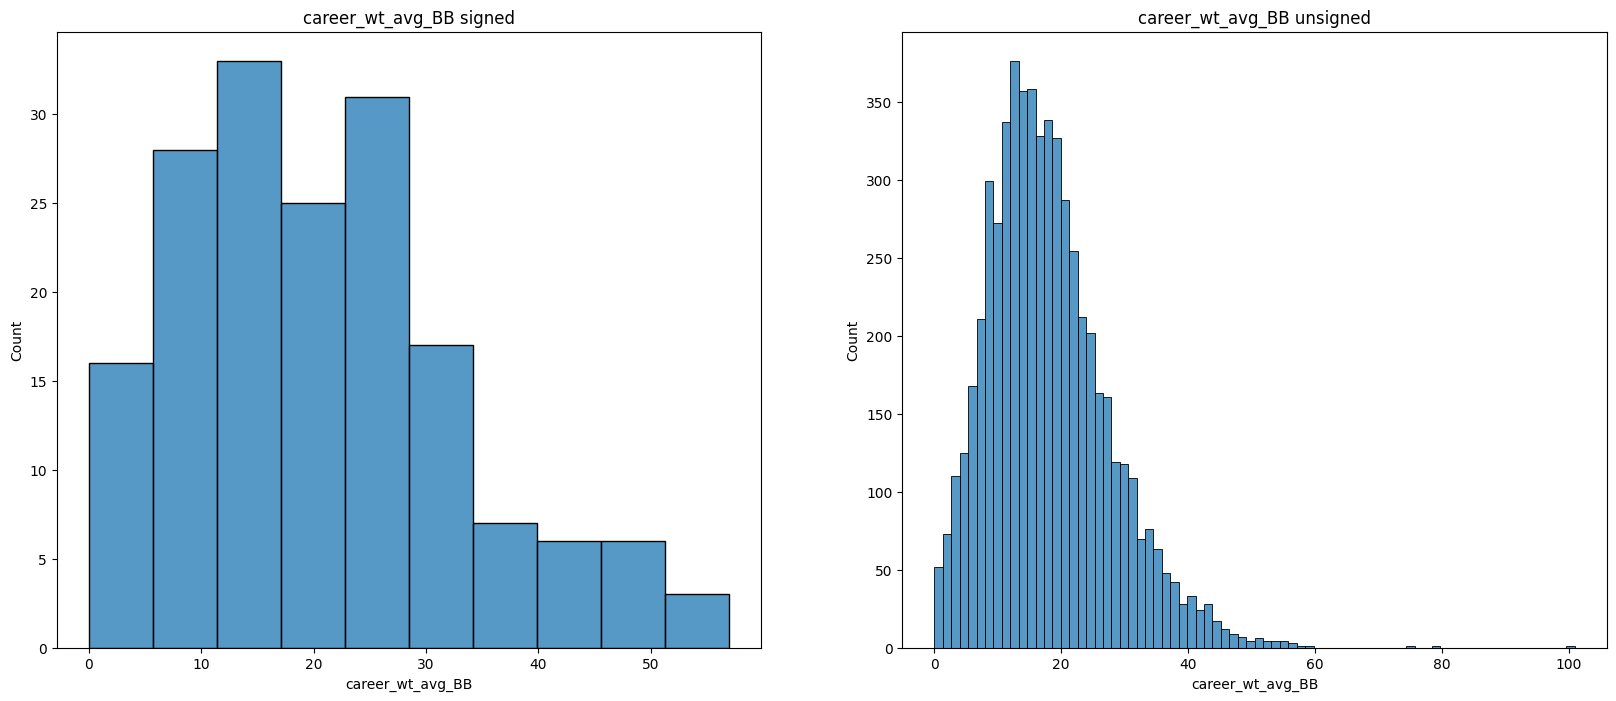

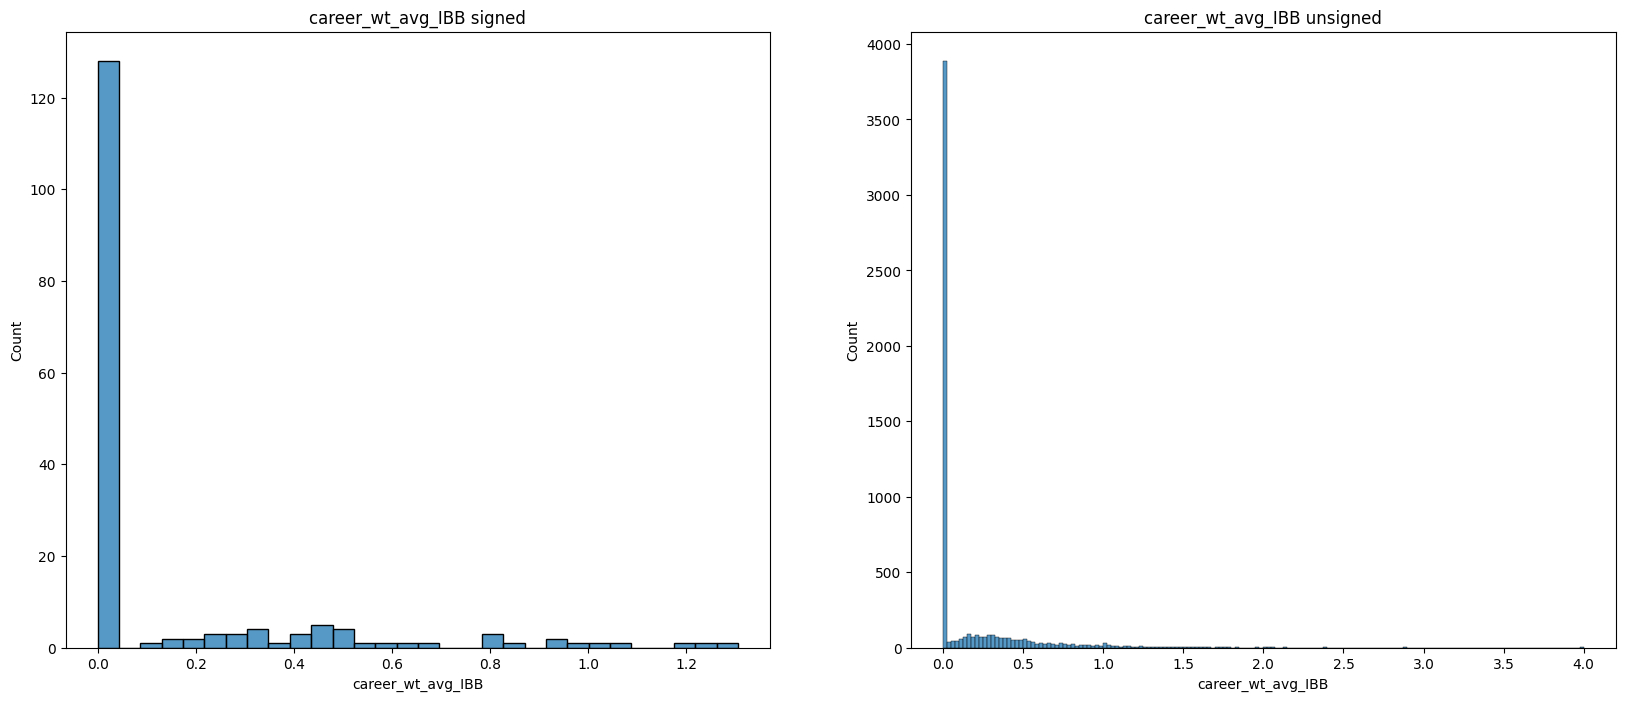

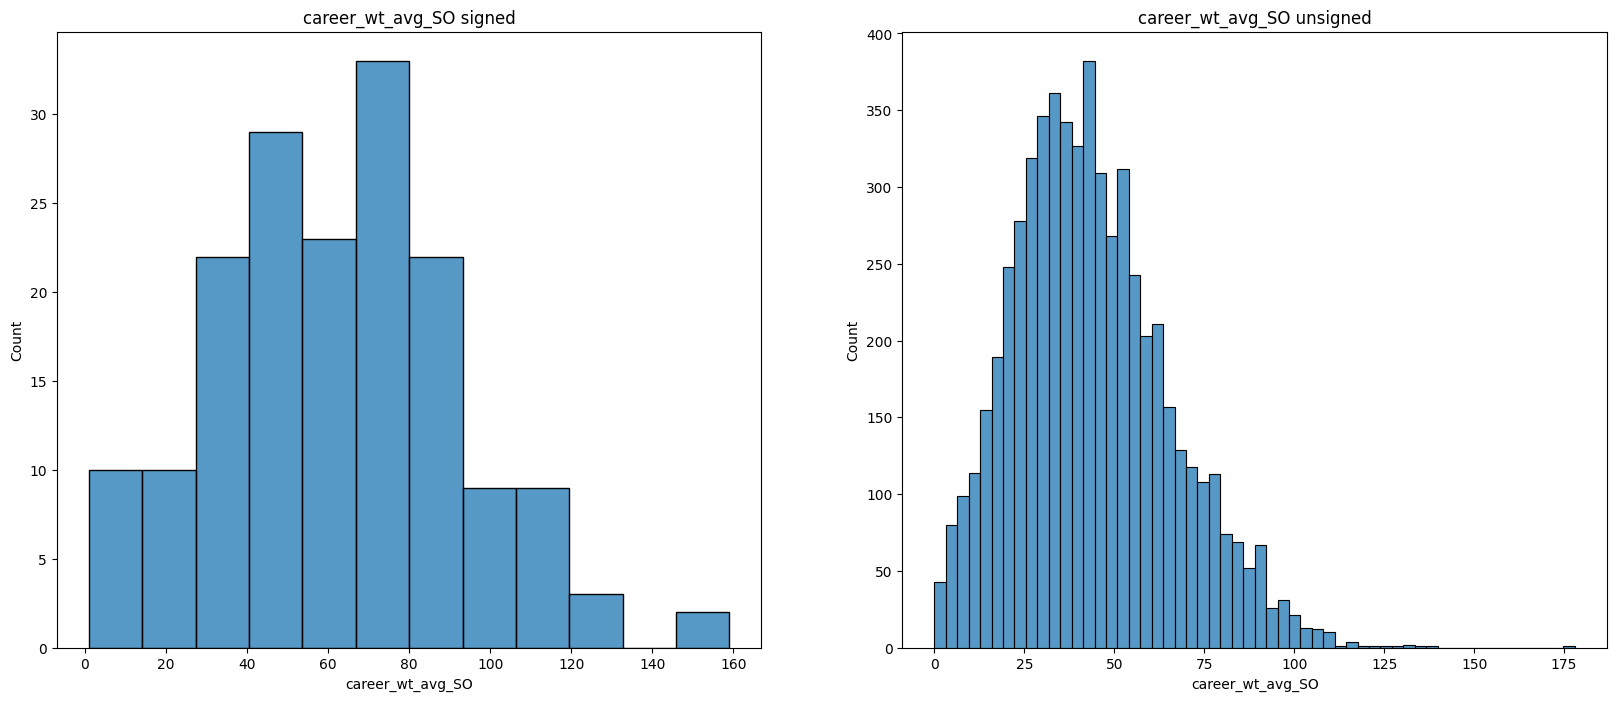

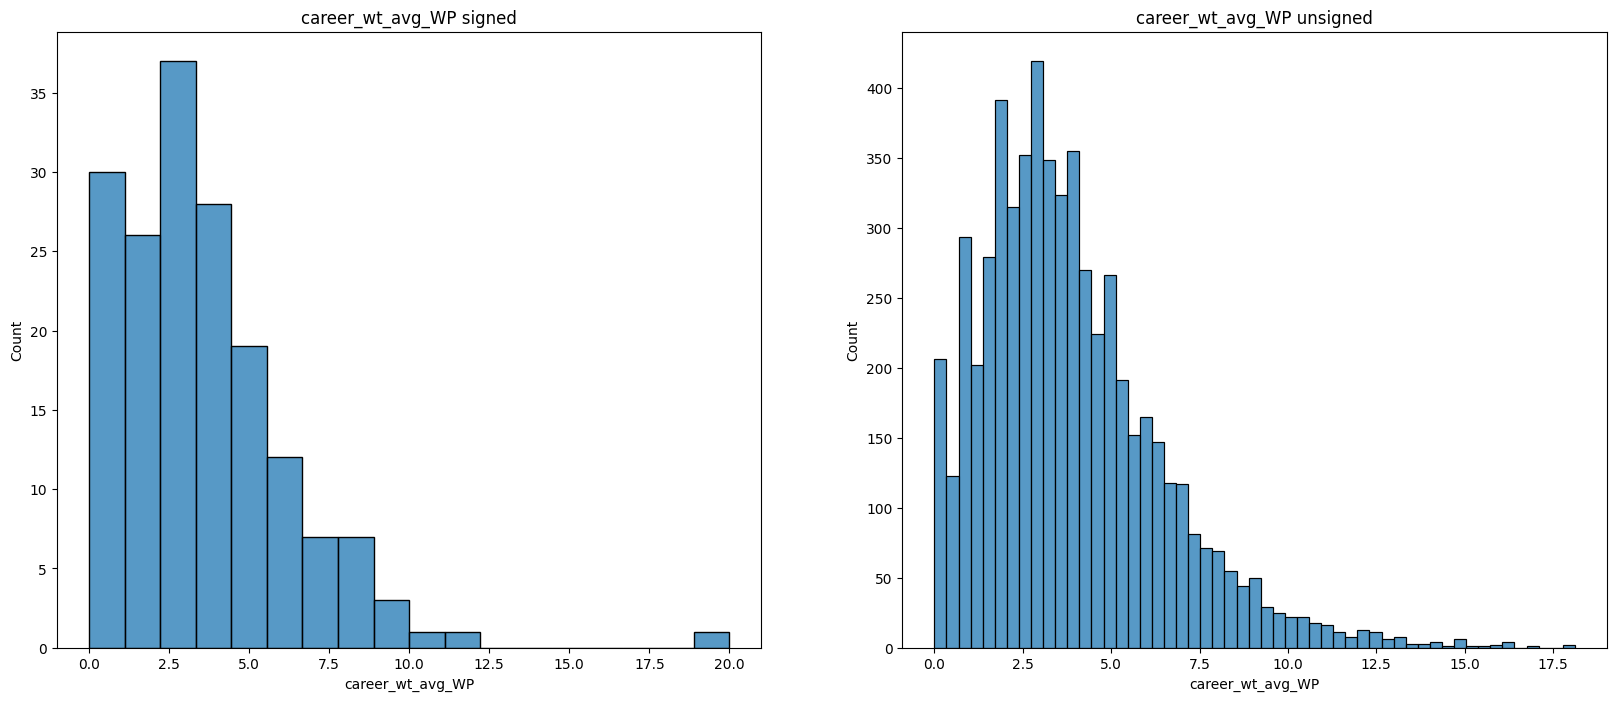

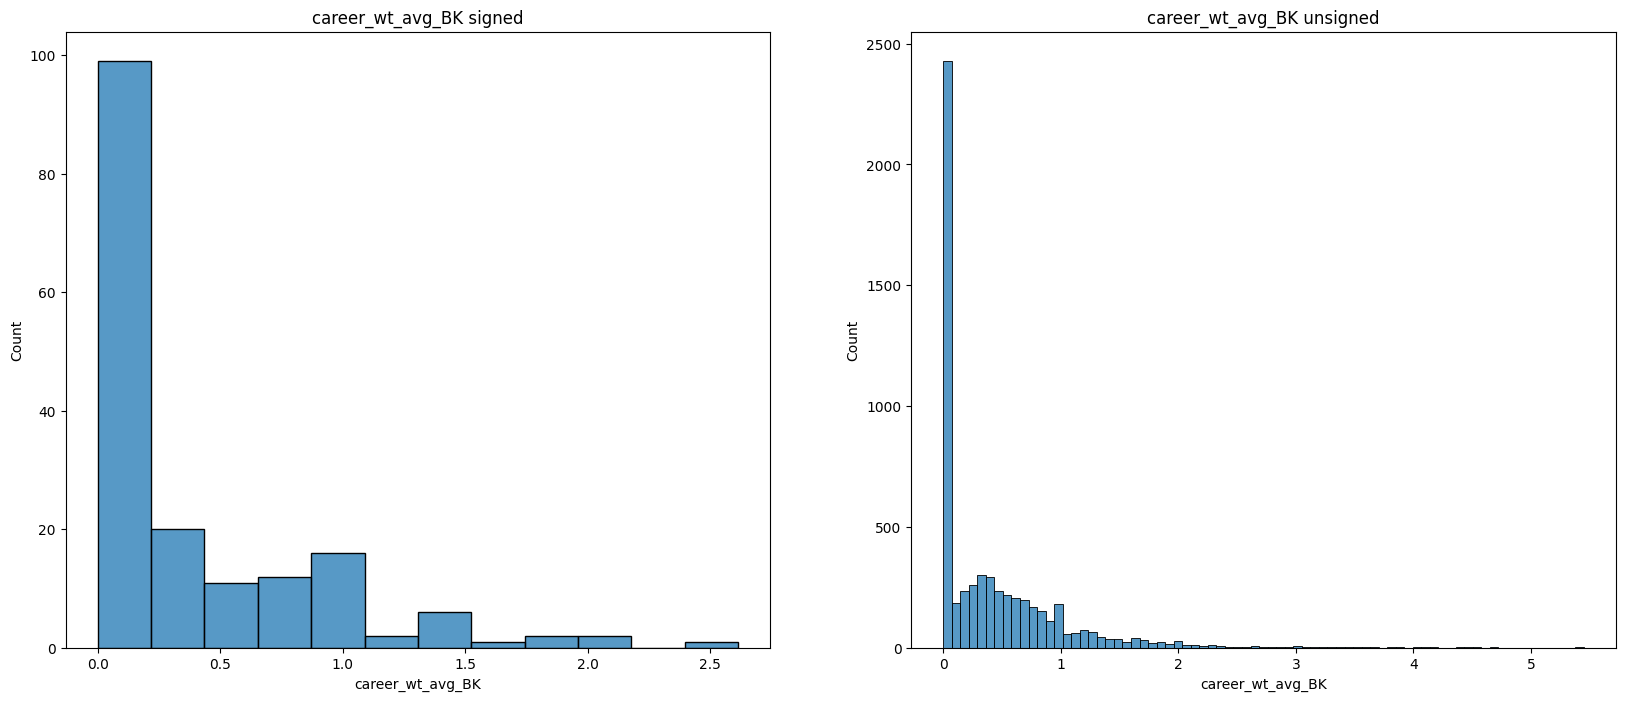

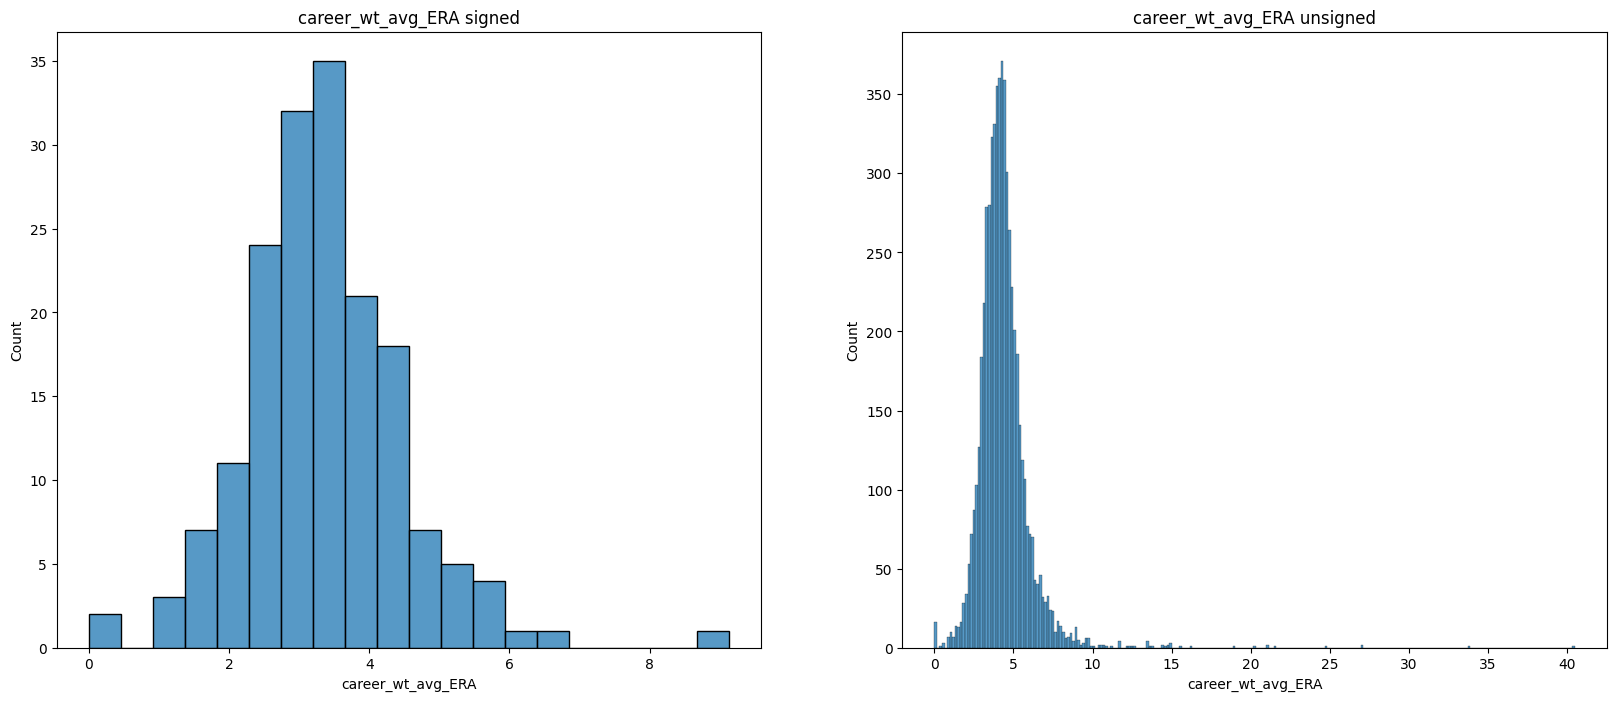

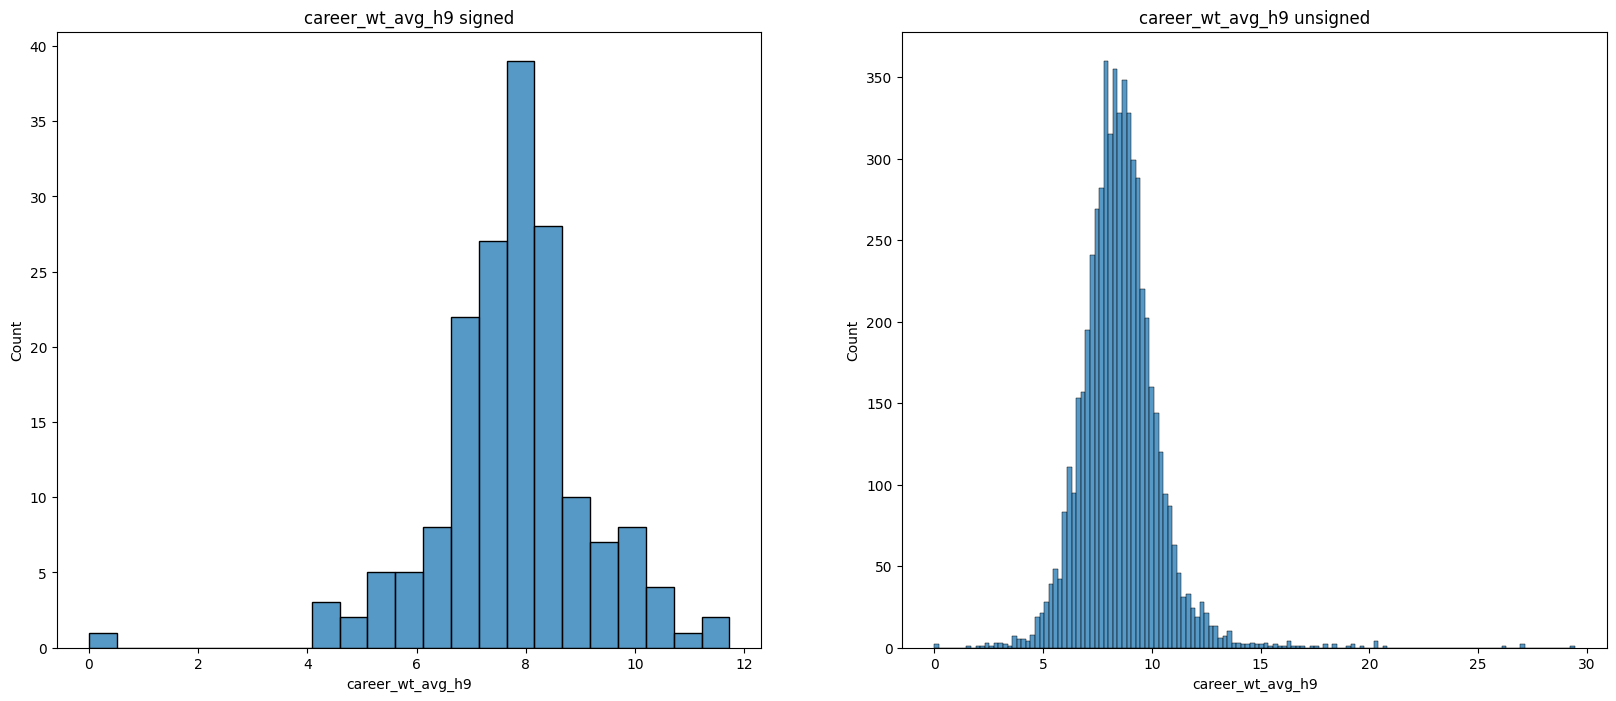

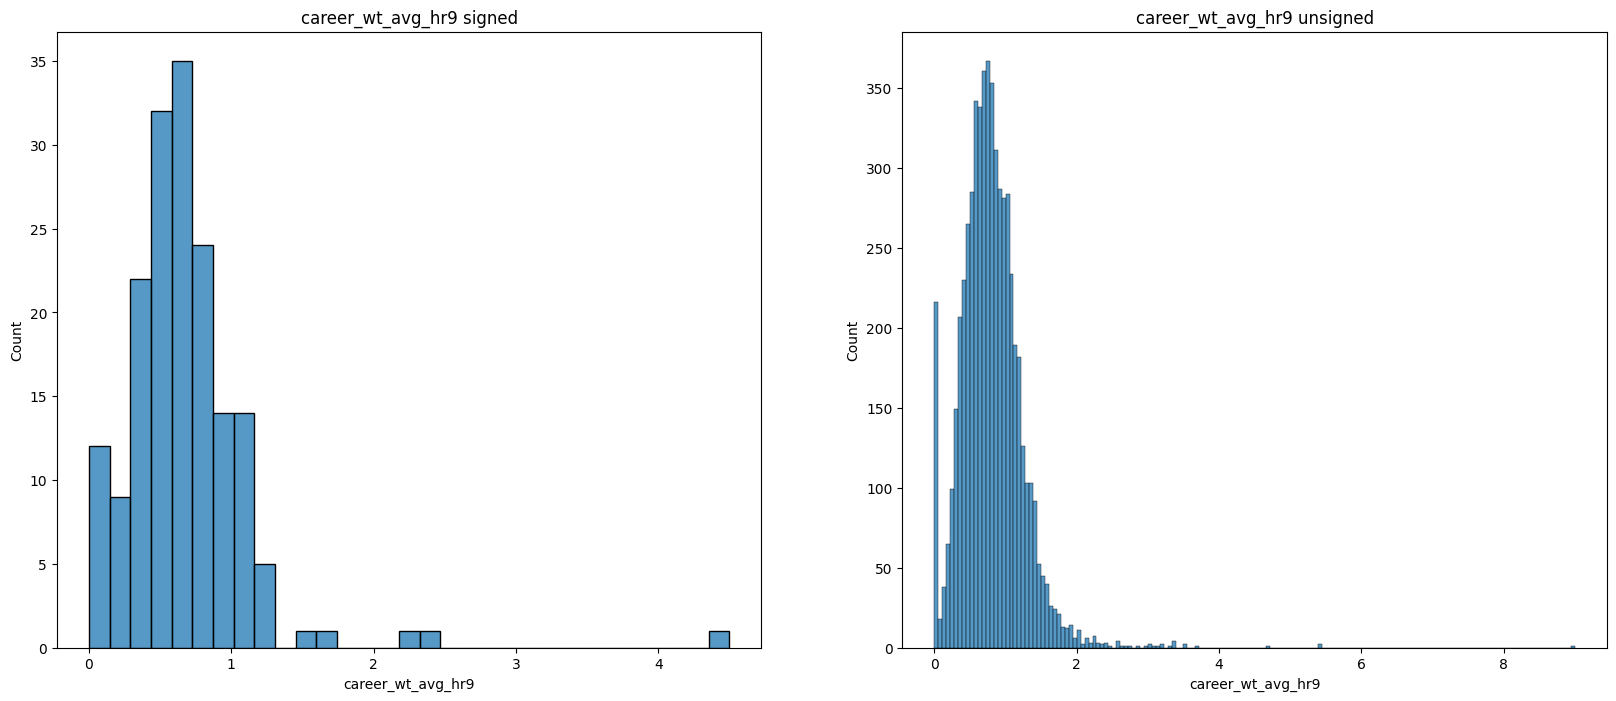

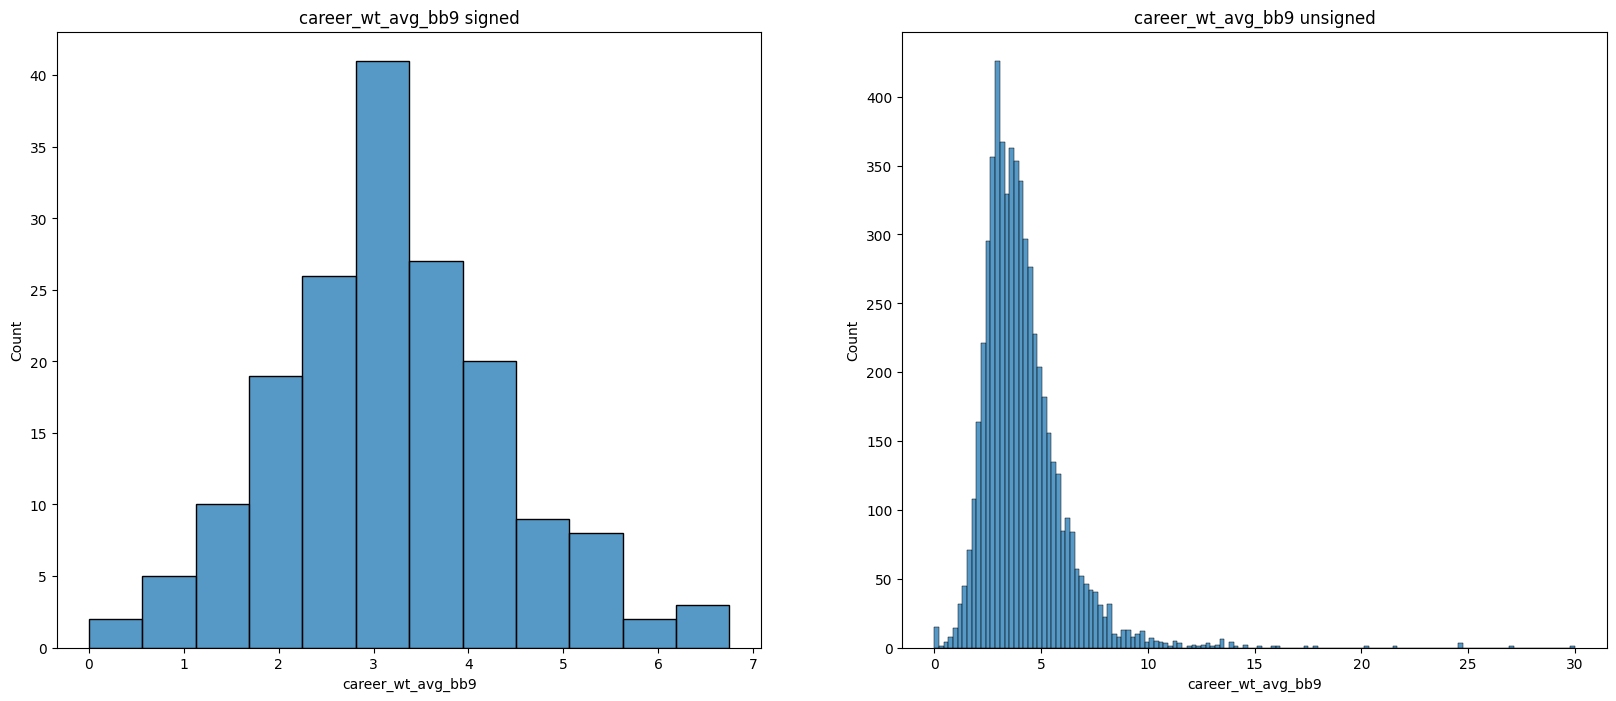

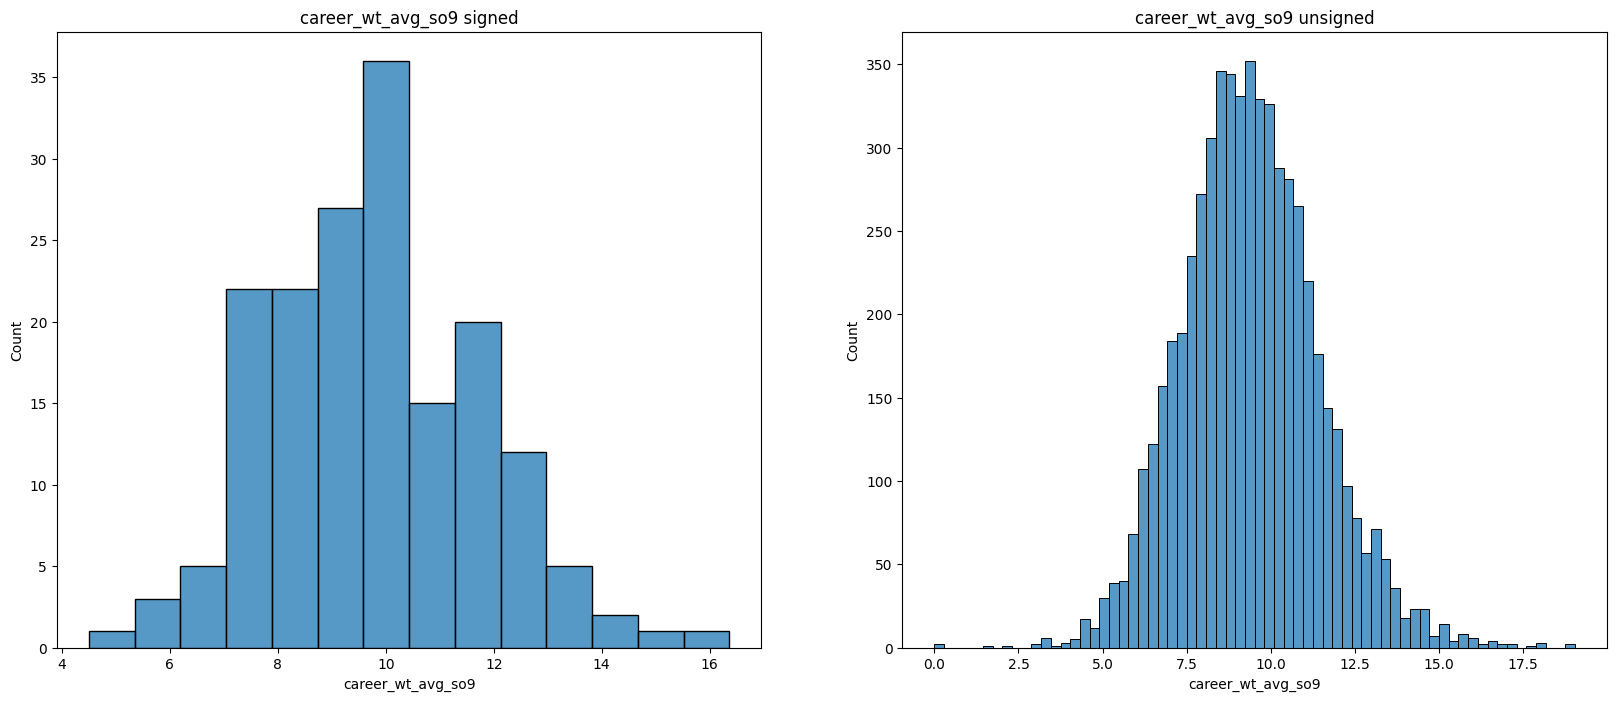

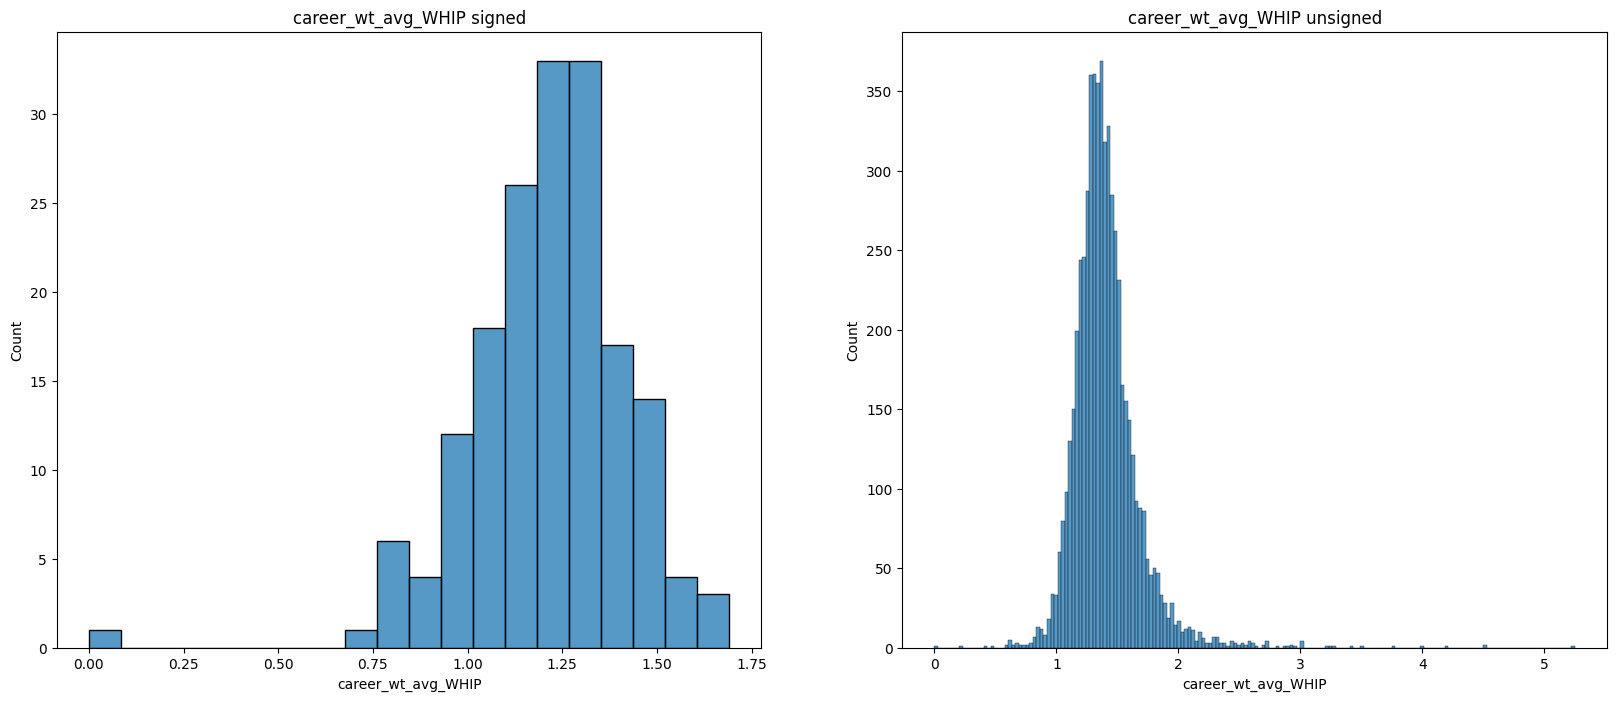

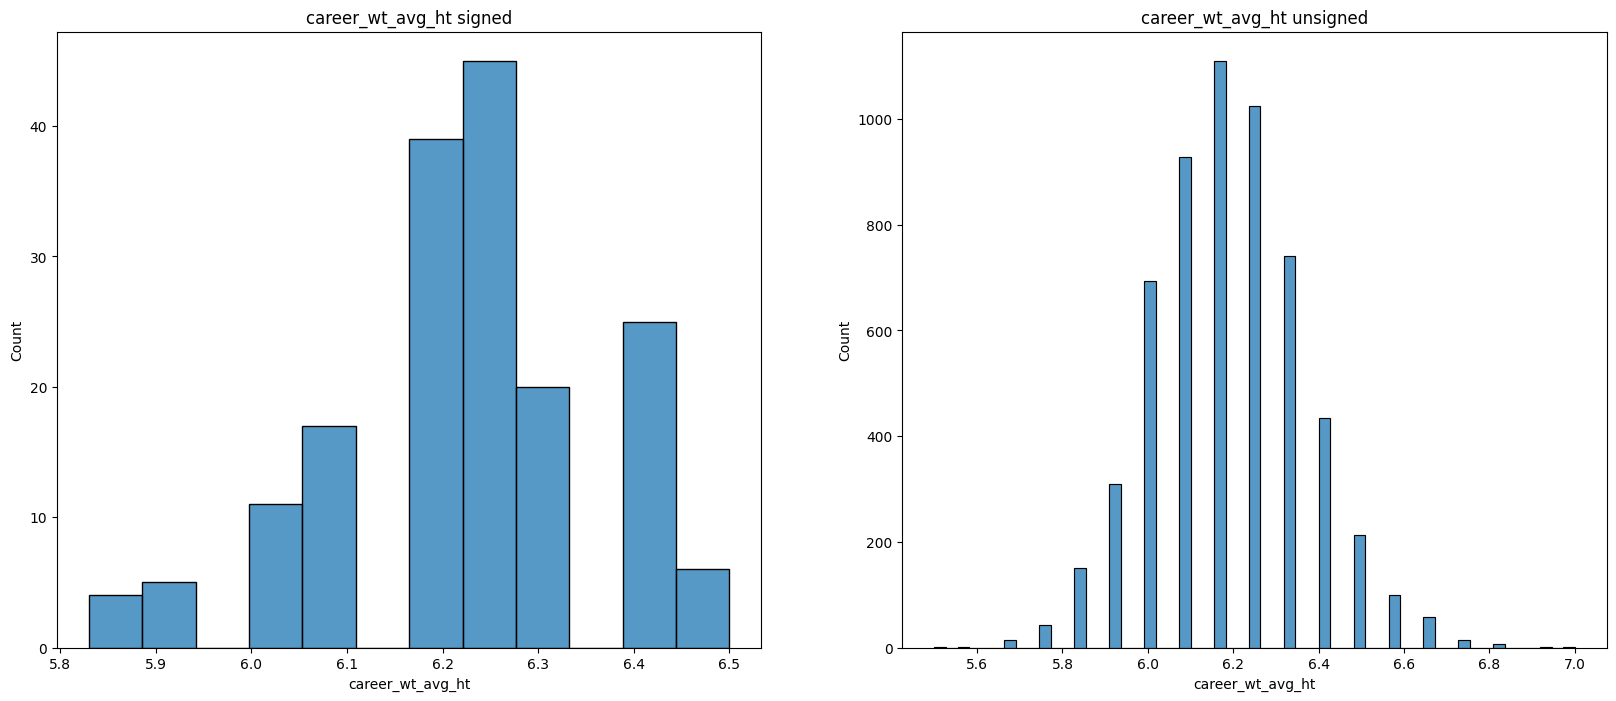

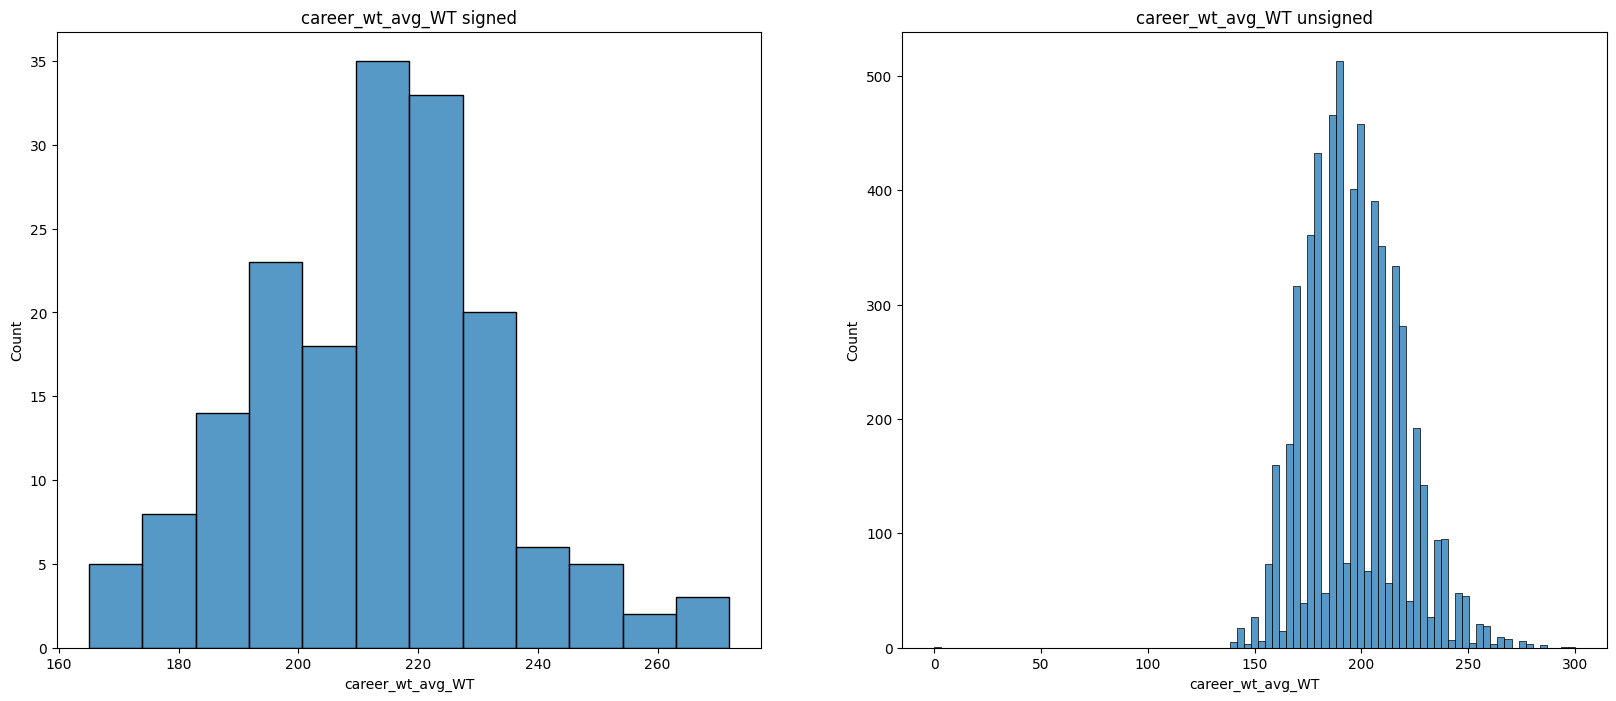

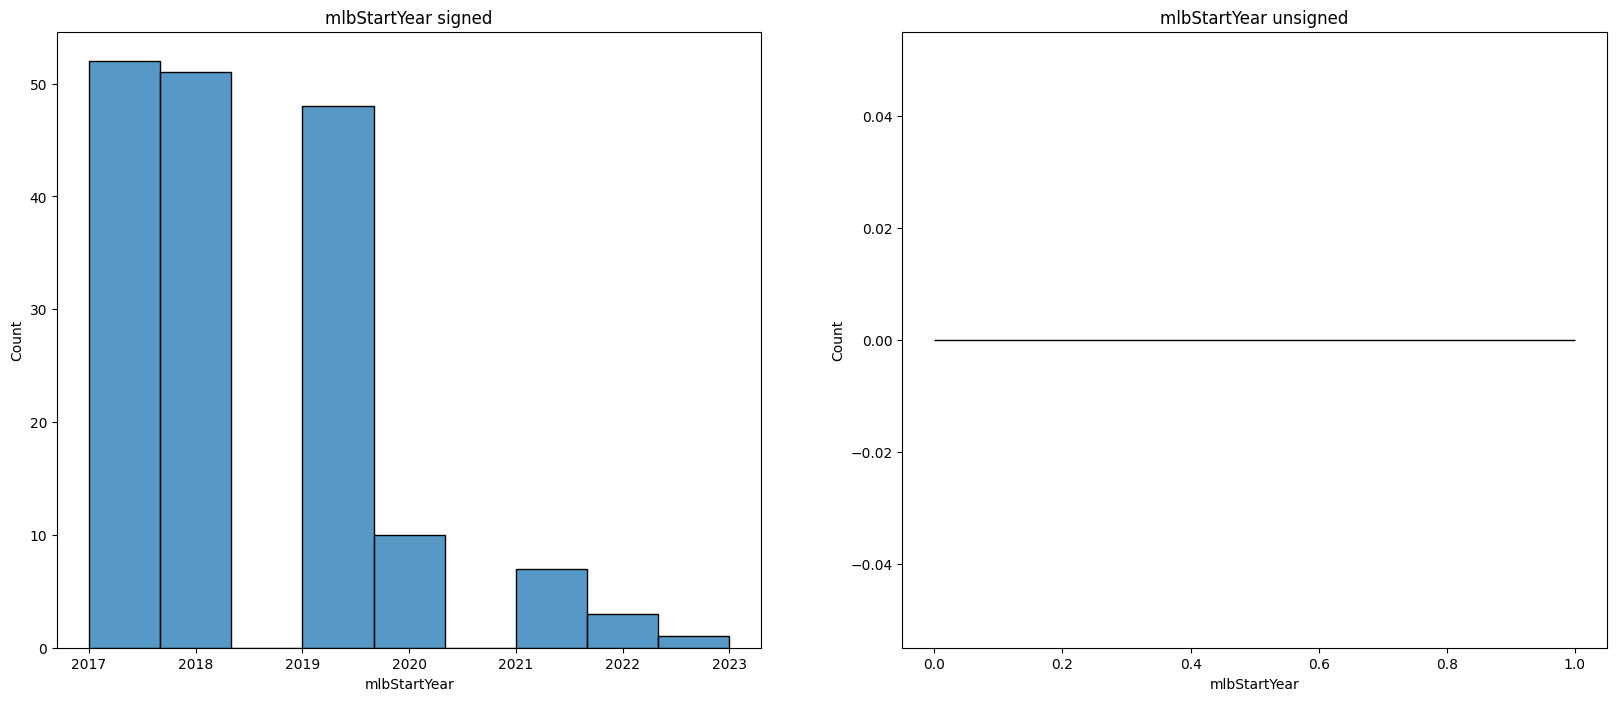

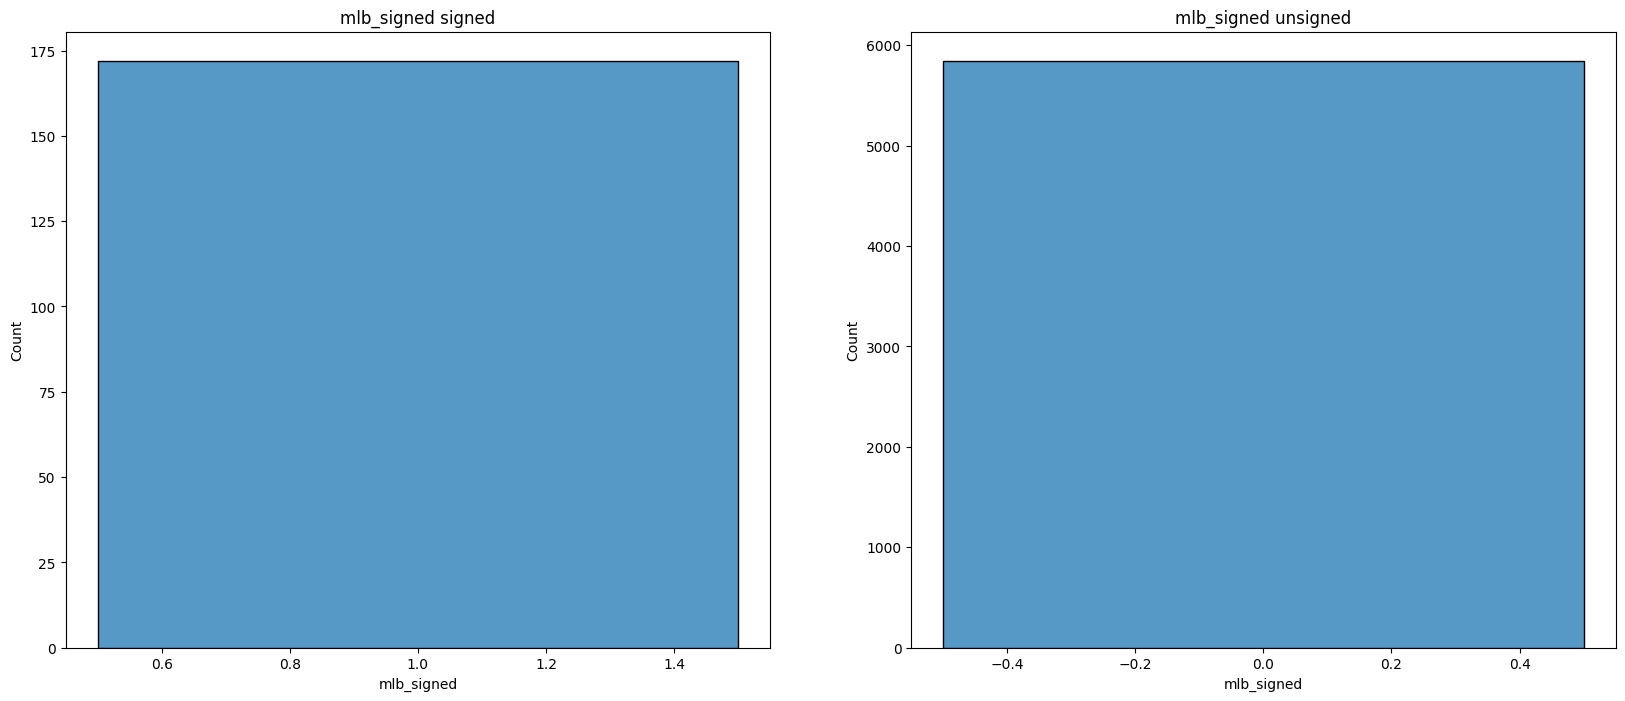

In [32]:
career_pitching_comb = weighted_pitch_car.merge(df_contracts_sub, left_on = "playerid", right_on = "playerid", how = "left")

career_pitching_comb["mlb_signed"] = np.where(career_pitching_comb["mlbStartYear"].notnull(), 1, 0)
import matplotlib.pyplot as plt
import seaborn as sns

signed_df = career_pitching_comb[career_pitching_comb["mlb_signed"] == 1]

unsigned_df = career_pitching_comb[career_pitching_comb["mlb_signed"] == 0]

for i in career_pitching_comb.columns.tolist():

    if i not in ("lastName", "firstName", "playerid", "year"):

        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
        sns.histplot(signed_df[i], ax=ax1).set_title(f"{i} signed")
        sns.histplot(unsigned_df[i],ax=ax2).set_title(f"{i} unsigned")
        plt.show()

playerid
career_wt_avg_W


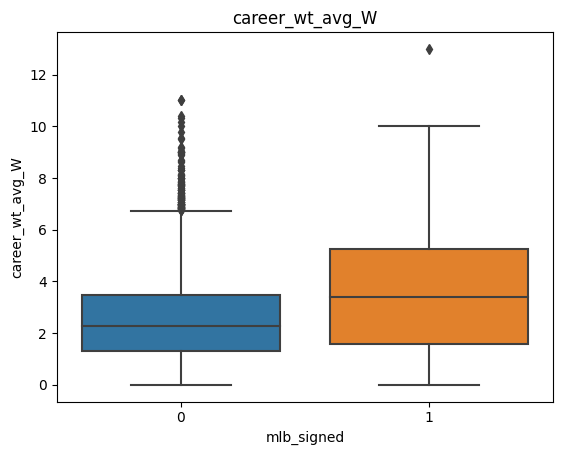

Signed and Unsigned players have a different distribution
career_wt_avg_L


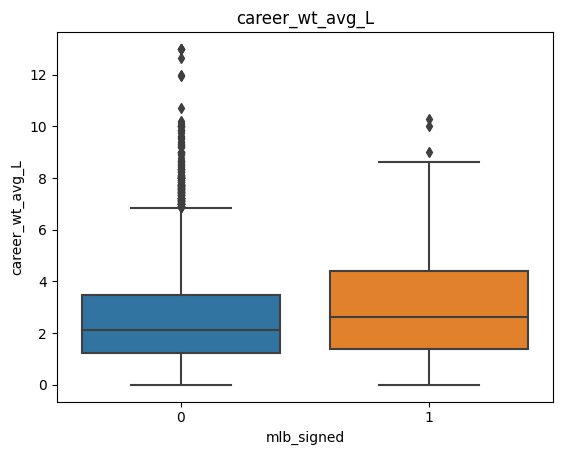

Signed and Unsigned players have a different distribution
career_wt_avg_G


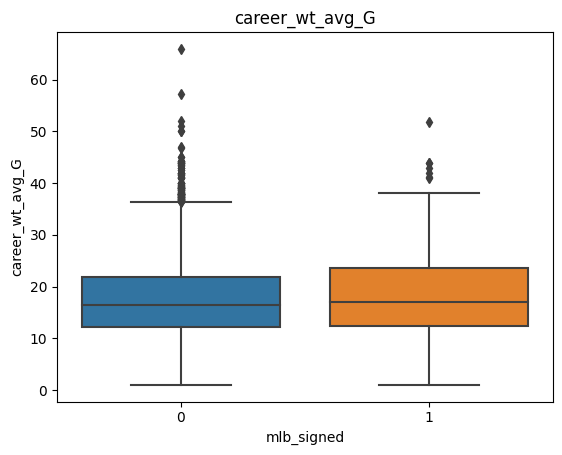

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_GS


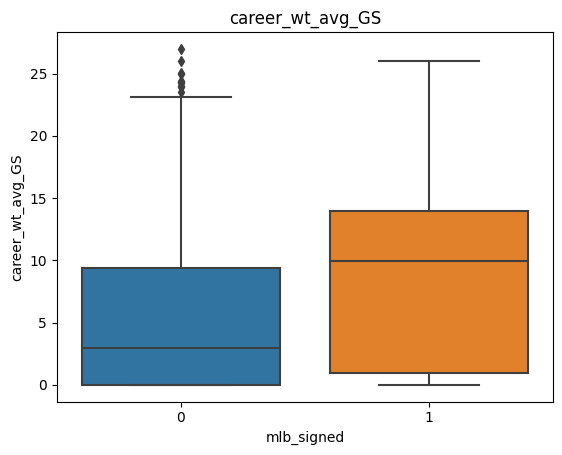

Signed and Unsigned players have a different distribution
career_wt_avg_CG


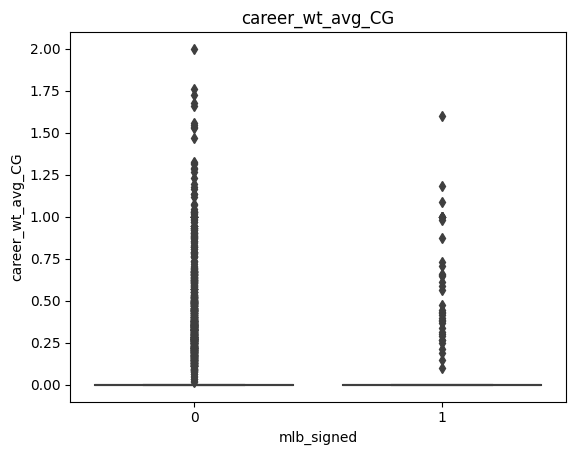

Signed and Unsigned players have a different distribution
career_wt_avg_SHO


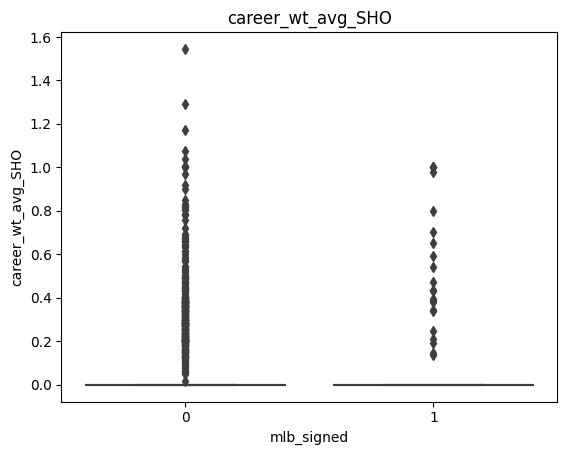

Signed and Unsigned players have a different distribution
career_wt_avg_GF


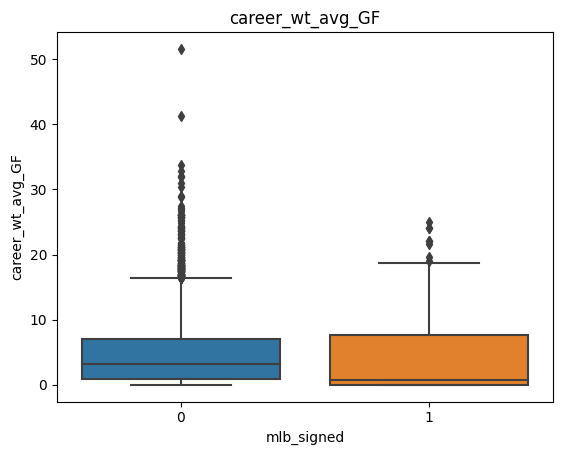

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_SV


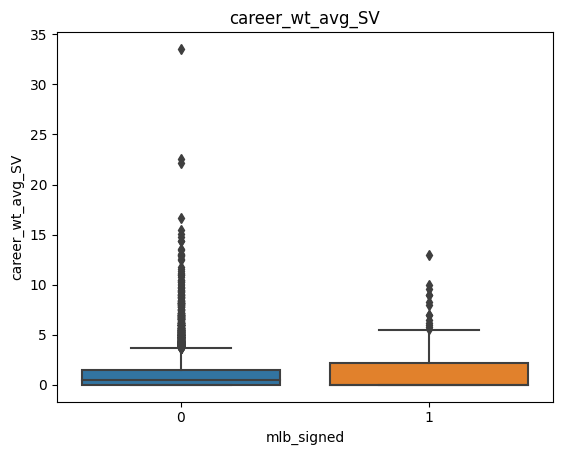

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_IP


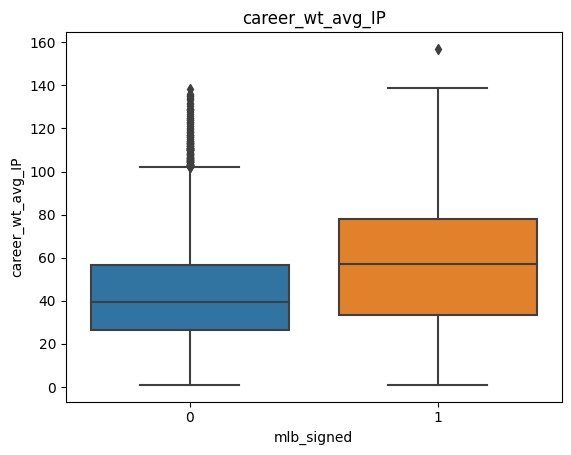

Signed and Unsigned players have a different distribution
career_wt_avg_H


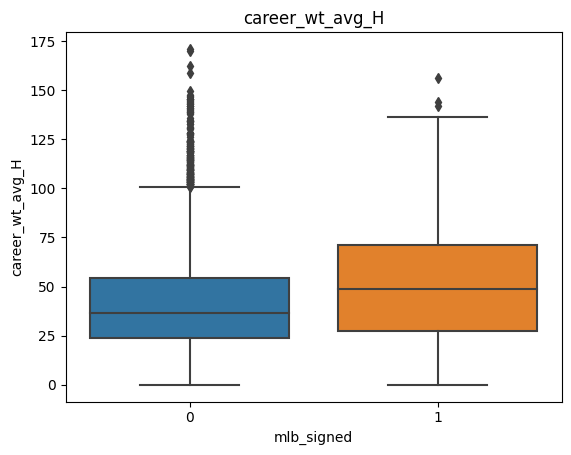

Signed and Unsigned players have a different distribution
career_wt_avg_HR


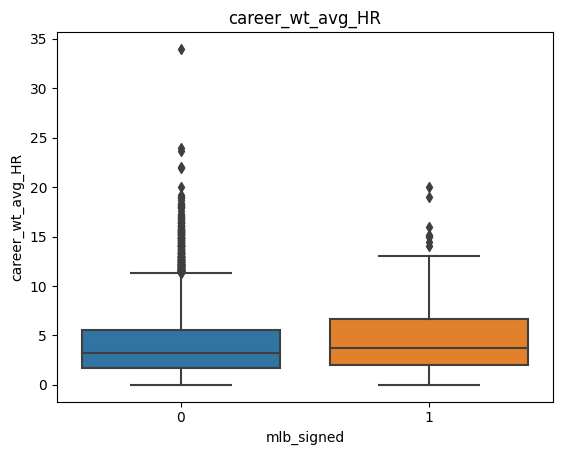

Signed and Unsigned players have a different distribution
career_wt_avg_R


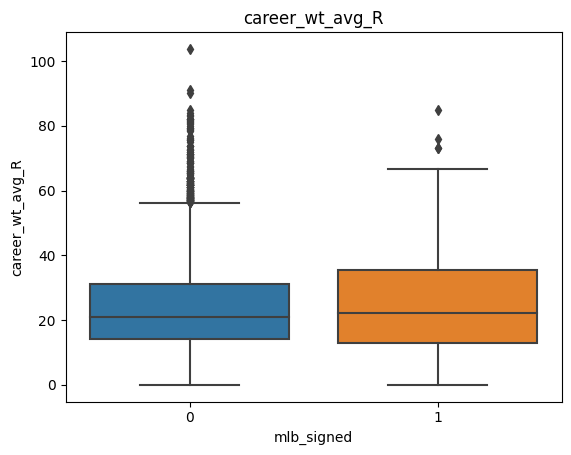

Signed and Unsigned players have a different distribution
career_wt_avg_ER


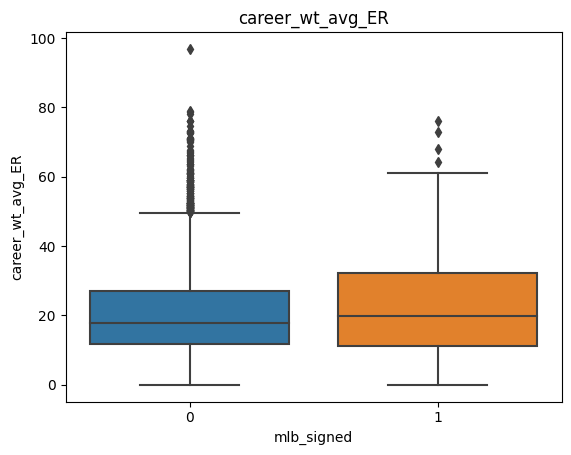

Signed and Unsigned players have a different distribution
career_wt_avg_BB


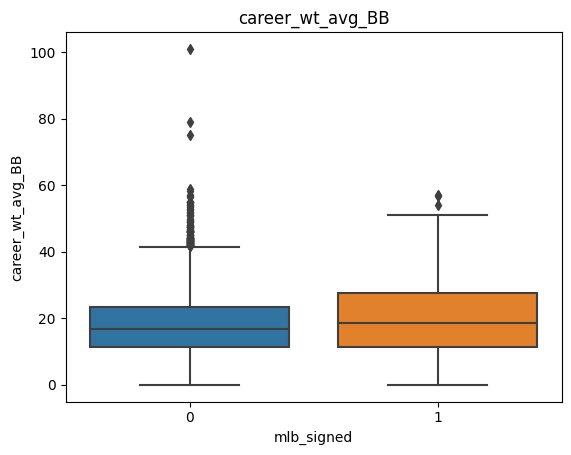

Signed and Unsigned players have a different distribution
career_wt_avg_IBB


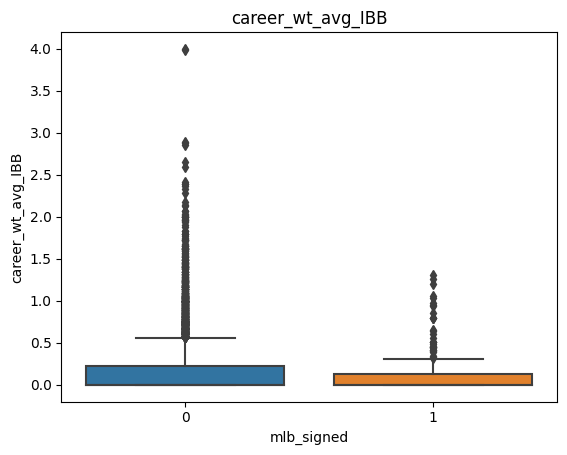

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_SO


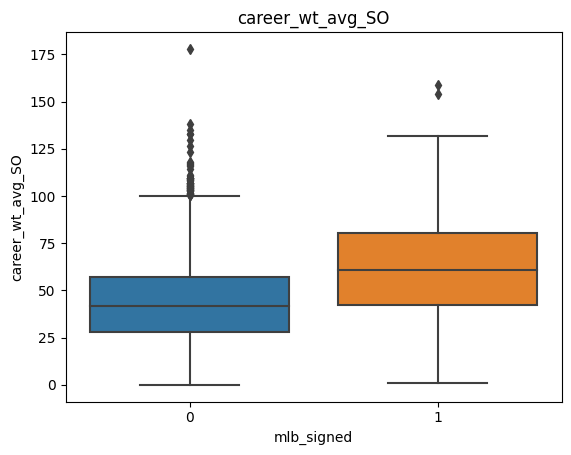

Signed and Unsigned players have a different distribution
career_wt_avg_WP


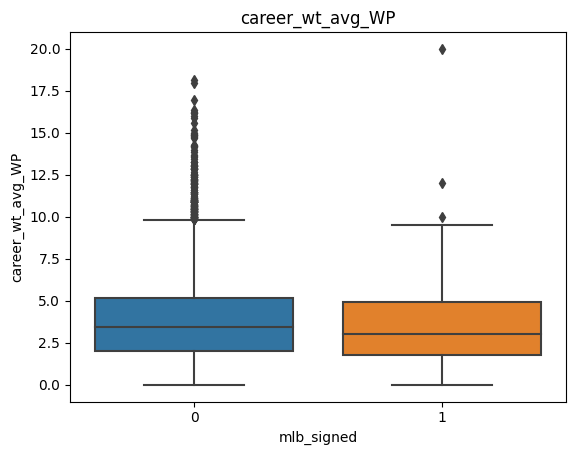

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_BK


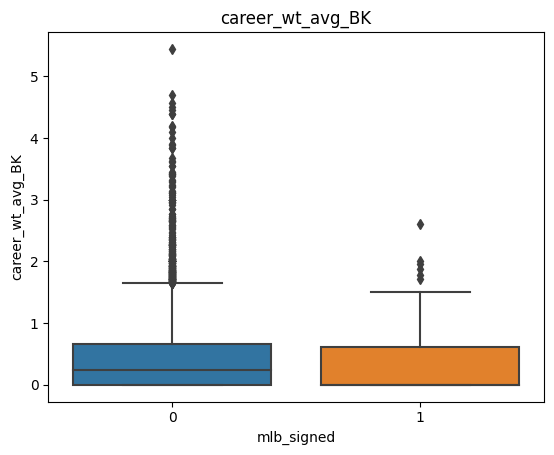

Null hypothesis (equal means) cannot be rejected.
career_wt_avg_ERA


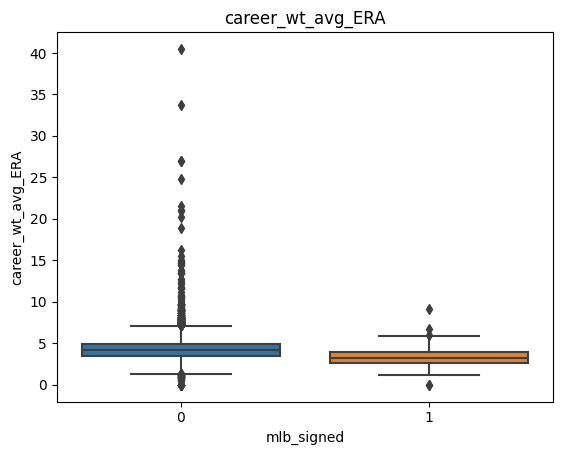

Signed and Unsigned players have a different distribution
career_wt_avg_h9


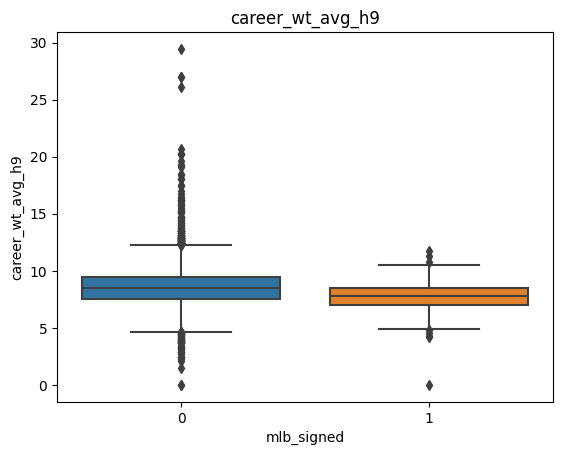

Signed and Unsigned players have a different distribution
career_wt_avg_hr9


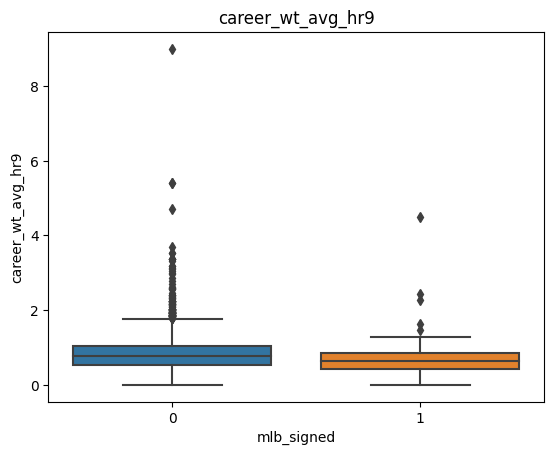

Signed and Unsigned players have a different distribution
career_wt_avg_bb9


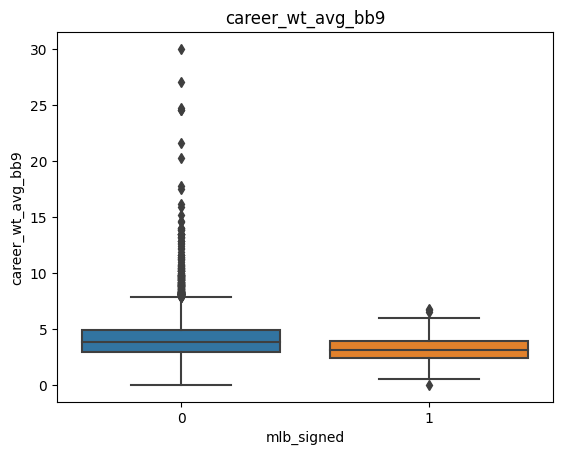

Signed and Unsigned players have a different distribution
career_wt_avg_so9


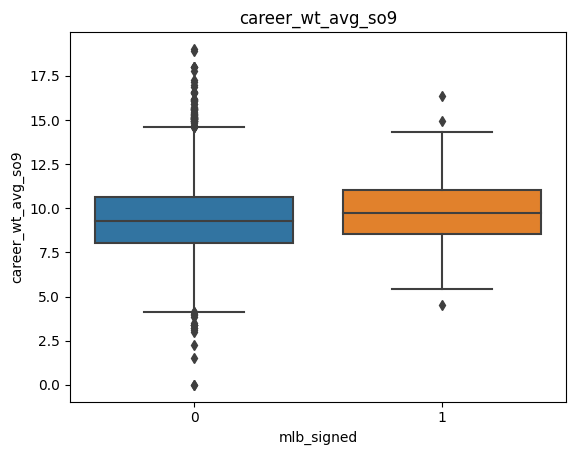

Signed and Unsigned players have a different distribution
career_wt_avg_WHIP


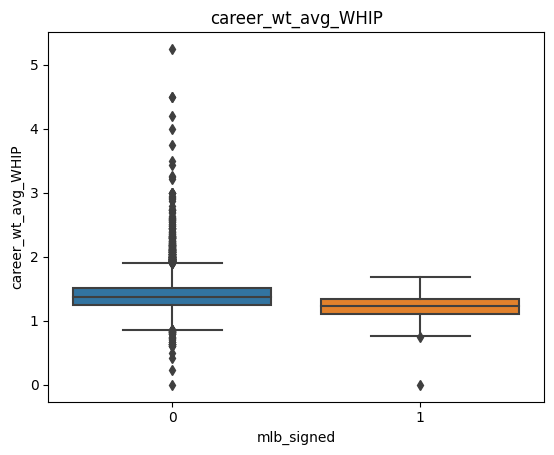

Signed and Unsigned players have a different distribution
career_wt_avg_ht


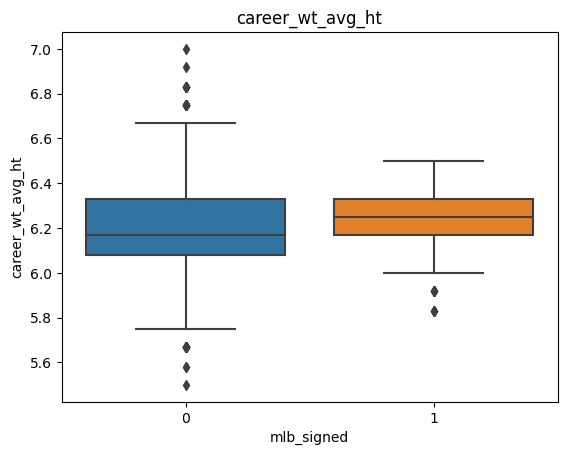

Signed and Unsigned players have a different distribution
career_wt_avg_WT


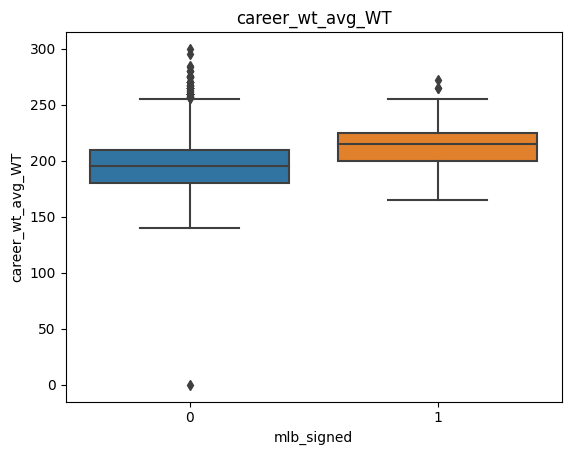

Signed and Unsigned players have a different distribution
mlbStartYear


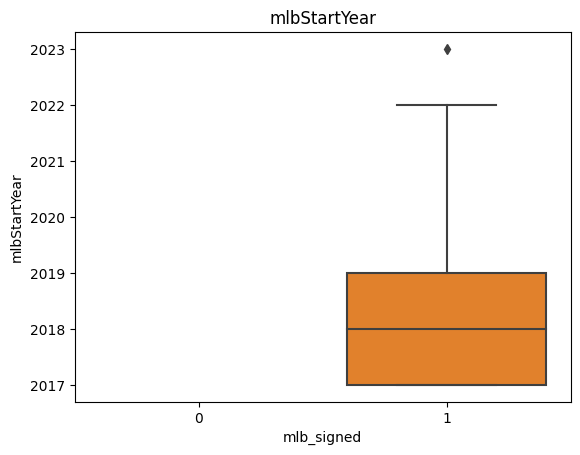

Null hypothesis (equal means) cannot be rejected.
mlb_signed


In [33]:
from scipy import stats

for i in career_pitching_comb.columns.tolist():
    print(i)

    if i not in ("lastName", "firstName", "playerid", "year", "mlb_signed"):

        t,p = stats.ttest_ind(career_pitching_comb[f"{i}"][career_pitching_comb.mlb_signed.eq(0)], career_pitching_comb[f"{i}"][career_pitching_comb.mlb_signed.eq(1)], 
                      equal_var=False, alternative='two-sided')

        sns.boxplot(x="mlb_signed", y=f"{i}", data = career_pitching_comb).set_title(f"{i}")
        plt.show()

        if p < 0.05:
            print('Signed and Unsigned players have a different distribution')
        else:
            print('Null hypothesis (equal means) cannot be rejected.')

In [34]:
col_list = ["career_wt_avg_W", "career_wt_avg_L", "career_wt_avg_G", 
            "career_wt_avg_GS", "career_wt_avg_CG", "career_wt_avg_SHO", 
            "career_wt_avg_GF", "career_wt_avg_SV", "career_wt_avg_IP", 
            "career_wt_avg_SO", "career_wt_avg_WP", "career_wt_avg_BK", 
            "career_wt_avg_ERA", "career_wt_avg_h9", "career_wt_avg_hr9", 
            "career_wt_avg_bb9", "career_wt_avg_so9", "career_wt_avg_WHIP",
            "career_wt_avg_ht", "career_wt_avg_WT"]

for col in col_list:
    # Calculate the 1st and 99th percentiles
    lower_threshold = career_pitching_comb[col].quantile(0.05)
    upper_threshold = career_pitching_comb[col].quantile(0.95)

    # Clip values outside the thresholds
    career_pitching_comb[col] = career_pitching_comb[col].clip(lower_threshold, upper_threshold)

<Axes: >

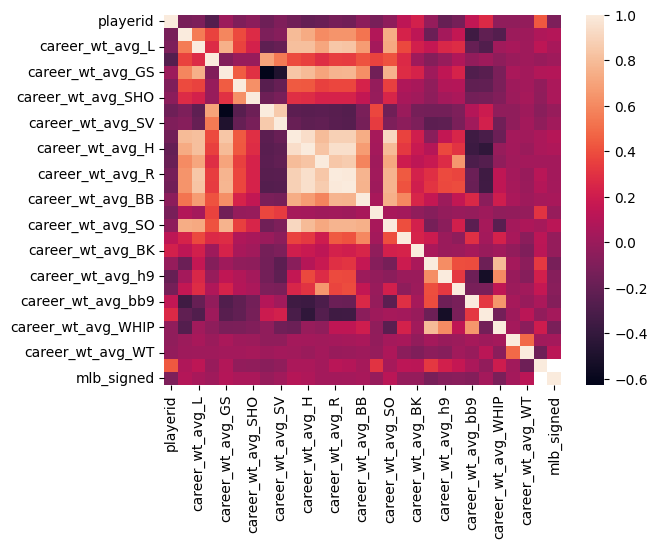

In [35]:
sns.heatmap(career_pitching_comb.corr())

In [36]:
career_pitching_comb.mlb_signed.value_counts()

0    5843
1     172
Name: mlb_signed, dtype: int64

The distinction for pitching metrics between signed and unsigned is less visually noticable than batting, but some are still indicated by the hypothesis tests. The aggregate metrics of hits per nine innings (H9), home runs per nine innings (HR9), ERA, and strike outs per nine innings (SO9), and WHIP all have a slightly better median  for players that go on to play in the MLB. Another interesting note is that it appears that pitchers that are signed to the MLB just pitch more during a given year. Innings pitched, hits, home runs, and earned runs all have a higher overall distribution for signed players than unsigned ones. A number of the metrics are right skewed and will likely need to be transformed prior to being used in the logistic regression model. 

Most importantly, however, like the batting data set is that the data set is very imbalanced. To better train the model the SMOTE, synthetic minority oversampling technique will also be used here to artificially increase the number of signed players in the training data set. 

To summarize the data transformations above, the following steps were taken:

1. All first year players were removed from the data sets
2. Pitchers were removed from the batting data set
3. Position players were removed from the pitching data set
4. The weighted averages for performance statistics was found from at bats and innings pitched for the batting and pitching data sets respectively. 
5. Outliers were clipped at 5% and 95% 
6. Data points for major league players that had left the minor league and returned were removed from the data set

Additionally, the following steps will be taken prior to training the machine learning models:

1. SMOTE will artifically increase the instances of signed major league players for both the pitching and batting data sets
2. The extremely skewed variables will be removed from the pitching data set
3. The data set will be scaled 
3. The data set will recieve a log transformation before being used to train the logistic regression models


### Model Training and Execution

Each model utilized hyperparameter tuning using a grid search. The best performing tuned model was evaluated on the test data set. 

Batting

In [37]:
results_columns = ["data", "model", "accuracy", "precision", "recall", "f1", "model"]

results_set = pd.DataFrame(columns = results_columns)

In [38]:

temp_result_list = []
temp_result_list.append("Batting")
temp_result_list.append("XGBoost")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


# Split the data into training and testing sets
X = career_batting_comb.drop(columns = ["playerid", "mlb_signed", "mlbStartYear"])
y = career_batting_comb["mlb_signed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Define the XGBoost model
xg_model = XGBClassifier(eval_metric='mlogloss', random_state = 42)

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8]
}

# Set up the grid search
grid_search = HalvingGridSearchCV(xg_model, param_grid, cv=5, scoring='f1', random_state = 42)

# Perform the grid search
grid_search.fit(X_res, y_res)

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest F1 found: ", grid_search.best_score_)

best_params = grid_search.best_params_

xg_model_bat = XGBClassifier(eval_metric='mlogloss', **best_params, random_state = 42)

# Train the model
xg_model_bat.fit(X_res, y_res)

# Make predictions on the test set
y_pred = xg_model_bat.predict(X_test_scaled)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(xg_model_bat)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters found:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 400}
Highest F1 found:  0.9847860722905907
Tuned Accuracy: 96.70%
Tuned Precision: 45.00%
Tuned Recall: 28.12%
Tuned F1: 34.62%
[[988  11]
 [ 23   9]]


In [39]:
from sklearn.ensemble import RandomForestClassifier


temp_result_list = []
temp_result_list.append("Batting")
temp_result_list.append("Random Forest")

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_clf = RandomForestClassifier()

# Set up the grid search
grid_search = HalvingGridSearchCV(rf_clf, rf_params, cv=5, scoring='f1', random_state = 42)

# Perform the grid search
grid_search.fit(X_res, y_res)

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest precision found: ", grid_search.best_score_)

best_params = grid_search.best_params_

rf_clf_bat = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_clf_bat.fit(X_res, y_res)

# Use the trained classifier to make predictions on the test data
y_pred = rf_clf_bat.predict(X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(rf_clf_bat)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Highest precision found:  0.9823604825860265
Tuned Accuracy: 96.90%
Tuned Precision: 0.00%
Tuned Recall: 0.00%
Tuned F1: 0.00%
[[999   0]
 [ 32   0]]


c:\Users\Haddon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Haddon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

temp_result_list = []
temp_result_list.append("Batting")
temp_result_list.append("Logistic Regression")

constant = 1e-10
X_train_log = np.log(X_train + constant)
X_test_log = np.log(X_test + constant)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)  # Scale the test data

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Define the hyperparameter configuration space
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize a Logistic Regression classifier
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search = HalvingGridSearchCV(estimator=lr, param_grid=lr_params, scoring = 'precision', cv=5, random_state = 42)

# Fit grid_search to the training data
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

lr_bat = LogisticRegression(**best_params, random_state = 42)
lr_bat.fit(X_res, y_res)

y_pred = lr_bat.predict(X_test_scaled)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(lr_bat)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters: {'C': 1000, 'penalty': 'l2'}
Best score: 0.8305608421050868
Tuned Accuracy: 83.71%
Tuned Precision: 14.21%
Tuned Recall: 84.38%
Tuned F1: 24.32%
[[836 163]
 [  5  27]]


Pitching Evaluation

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


# Split the data into training and testing sets
X = career_pitching_comb.drop(columns = ["playerid", "mlb_signed", "mlbStartYear", 
                                         "career_wt_avg_GS", "career_wt_avg_CG", "career_wt_avg_SHO", 
                                         "career_wt_avg_GF", "career_wt_avg_SV", "career_wt_avg_IBB", 
                                         "career_wt_avg_BK"]
                                         )
y = career_pitching_comb["mlb_signed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)


# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

temp_result_list = []
temp_result_list.append("Pitching")
temp_result_list.append("XGBoost")

xg_model = XGBClassifier(eval_metric='mlogloss', random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8]
}

# Set up the grid search
grid_search = HalvingGridSearchCV(xg_model, param_grid, cv=5, scoring='f1', random_state = 42)

# Perform the grid search
grid_search.fit(X_res, y_res)

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest F1 found: ", grid_search.best_score_)

best_params = grid_search.best_params_

xg_model_pitch = XGBClassifier(eval_metric='mlogloss', **best_params, random_state = 42)

# Train the model
xg_model_pitch.fit(X_res, y_res)

# Make predictions on the test set
y_pred = xg_model_pitch.predict(X_test_scaled)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(xg_model_pitch)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300}
Highest F1 found:  0.9864642287191646
Tuned Accuracy: 96.59%
Tuned Precision: 29.17%
Tuned Recall: 22.58%
Tuned F1: 25.45%
[[1155   17]
 [  24    7]]


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


temp_result_list = []
temp_result_list.append("Pitching")
temp_result_list.append("Random Forest")

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the grid search
grid_search = HalvingGridSearchCV(rf_clf, rf_params, cv=5, scoring='f1', random_state = 42)

# Perform the grid search
grid_search.fit(X_res, y_res)

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest precision found: ", grid_search.best_score_)

best_params = grid_search.best_params_

rf_clf_pitch = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_clf_pitch.fit(X_res, y_res)

# Use the trained classifier to make predictions on the test data
y_pred = rf_clf_pitch.predict(X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(rf_clf_pitch)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Highest precision found:  0.9807908017377794
Tuned Accuracy: 97.42%
Tuned Precision: 0.00%
Tuned Recall: 0.00%
Tuned F1: 0.00%
[[1172    0]
 [  31    0]]


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

temp_result_list = []
temp_result_list.append("Pitching")
temp_result_list.append("Logistic Regression")

constant = 1e-10
X_train_log = np.log(X_train + constant)
X_test_log = np.log(X_test + constant)


# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)  # Scale the test data

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Define the hyperparameter configuration space
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize a Logistic Regression classifier
lr = LogisticRegression(random_state = 42)

# Initialize GridSearchCV
grid_search = HalvingGridSearchCV(estimator=lr, param_grid=lr_params, cv=5, scoring = 'precision', random_state = 42)

# Fit grid_search to the training data
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

lr_pitch = LogisticRegression(**best_params, random_state = 42)
lr_pitch.fit(X_res, y_res)

y_pred = lr_pitch.predict(X_test_scaled)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy: %.2f%%" % (accuracy * 100.0))
print("Tuned Precision: %.2f%%" % (precision * 100.0))
print("Tuned Recall: %.2f%%" % (recall * 100.0))
print("Tuned F1: %.2f%%" % (f1 * 100.0))

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

temp_result_list.append(accuracy)
temp_result_list.append(precision)
temp_result_list.append(recall)
temp_result_list.append(f1)
temp_result_list.append(lr_pitch)

temp_result_set = pd.DataFrame([temp_result_list], columns = results_columns)

results_set = pd.concat([results_set, temp_result_set], ignore_index=True)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.7547137702461877
Tuned Accuracy: 74.81%
Tuned Precision: 7.76%
Tuned Recall: 80.65%
Tuned F1: 14.16%
[[875 297]
 [  6  25]]


### Results 

In [44]:
results_set

data                model  accuracy  precision    recall        f1  \
0   Batting              XGBoost  0.967022   0.450000  0.281250  0.346154   
1   Batting        Random Forest  0.968962   0.000000  0.000000  0.000000   
2   Batting  Logistic Regression  0.837051   0.142105  0.843750  0.243243   
3  Pitching              XGBoost  0.965919   0.291667  0.225806  0.254545   
4  Pitching        Random Forest  0.974231   0.000000  0.000000  0.000000   
5  Pitching  Logistic Regression  0.748130   0.077640  0.806452  0.141643   

                                               model  
0  XGBClassifier(base_score=None, booster=None, c...  
1  (DecisionTreeClassifier(max_depth=30, max_feat...  
2        LogisticRegression(C=1000, random_state=42)  
3  XGBClassifier(base_score=None, booster=None, c...  
4  (DecisionTreeClassifier(max_depth=30, max_feat...  
5           LogisticRegression(C=1, random_state=42)

Model performance always depends on the context. Given the imbalance of the data set, accuracy is a very misleading metric as the model could label every player as not signed to the MLB and still hold a very high accuracy, for example the random forest model for the batting data set labeled every player as not signed and had a 96.8% accuracy. For the problem of identifying a potential MLB player the focus should instead should be on the F1 score and then precision. One could argue that in the context of identifying players likely to sign with the MLB, for example like the BLA business model, that precision would be significantly more important than recall as it could lead to a higher confidence in the investment. 

The XGBoost model for both the pitching and batting data set has the highest F1 score and precision. While in many applications a precision of 45% or 29% would often be considered low, but considering the baseline of only 10% of all minor league players make it to the MLB, then the models are a marked improvement. Also to use BLA as an industry benchmark, the CEO claimed “We're probably going to lose money on about 60%, 70%, maybe 80% of the players we invest in" (Smith). Which if this statement is interpreted as the precision of thier selection process is between 20 to 40% then the XGBoost model on the batting data also out performed BLA's selection process precision, and the XGBoost model on the pitching data was in line with the BLA selection process precision. However, an important note is that BLA has never publicly disclosed it's selection process so the comparison is an interpretation of statements made by the CEO of BLA. 

<Axes: title={'center': 'Pitching Features'}, ylabel='features'>

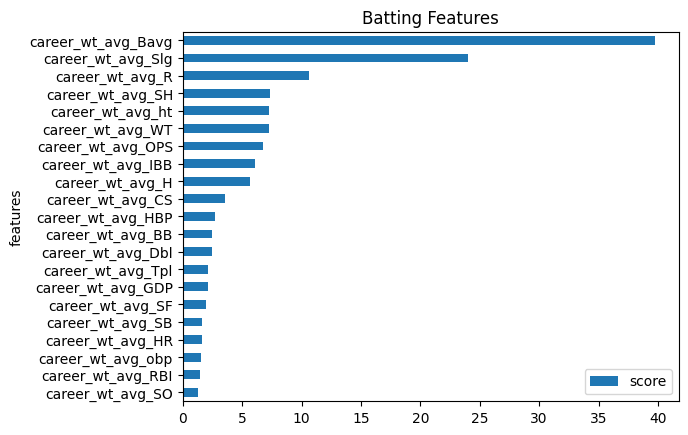

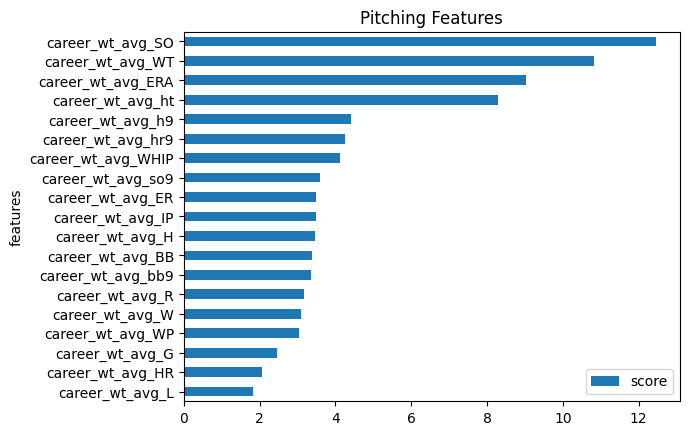

In [73]:
import xgboost as xgb

X = career_batting_comb.drop(columns = ["playerid", "mlb_signed", "mlbStartYear"])

# Plot feature importances
batting_model = results_set.at[0, "model"].values[1]
feature_important = batting_model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

true_key_list = []
for key in keys:
    val = int(key.replace("f",""))
    new_key = X.columns.tolist()[val]
    true_key_list.append(new_key)

data = pd.DataFrame(data=values, index=true_key_list, columns=["score"]).sort_values(by = "score", ascending=True)
data.reset_index(inplace = True)
data.rename(columns = {"index": "features"}, inplace = True)

data.plot(kind='barh',y= "score",x= "features", title = 'Batting Features')

X = career_pitching_comb.drop(columns = ["playerid", "mlb_signed", "mlbStartYear", 
                                         "career_wt_avg_GS", "career_wt_avg_CG", "career_wt_avg_SHO", 
                                         "career_wt_avg_GF", "career_wt_avg_SV", "career_wt_avg_IBB", 
                                         "career_wt_avg_BK"]
                                         )

# # Plot feature importances
pitching_model = results_set.at[3, "model"].values[1]
feature_important = pitching_model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

true_key_list = []
for key in keys:
    val = int(key.replace("f",""))
    new_key = X.columns.tolist()[val]
    true_key_list.append(new_key)

data = pd.DataFrame(data=values, index=true_key_list, columns=["score"]).sort_values(by = "score", ascending=True)
data.reset_index(inplace = True)
data.rename(columns = {"index": "features"}, inplace = True)


data.plot(kind='barh',y= "score",x= "features", title = 'Pitching Features')


Feature importance demonstrates how influential each variable was in the model's selection process. In this case the feature importance was determined with the gain metric, which implies the relative impact of the variable on the output based upon the contribution the variable has on each tree in the model. It's important to note that feature importance does not indicate causality, or even correlation. It simply demonstrates the importance of each variable in the prediction process for that specific model. 

For the XGBoost model on the batting data, the batting average, slugging, and runs were the most important features, which intuitively makes sense as these are important metrics for offensive performance. However, a suprise was that on base percentage and home runs was toward the bottom of the feature importance rank as these variables are often used in conversation when determining top players and offensive performance. For the XGBoost model on the pitching data, strike outs, weight, earned run average, and height were the top features. Strike outs and earned run average could be expected as important to a pitcher's success, but height and weight were unexpected. It could be that height and weight lead to overall athletic performance, or that MLB scouts are partial to players of certain sizes. 

### Conclusion

In conclusion, the hypothesis that machine learning can be used to select minor league players that will be signed to the MLB was supported, as it performed better than the baseline, at 35% F1 and 45% precision for the batting data set, and 25% F1 and 29% precision for the pitching data set. The best performing model was the XGBoost model in both cases that used batting average, slugging, an runs as the most important features for the batting data set and strike outs, weight, earned run average, and height as the most important features for the pitching data set. 

To build upon this work, a number of items might improve model performance. This evaluation only used summary statistics by year for each player, and it could be possible that Sabermetrics, in game metrics, would provide additonal insights into if a player will be signed to the MLB. The sabermetrics and time series component of a player's career could be utilized that could lead to improved model performance. Additionally, this data set only contained player information for the last 5 years, so if the data set was expanded to additional years prior to 2017 this could also improve model performance. Finally, a player's career hardly starts when they reach the minor leagues. There are numerous data points on a player's high school and college performance that could impact the likelyhood of a player making it to the MLB, and incorporating this data could improve model performance. 

### References

Ashar, Raj. “The Structure of Minor League Baseball – Michigan Journal of Economics.” University of Michigan, https://sites.lsa.umich.edu/mje/2021/11/17/the-structure-of-minor-league-baseball/. Accessed 10 Aug. 2023.

Dress, Brad. “Nonprofit Says Minor League Baseball Players Earning under Federal Minimum Wage.” Https://Thehill.Com/, The Hill, 8 Apr. 2019, https://thehill.com/homenews/3262583-nonprofit-says-minor-league-baseball-players-earning-under-federal-minimum-wage/#:~:text=Only%2010%20percent%20of%20Minor,complain%20about%20multiple%20workplace%20conditions.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow. 2022.

Kundu, Rohi. “F1 Score in Machine Learning: Intro & Calculation.” V7 | The AI Data Engine for Computer Vision & Generative AI, https://www.v7labs.com/blog/f1-score-guide. Accessed 10 Aug. 2023.

“Low-A (Short).” Bird Dog Scout ® - Sports Management and Athletic Recruiting!, https://birddogscout.com/going-pro/class-A-Short.html. Accessed 10 Aug. 2023.

REITER, BEN. “HOUSTON’S GRAND EXPERIMENT.” Https://Vault.Si.Com/, Sports Illustrated, 30 June 2014, https://vault.si.com/vault/2014/06/30/astromatic-baseball-houstons-grand-experiment.

Schwarz, Alan. “A Numbers Revolution - ESPN.” ESPN.Com, ESPN, 8 July 2004, https://www.espn.com/mlb/columns/story?columnist=schwarz_alan&id=1835745.

Smith, Seana. “Investing in Minor League Baseball Players Is ‘like a Lottery Ticket’: Big League Advance CEO.” Yahoo | Mail, Weather, Search, Politics, News, Finance, Sports & Videos, Yahoo, 23 Mar. 2021, https://www.yahoo.com/video/betting-on-minor-league-players-is-like-a-lottery-ticket-but-worth-the-massive-risk-ceo-173252557.html.